In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-y94v_ig8 because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Single samples samples

In [2]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_A_2Tau_genInfo_traing'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = False

In [3]:
# ! ls ../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples

In [4]:
# file = uproot.open("data/GenInfo_only_90.root")
file_m3p7 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M3p7_combined.root")
file_m4 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M4_combined.root")
file_m5 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M5_combined.root")
file_m6 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M6_combined.root")
file_m8 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M8_combined.root")
file_m10 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M10_combined.root")
file_m12 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M12_combined.root")
file_m14 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M14_combined.root")

RHTree_m3p7 = file_m3p7["fevt/RHTree"]
RHTree_m4 = file_m4["fevt/RHTree"]
RHTree_m5 = file_m5["fevt/RHTree"]
RHTree_m6 = file_m6["fevt/RHTree"]
RHTree_m8 = file_m8["fevt/RHTree"]
RHTree_m10 = file_m10["fevt/RHTree"]
RHTree_m12 = file_m12["fevt/RHTree"]
RHTree_m14 = file_m14["fevt/RHTree"]
trigger_prefix = ["HLT_DoubleMediumDeepTauPFTauHPS35_L2NN_eta2p1_v4", "HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_PFJet60_v4", "HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_PFJet75_v4", "HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_OneProng_M5to80_v2","HLT_PFMET*", "All trigger in OR"]
triggers = ["eta2p1_v4", "eta2p1_PFJet60_v4", "eta2p1_PFJet75_v4", "eta2p1_OneProng_M5to80_v2", "HLT_PFMET","pass_trigger"]

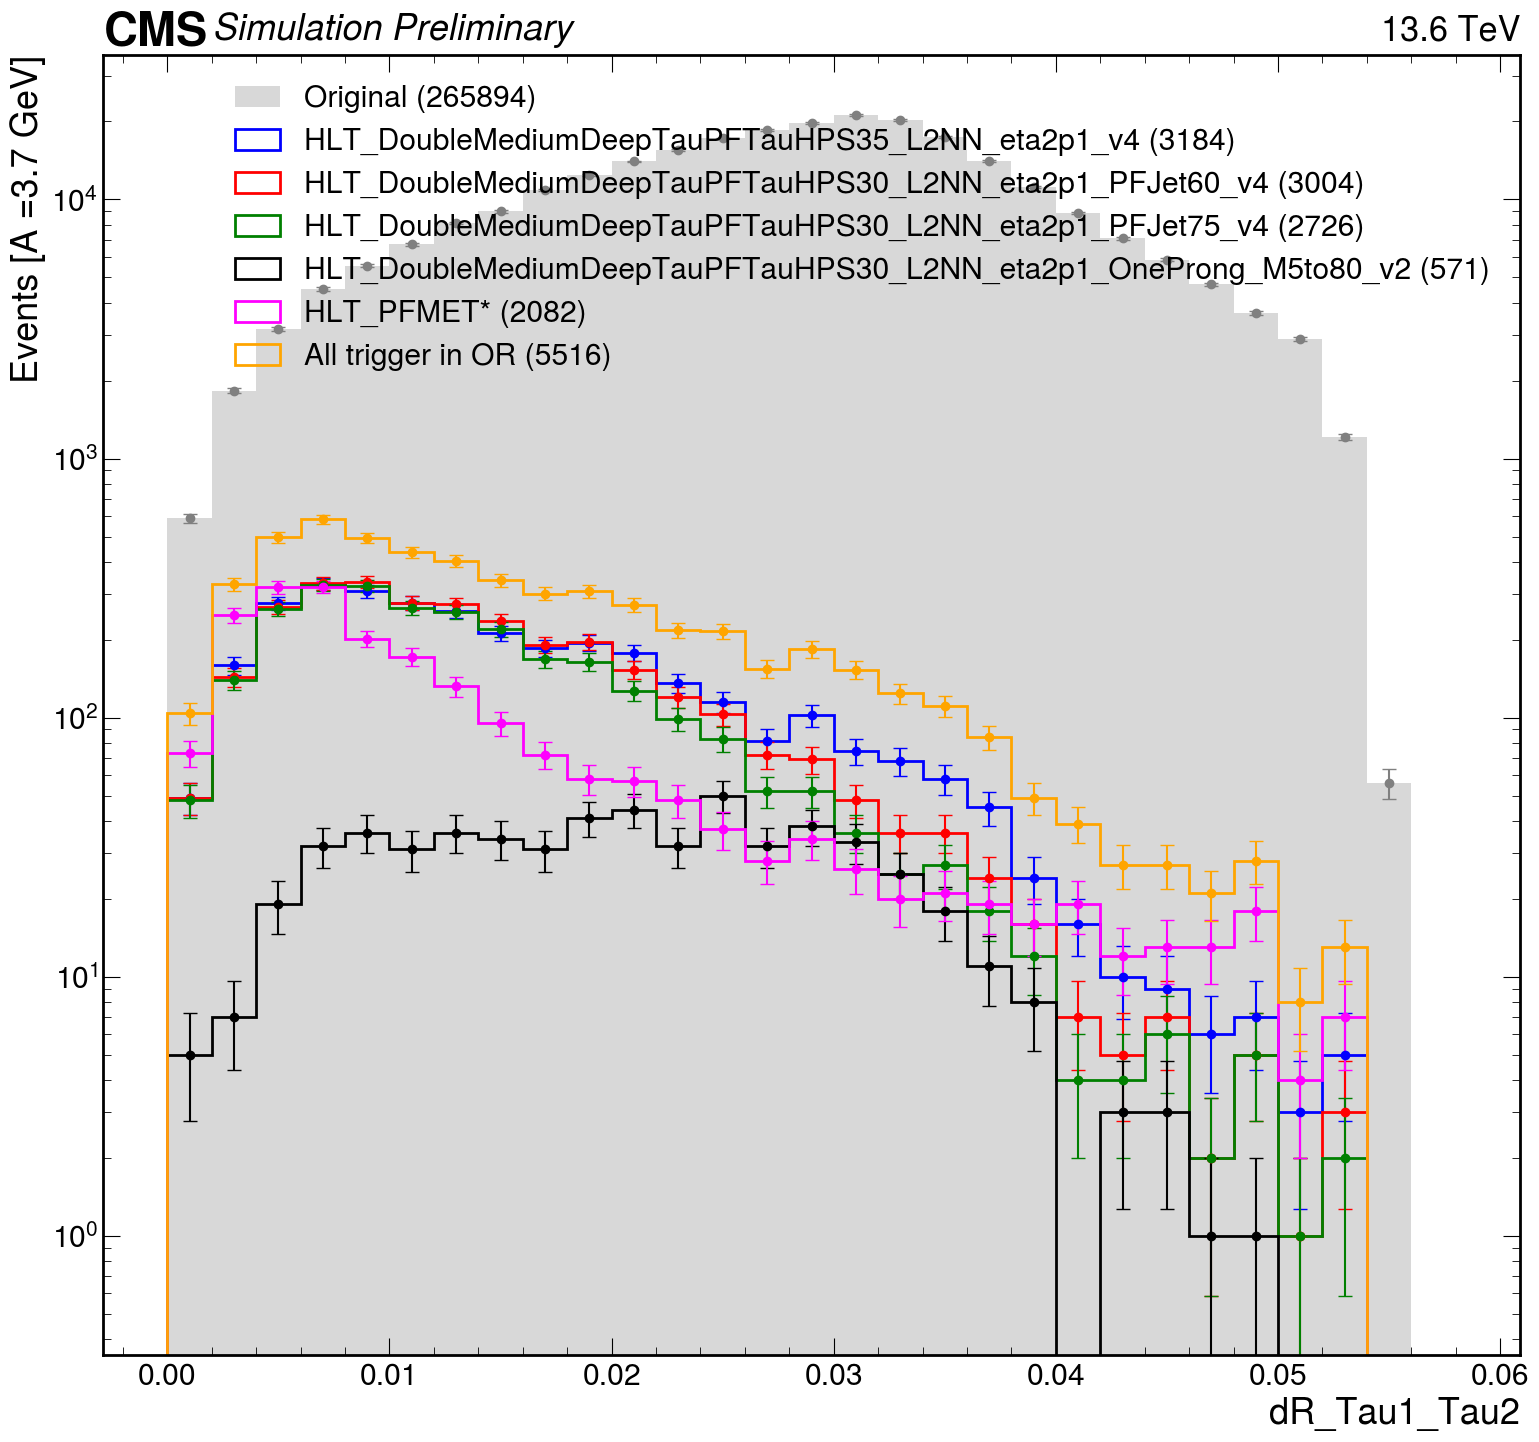

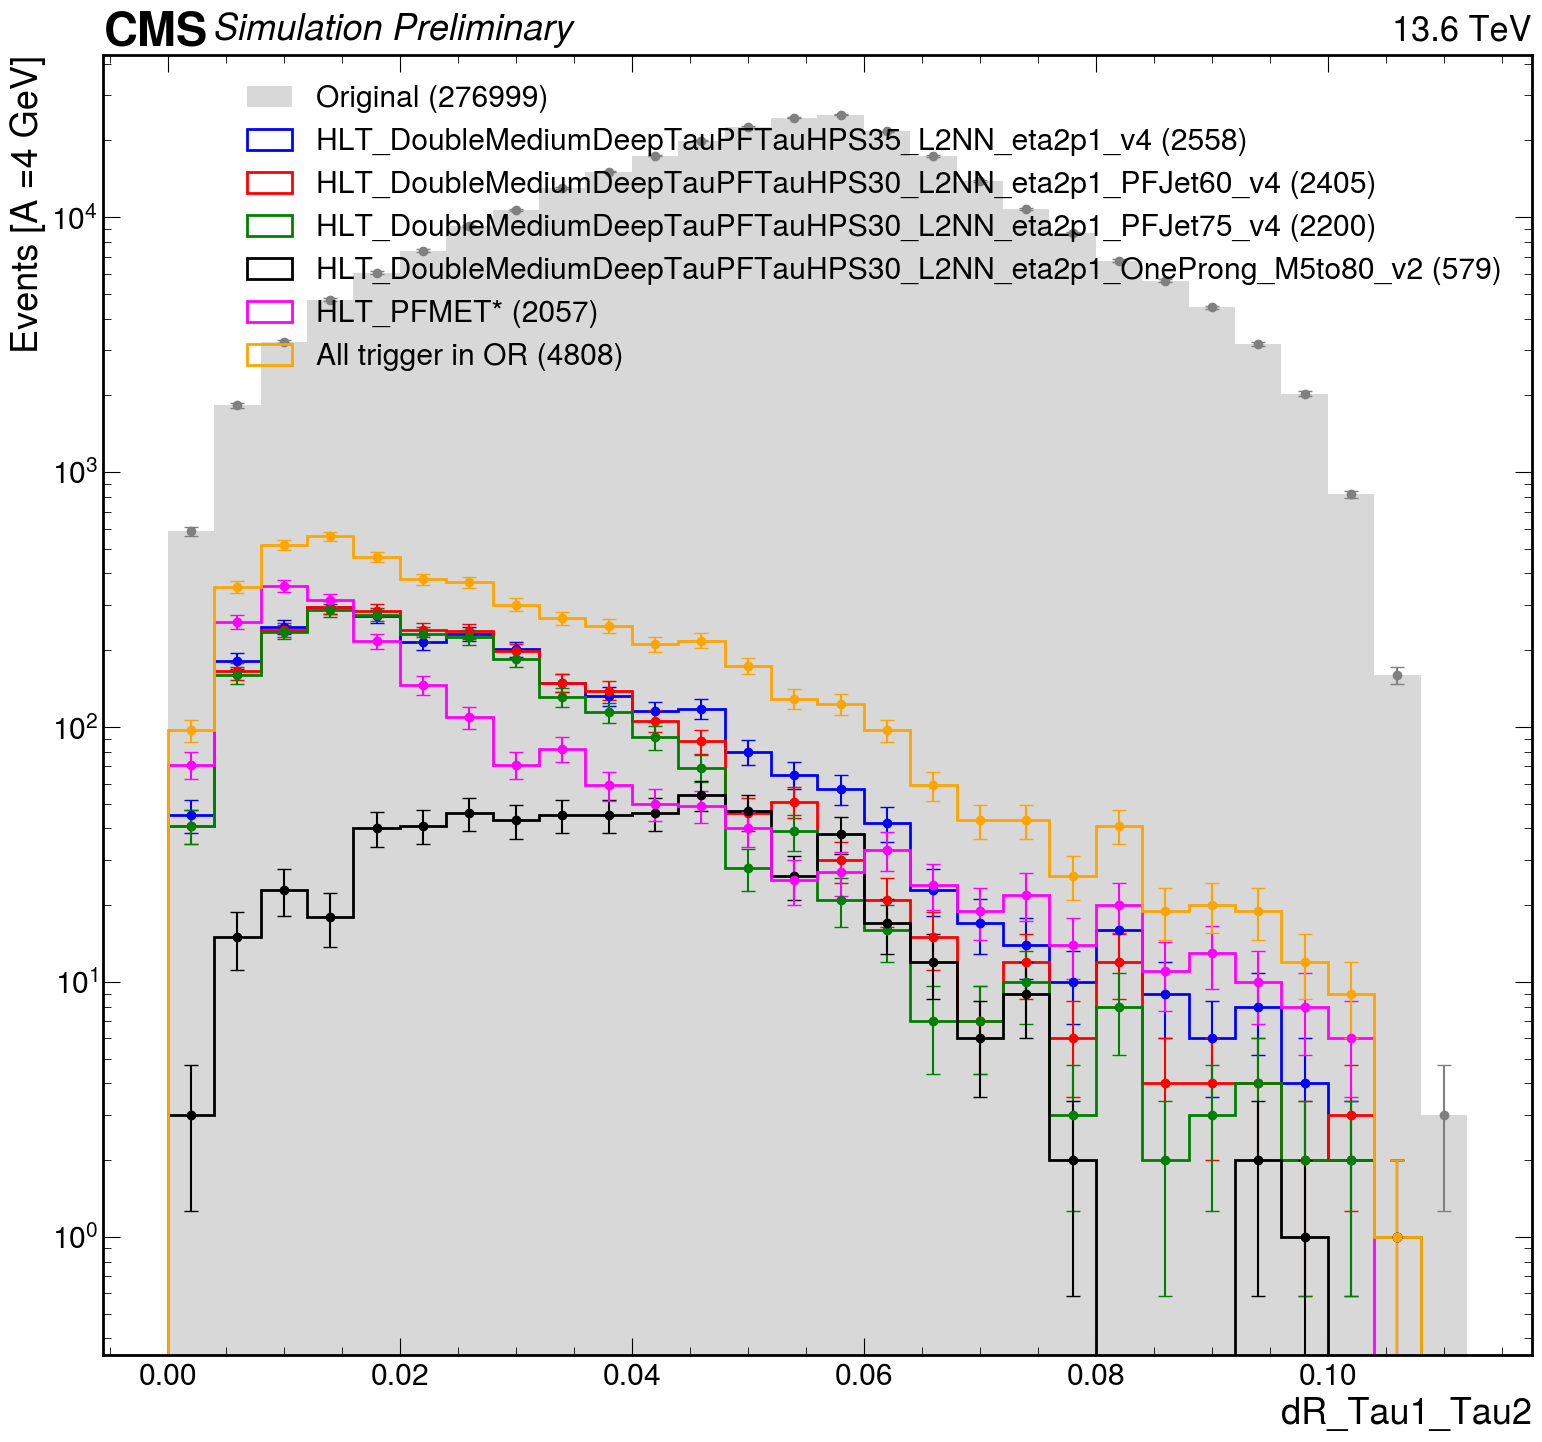

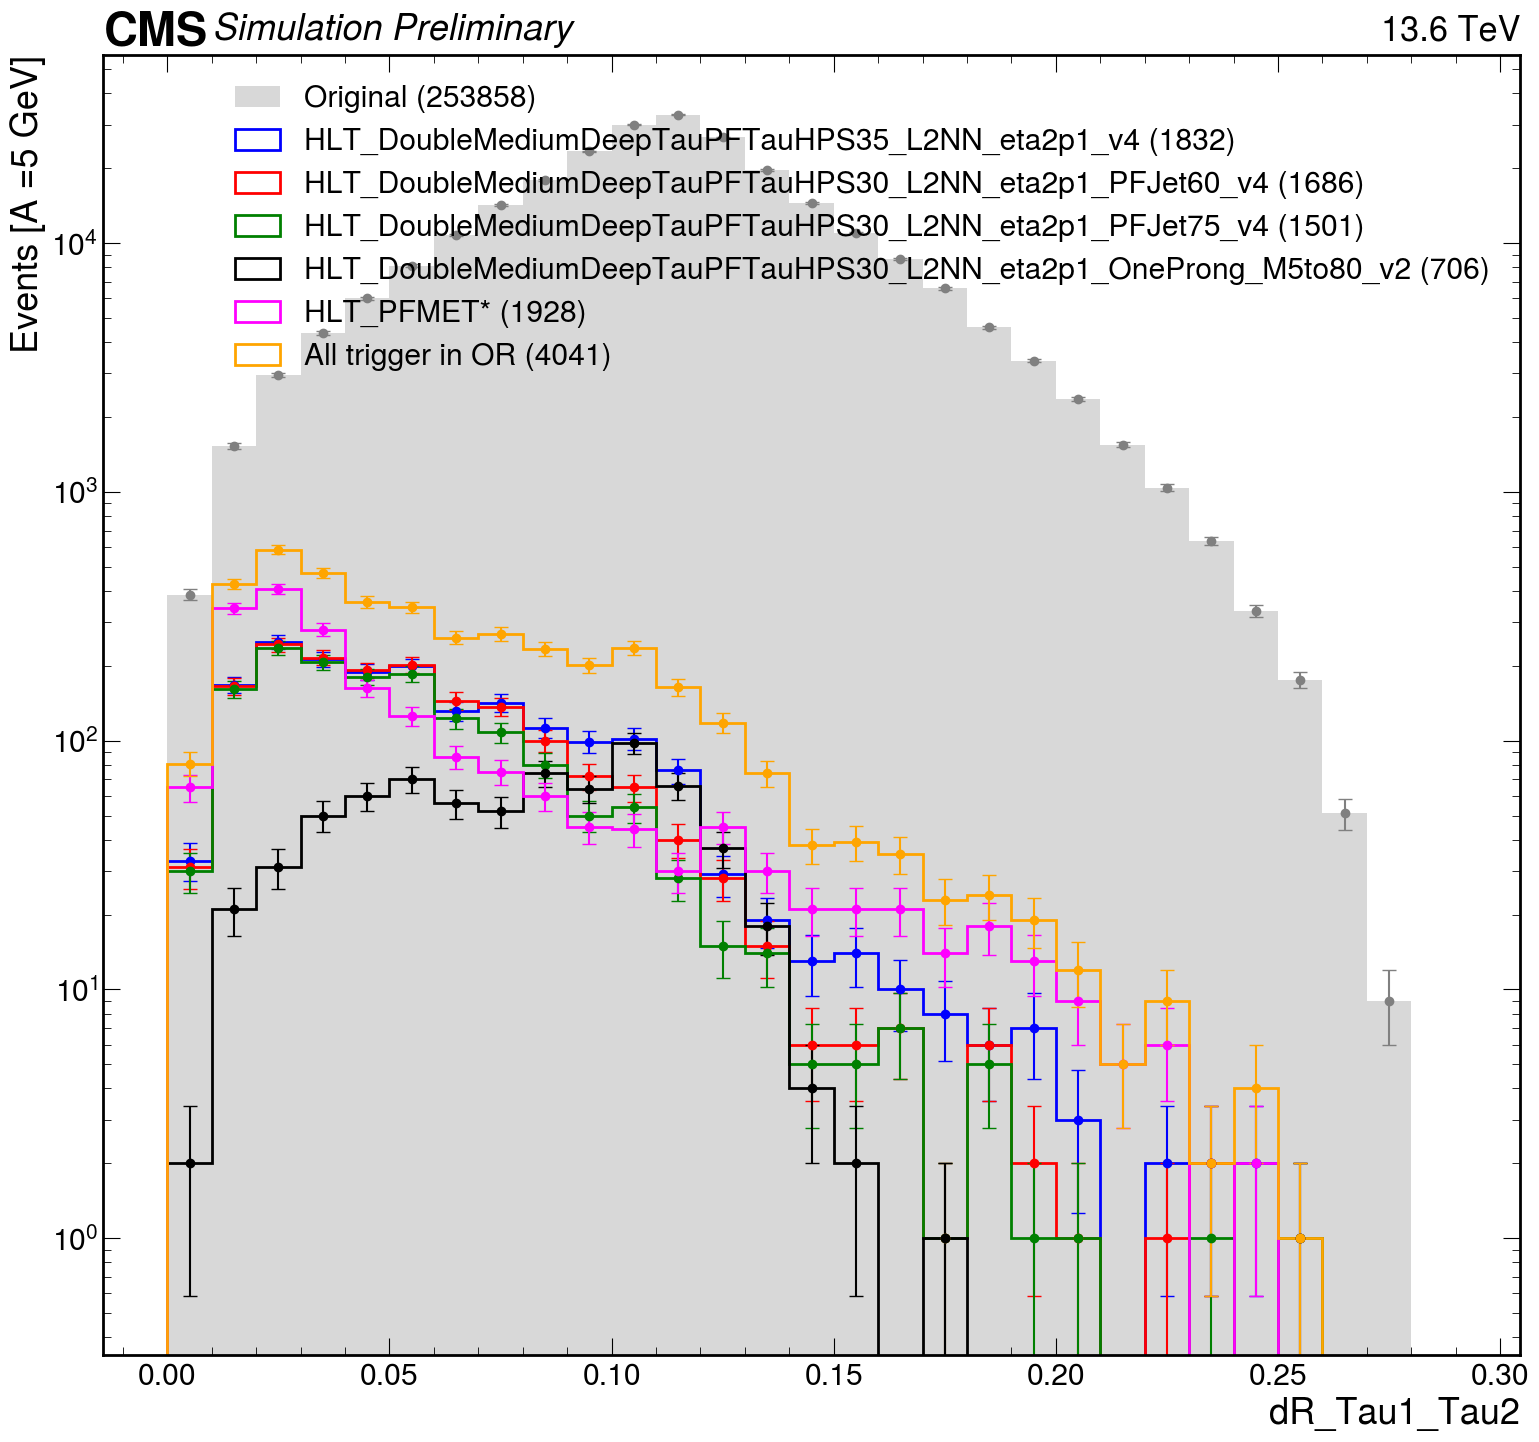

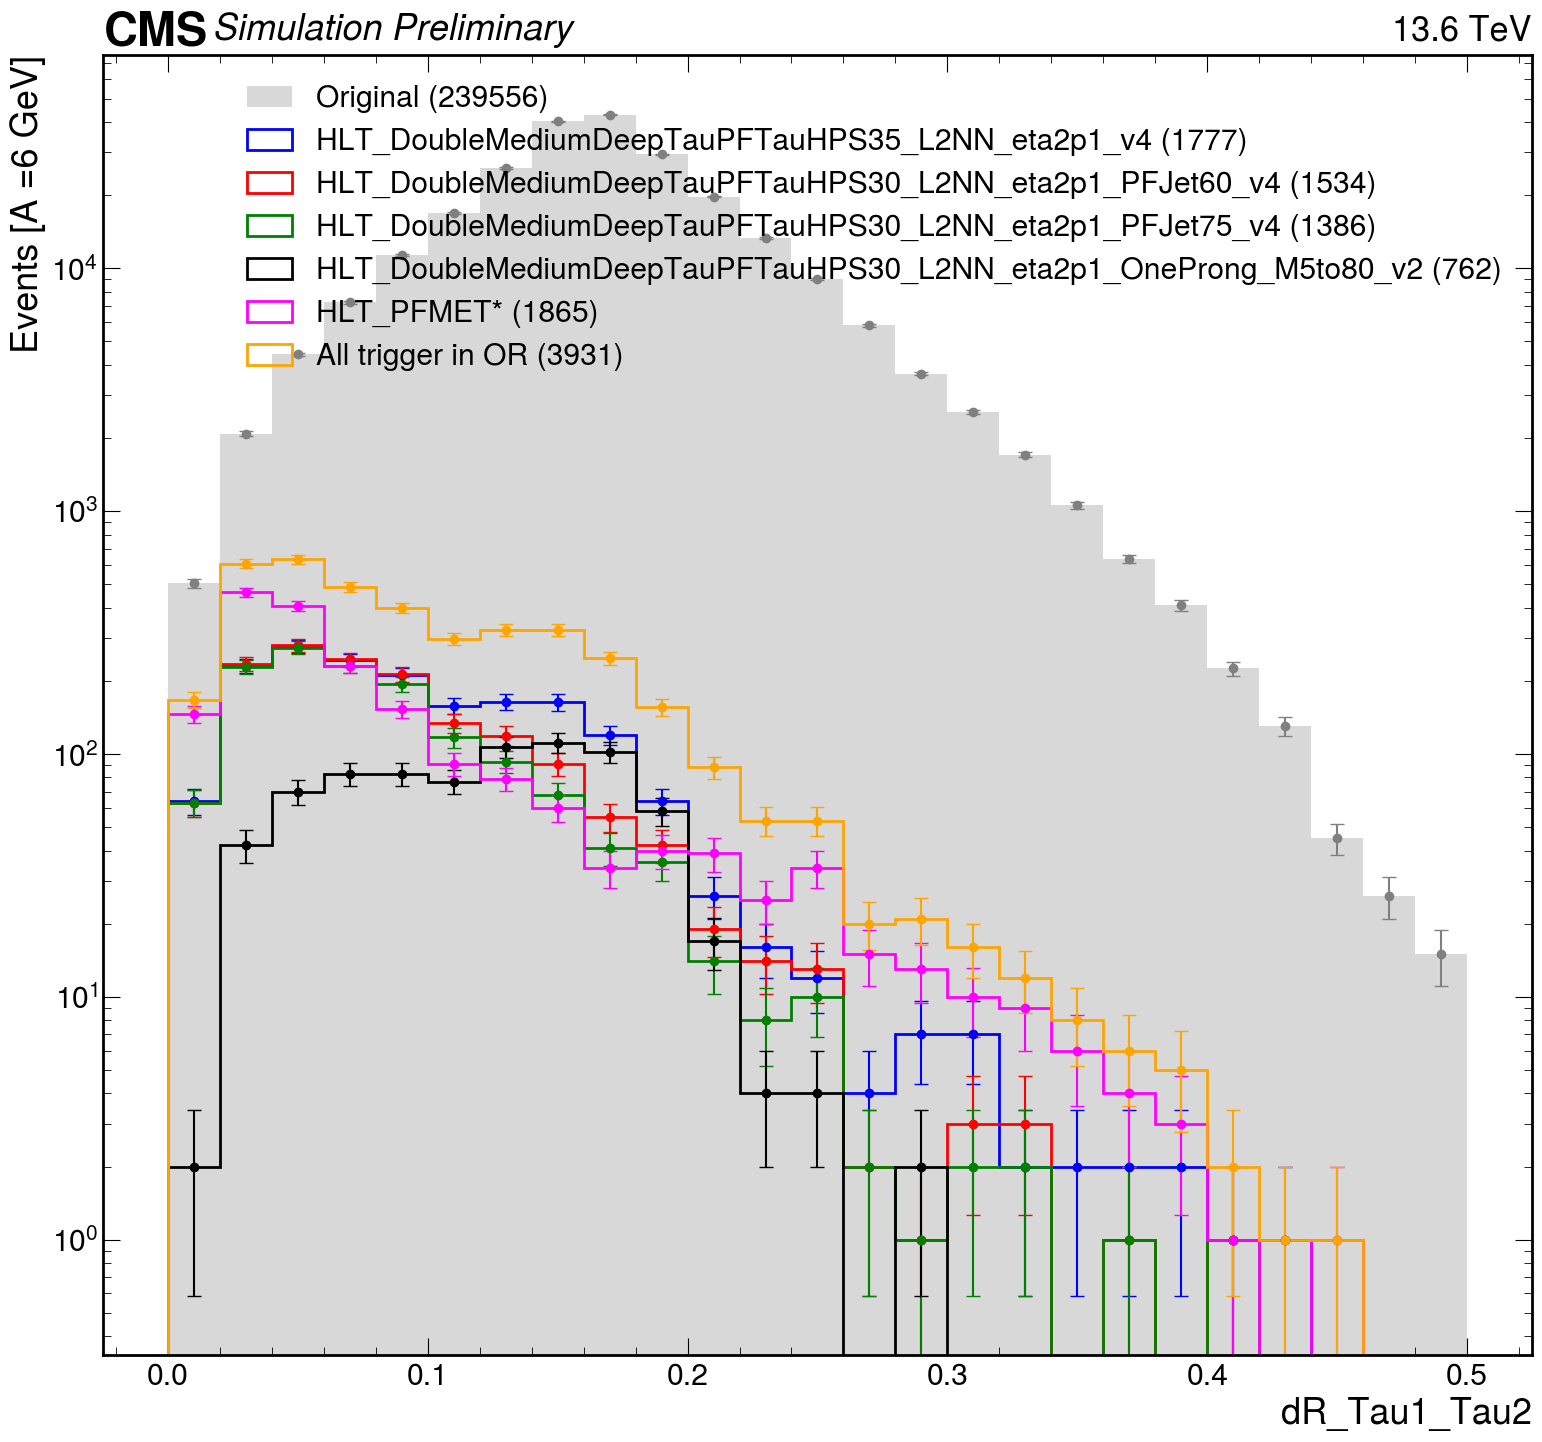

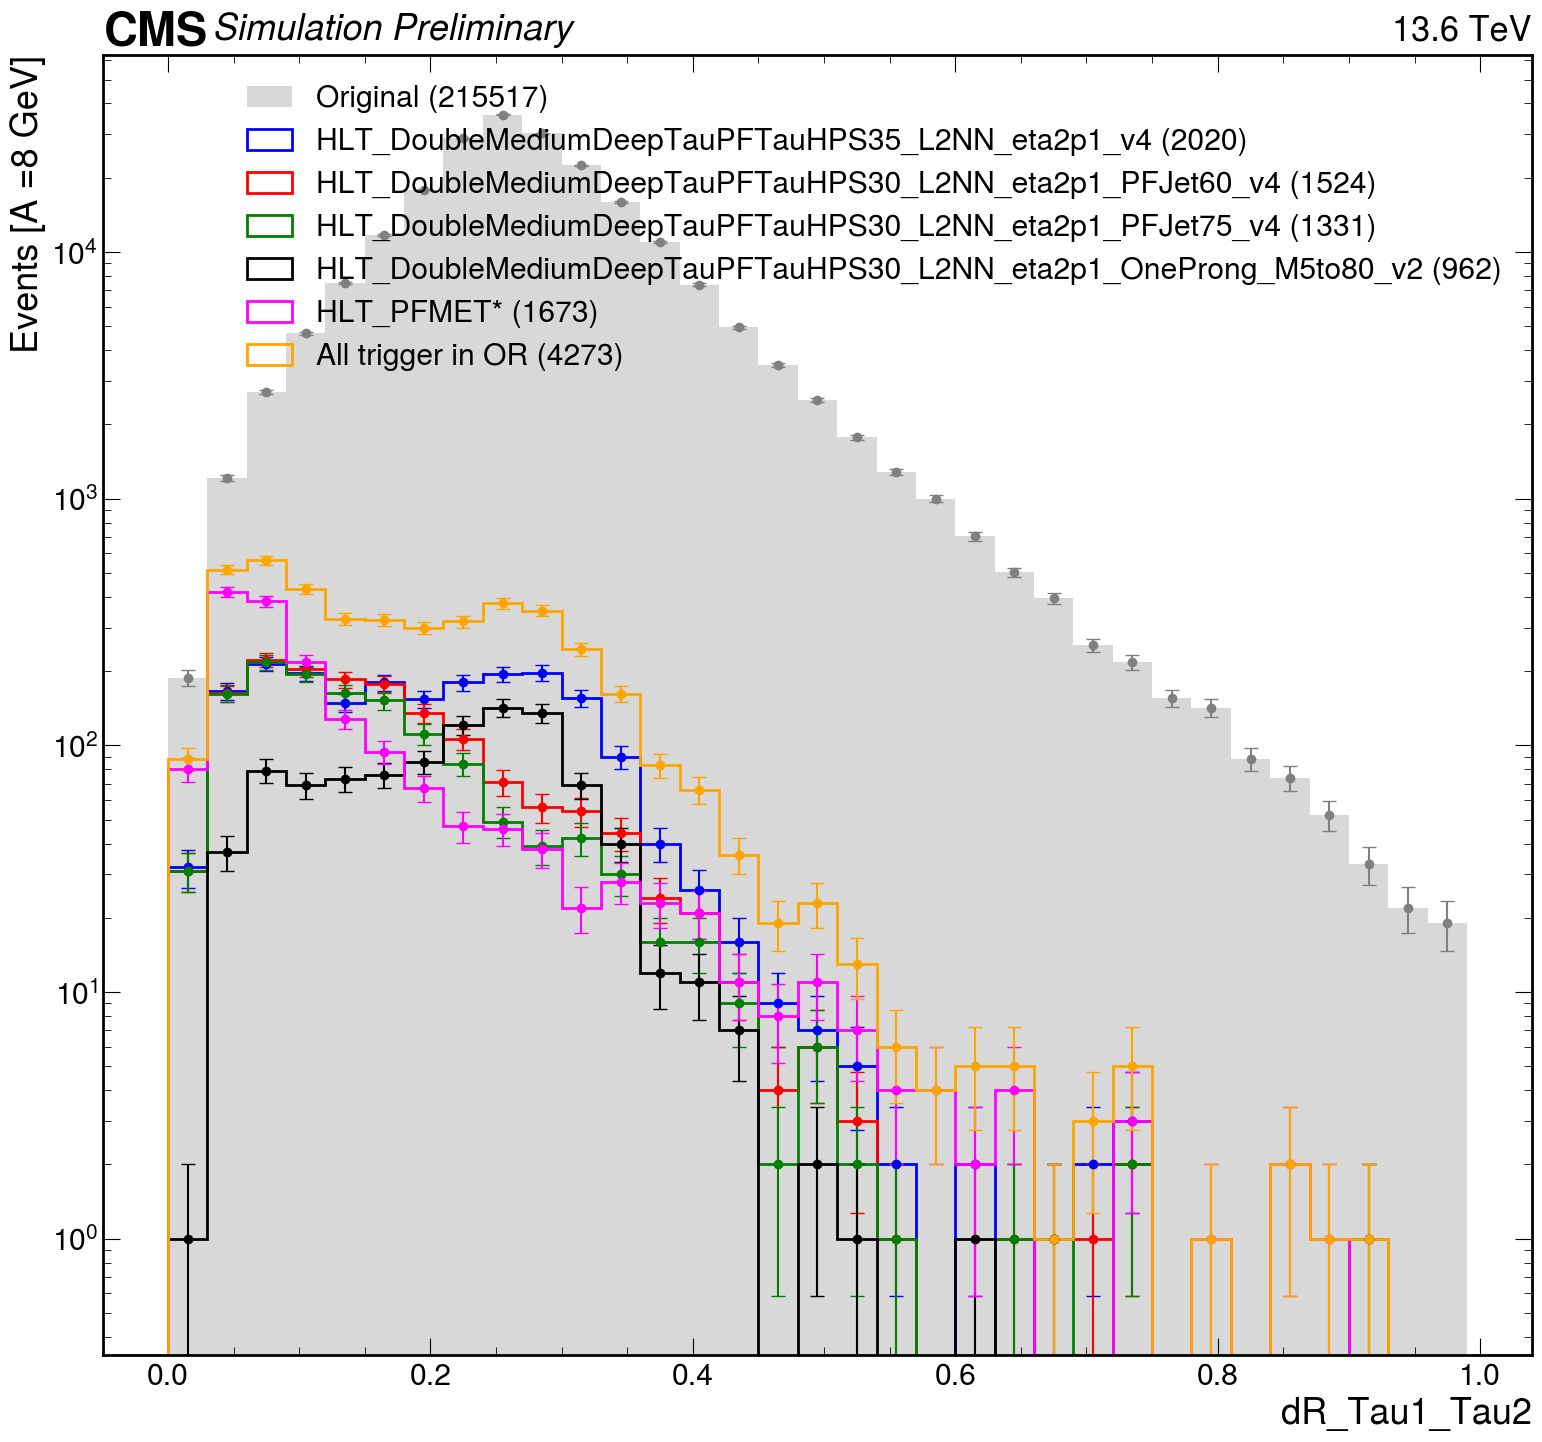

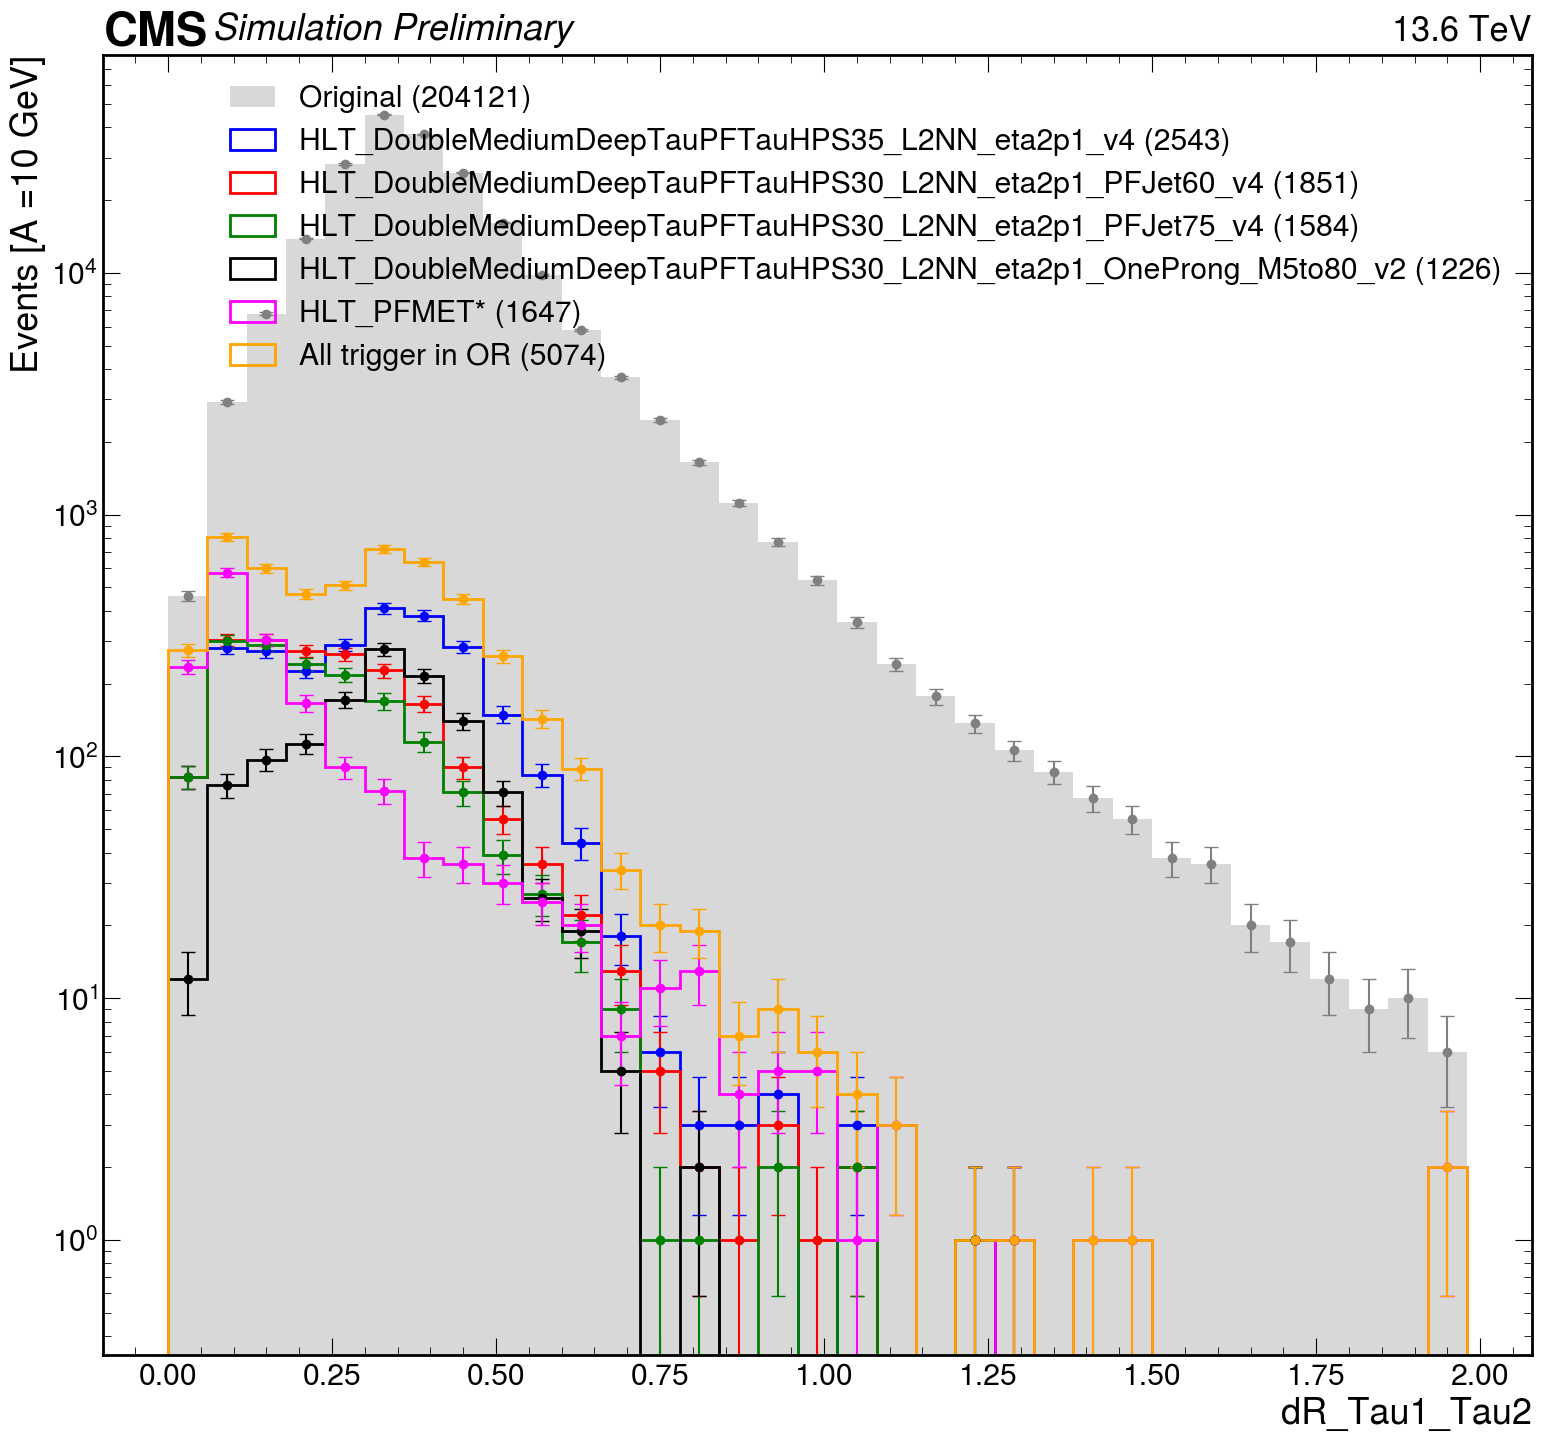

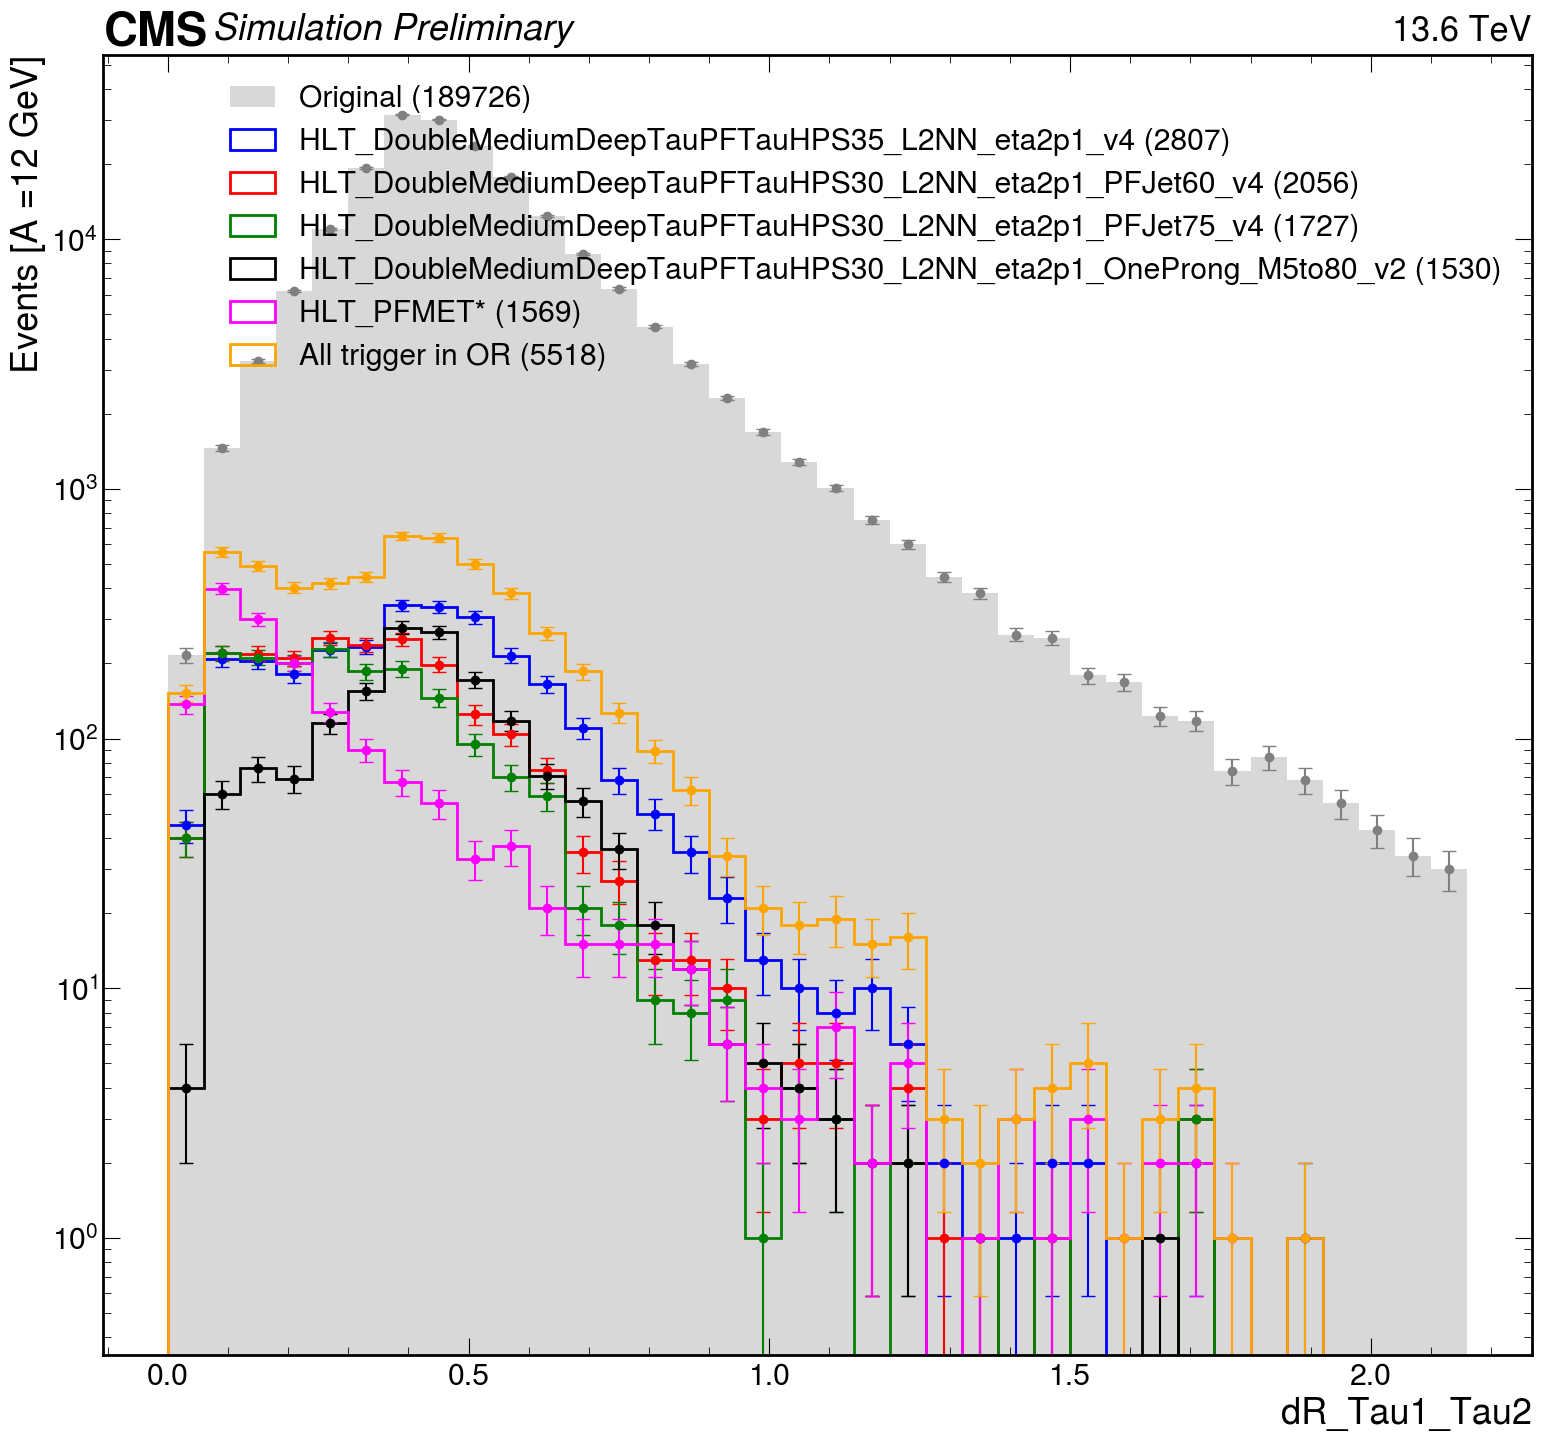

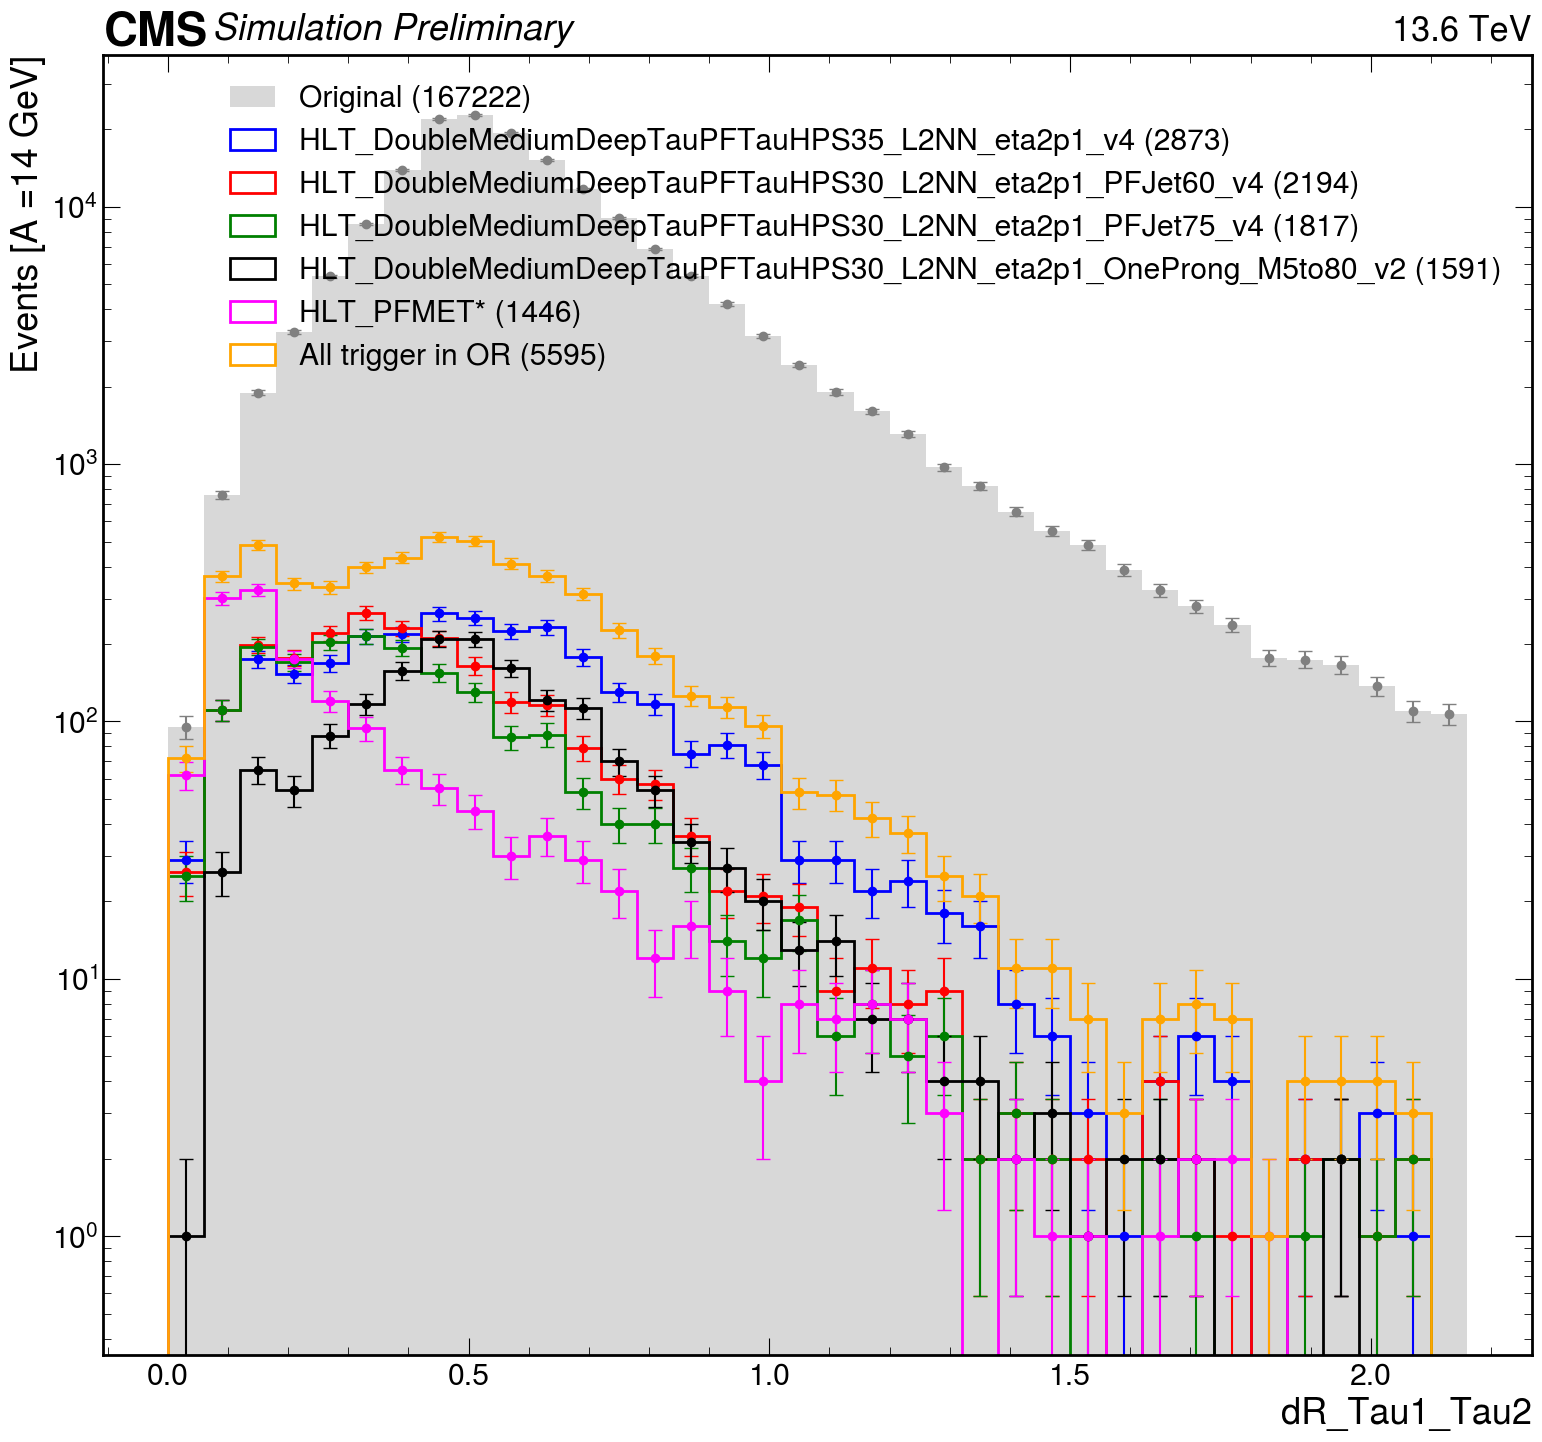

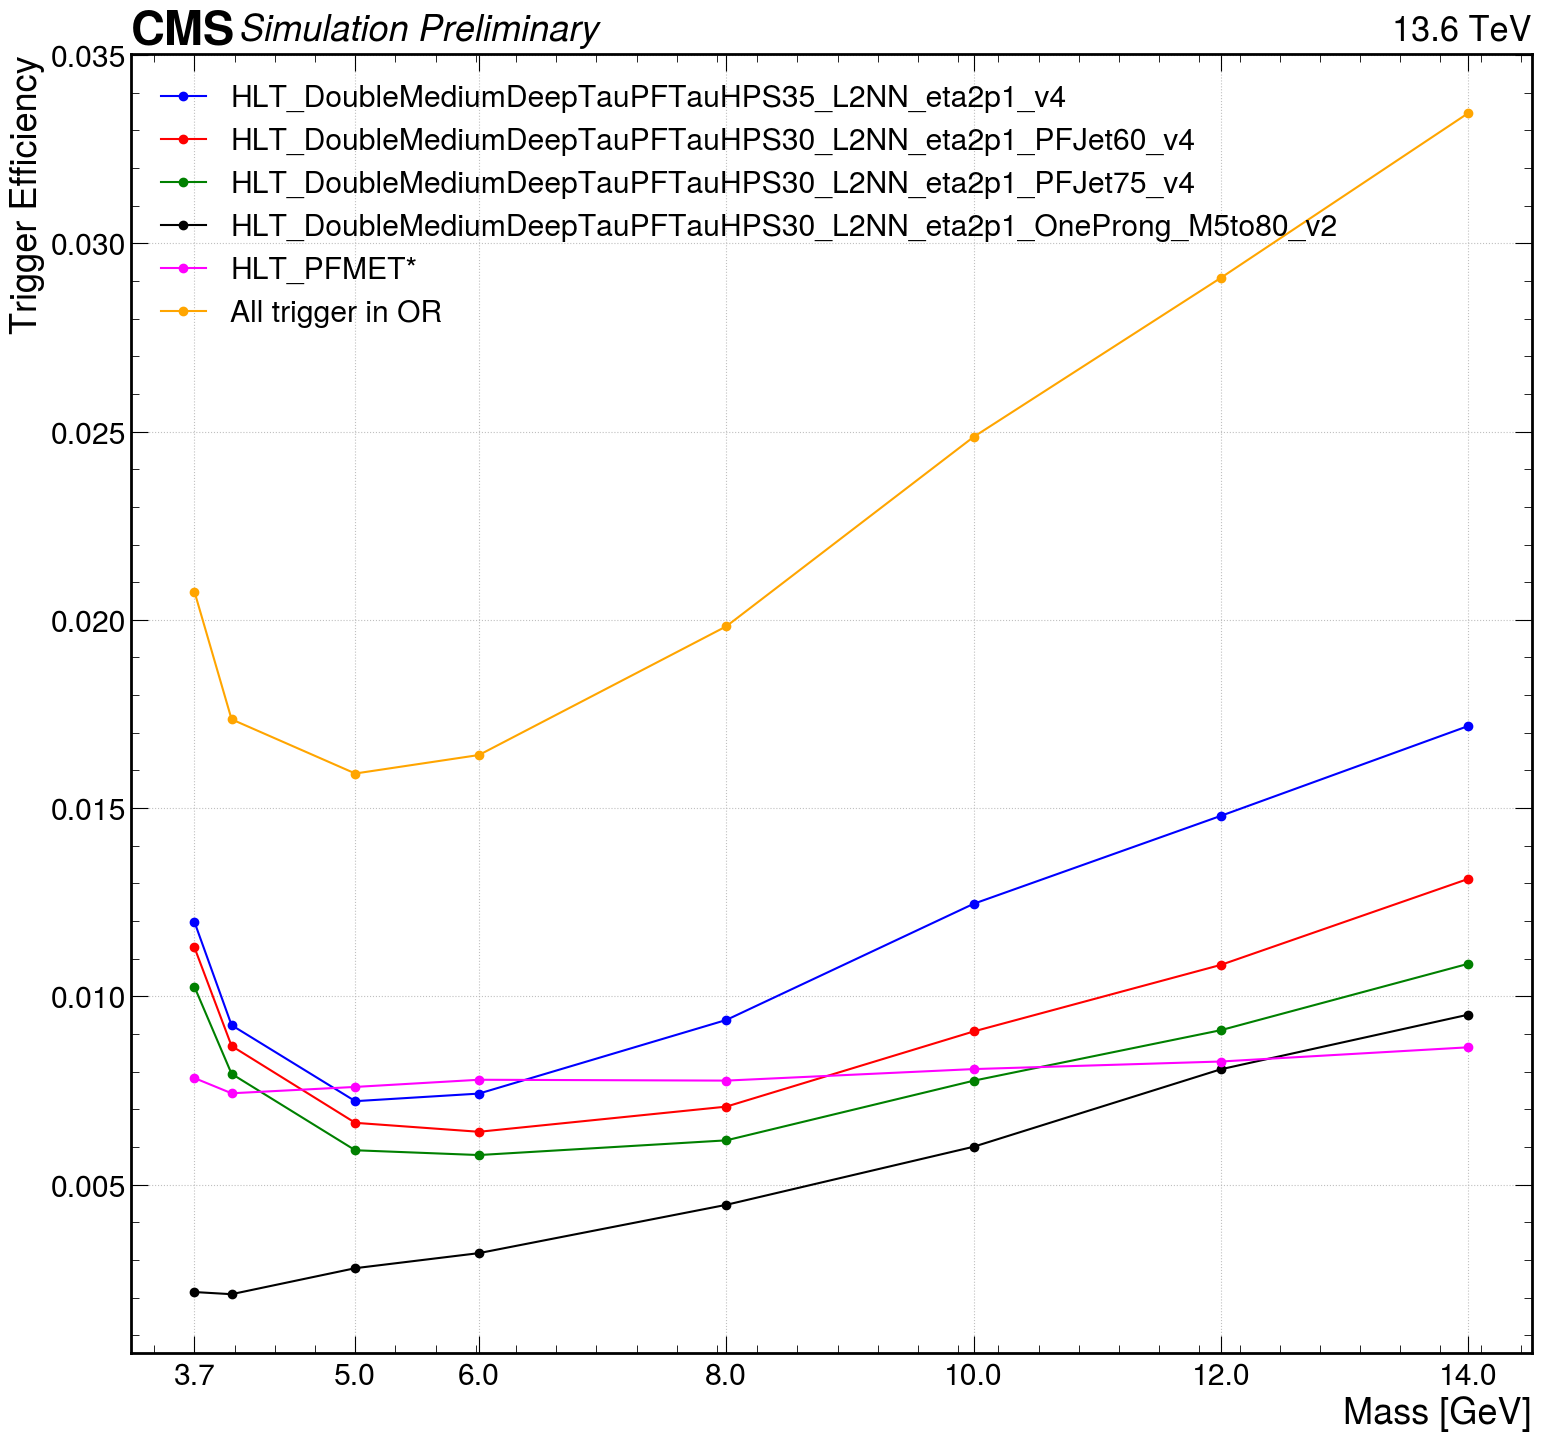

In [6]:
bins_m3p7=np.arange(0, 0.06, 0.002)
bins_m4=np.arange(0,0.115,0.004)
bins_m5=np.arange(0,0.3,0.01)
bins_m6=np.arange(0,0.51,0.02)
bins_m8=np.arange(0,1,0.03)
bins_m10=np.arange(0,2,0.06)
bins_m12=np.arange(0,2.2,0.06)
bins_m14=np.arange(0,2.2,0.06)
bins = [bins_m3p7, bins_m4, bins_m5, bins_m6, bins_m8, bins_m10, bins_m12, bins_m14]
RHTree_list = [RHTree_m3p7, RHTree_m4, RHTree_m5, RHTree_m6, RHTree_m8,RHTree_m10, RHTree_m12, RHTree_m14]
mass = [3.7, 4, 5, 6, 8, 10, 12, 14]
color = ['b', 'r', 'g', 'black','magenta','orange']
total_events = []
triggered_events = []
for j, RHTree in enumerate(RHTree_list):
    RHTree = RHTree_list[j]
    # Extract the full dataset (all dR_Tau1_Tau2 entries)
    dR_Tau1_Tau2 = RHTree.arrays([f"dR_Tau1_Tau2"], "dR_Tau1_Tau2 > -111", library="pd")["dR_Tau1_Tau2"]
    # Create subplots
    fig, ax = plt.subplots(figsize=(16,15)) 
    hist_values_o, bin_edges_o, _ = plt.hist(dR_Tau1_Tau2, bins=bins[j], linestyle='--', linewidth=2, color='grey', alpha=0.3, label=f"Original ({len(dR_Tau1_Tau2)})", density=False)
    bin_centers_o = (bin_edges_o[:-1] + bin_edges_o[1:]) / 2  # Compute bin centers
    errors_o = np.sqrt(hist_values_o)  # Poisson errors
    plt.errorbar(bin_centers_o, hist_values_o, yerr=errors_o, fmt='o', capsize=5, color='grey')
    original = []
    passed = []
    # Loop over each trigger and plot
    for i, trigger in enumerate(triggers):
        # Apply trigger condition
        dR_Tau1_Tau2_after_trigger = RHTree.arrays(["dR_Tau1_Tau2"], f"{trigger} > 0", library="numpy")["dR_Tau1_Tau2"]

        # Flatten the extracted data safely
        dR_Tau1_Tau2_flat = np.concatenate(dR_Tau1_Tau2_after_trigger) if len(dR_Tau1_Tau2_after_trigger) > 0 else np.array([])

        
        hist_values, bin_edges, _ = plt.hist(dR_Tau1_Tau2_flat, bins=bins[j], histtype='step', linewidth=2, color=f'{color[i]}', label=f"{trigger_prefix[i]} ({len(dR_Tau1_Tau2_flat)})", density=False)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
        errors = np.sqrt(hist_values)  # Poisson errors
        plt.errorbar(bin_centers, hist_values, yerr=errors, fmt='o', capsize=5, color=f'{color[i]}')
        original.append(len(dR_Tau1_Tau2))
        passed.append(len(dR_Tau1_Tau2_flat))
    total_events.append(original)
    triggered_events.append(passed)
    ax.set_yscale("log")
    ax.set_xlabel("dR_Tau1_Tau2")
    ax.set_ylabel(f"Events [A ={mass[j]} GeV]")
    ax.legend()
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
    plt.tight_layout()
    plt.show()
    
    
total_events = np.array(total_events)  # Shape: (8, 4)
triggered_events = np.array(triggered_events)  # Shape: (8, 4)

# Compute Efficiency (Avoid division by zero)
efficiency = np.where(total_events > 0, triggered_events / total_events, 0)

# Plot efficiency vs. mass for each trigger
fig, ax = plt.subplots(figsize=(16,15)) 
for i in range(len(triggers)):
    plt.plot(mass, efficiency[:, i], marker='o', linestyle='-', color=color[i], label=f"{trigger_prefix[i]}")
# Labels and title
plt.xlabel("Mass [GeV]")
plt.ylabel("Trigger Efficiency")
plt.xticks([3.7, 5, 6, 8, 10, 12, 14])
plt.legend()
plt.grid(True)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

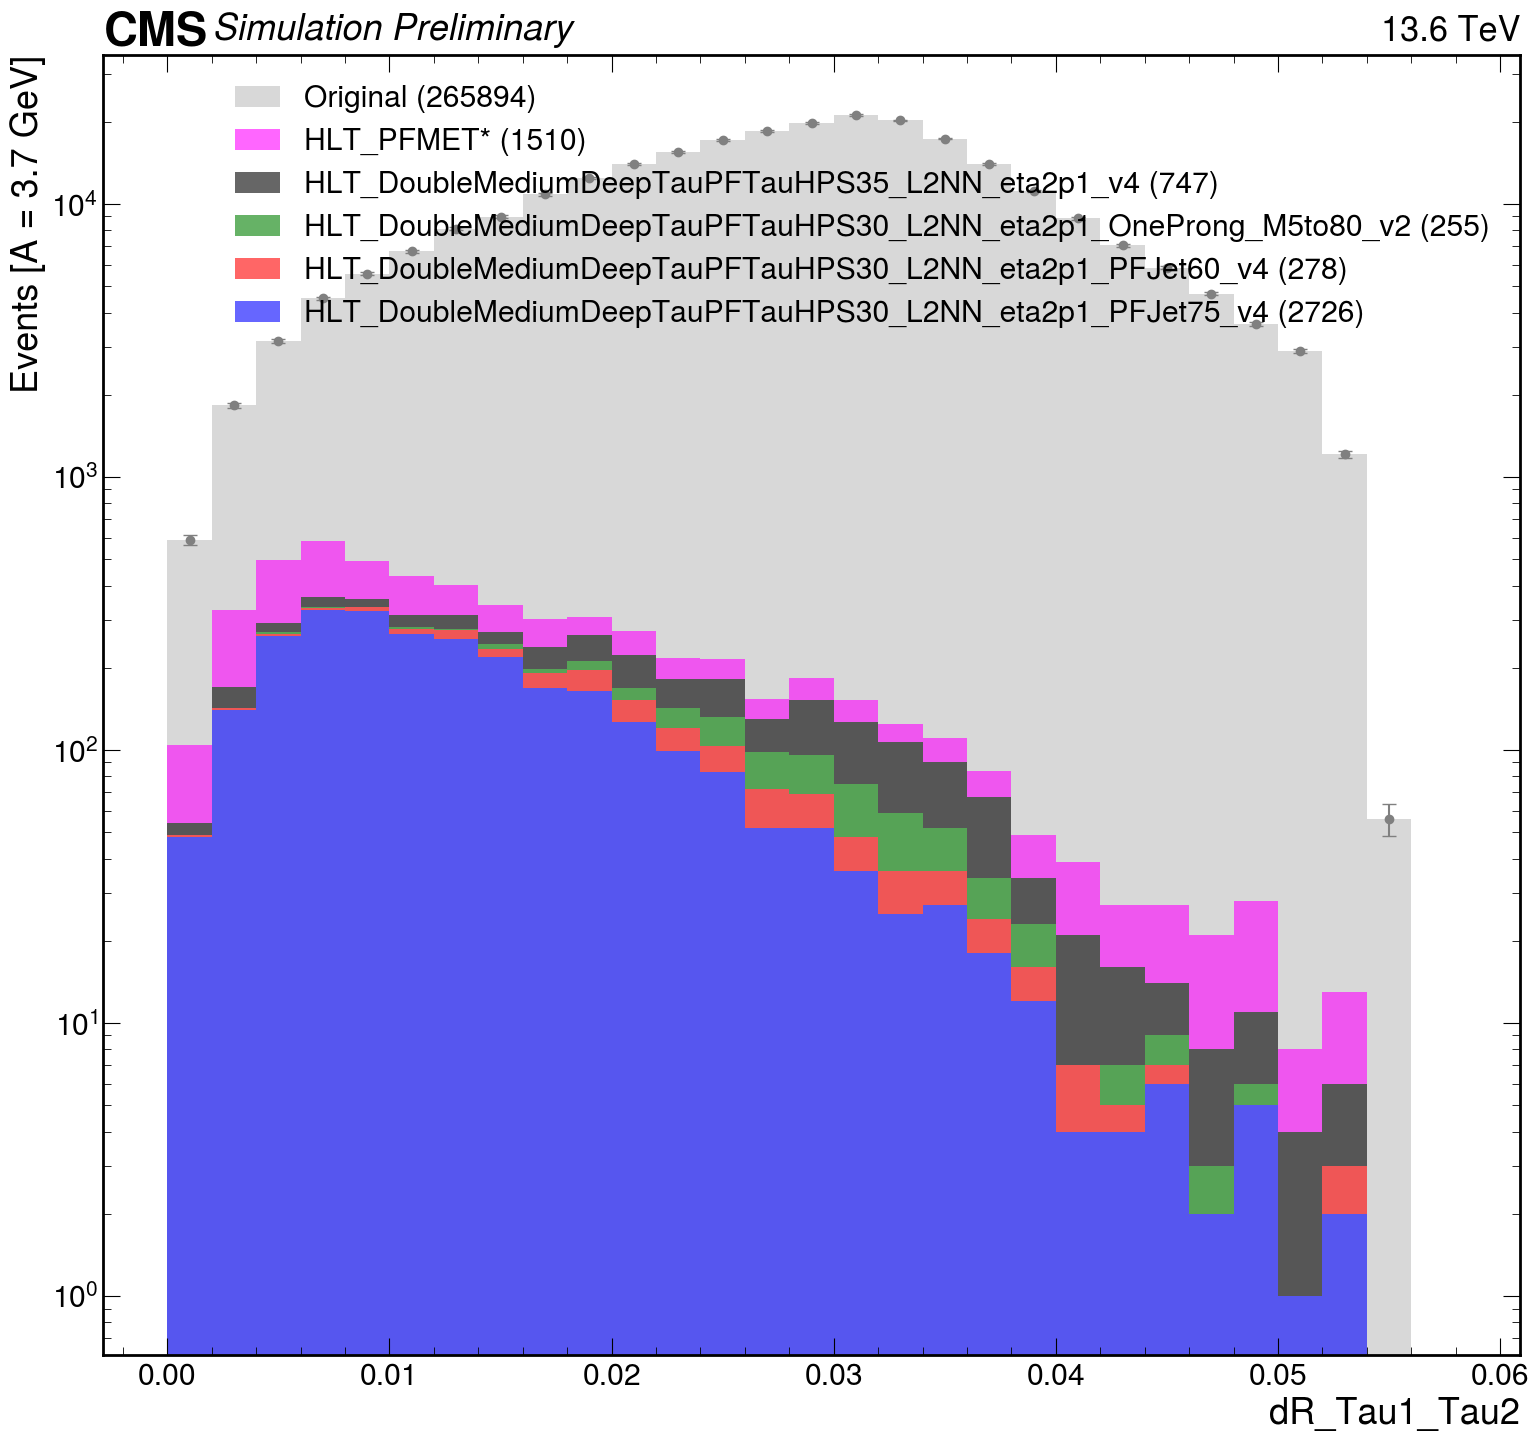

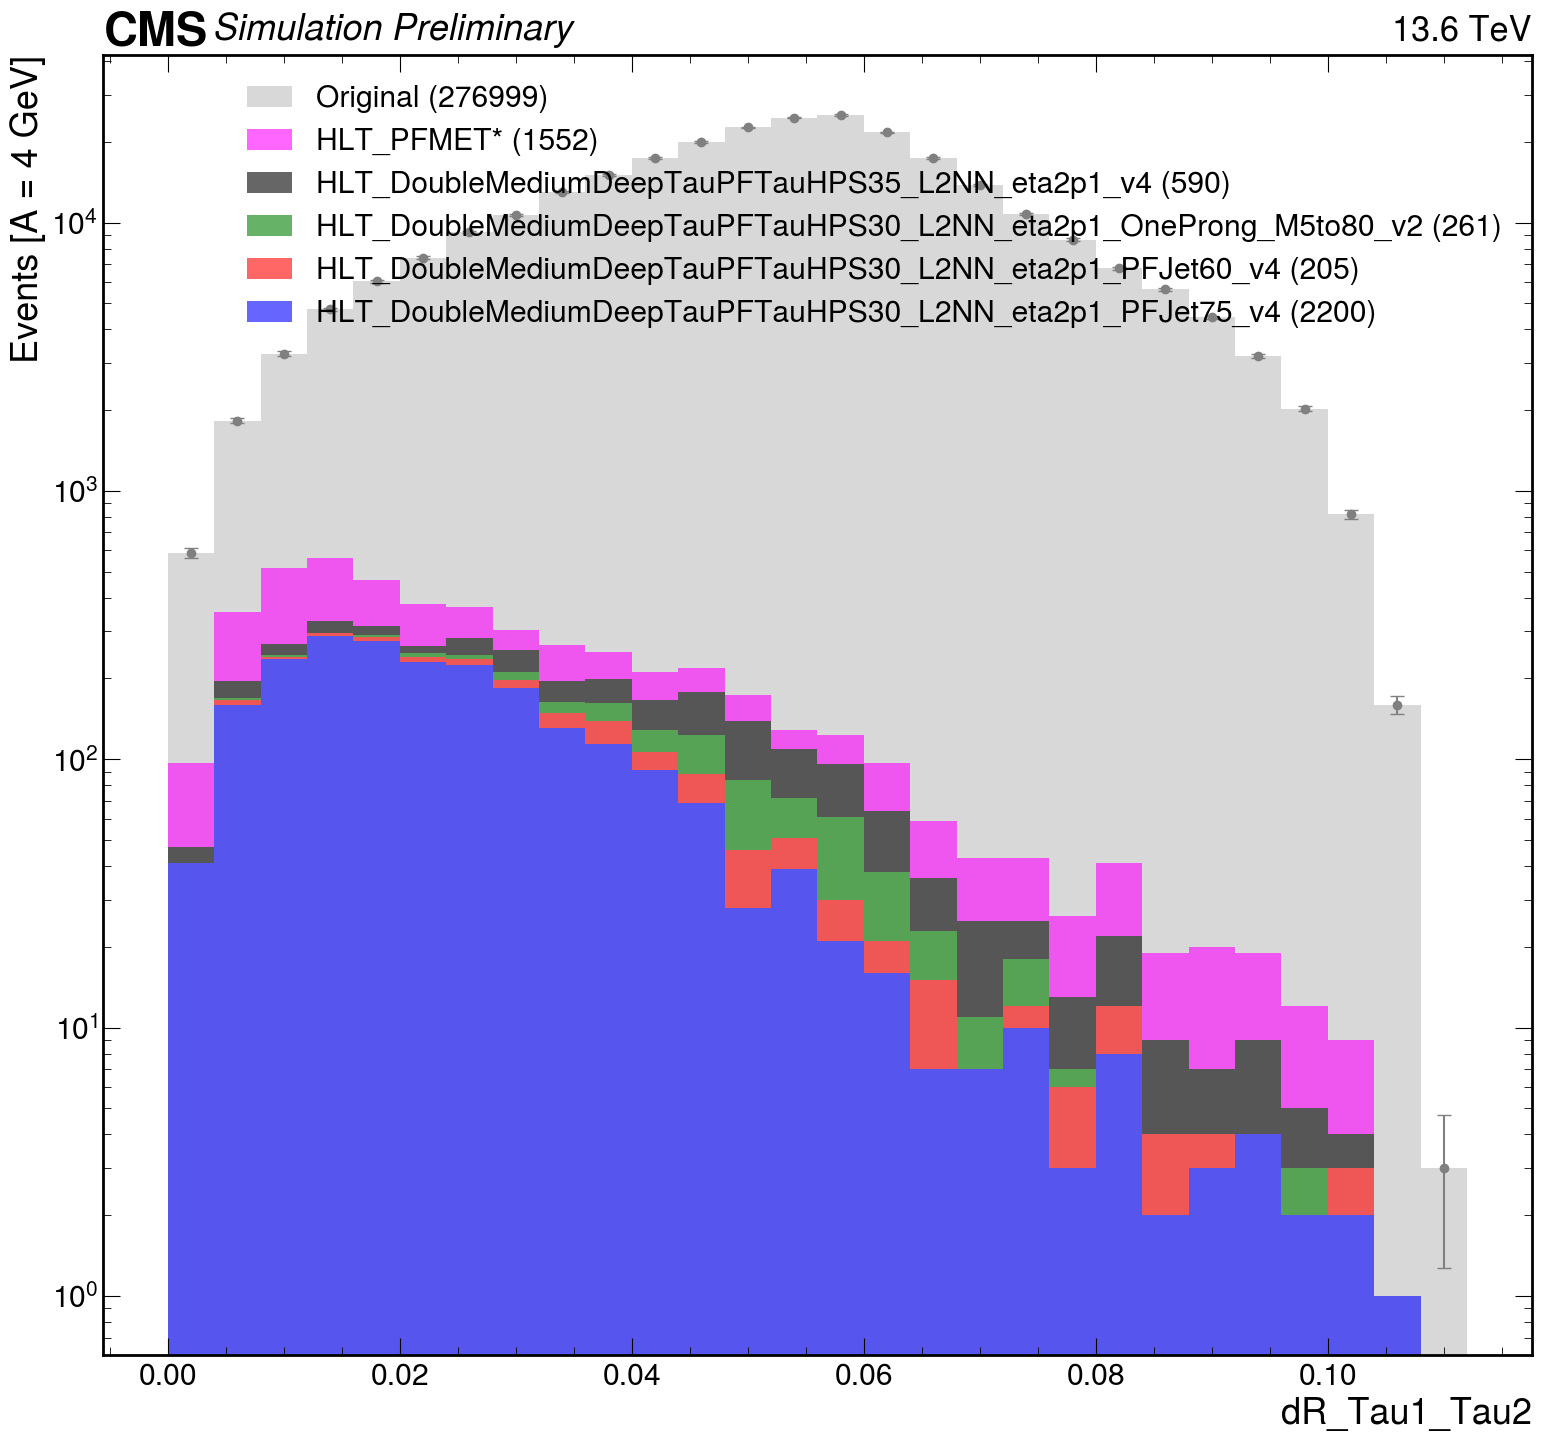

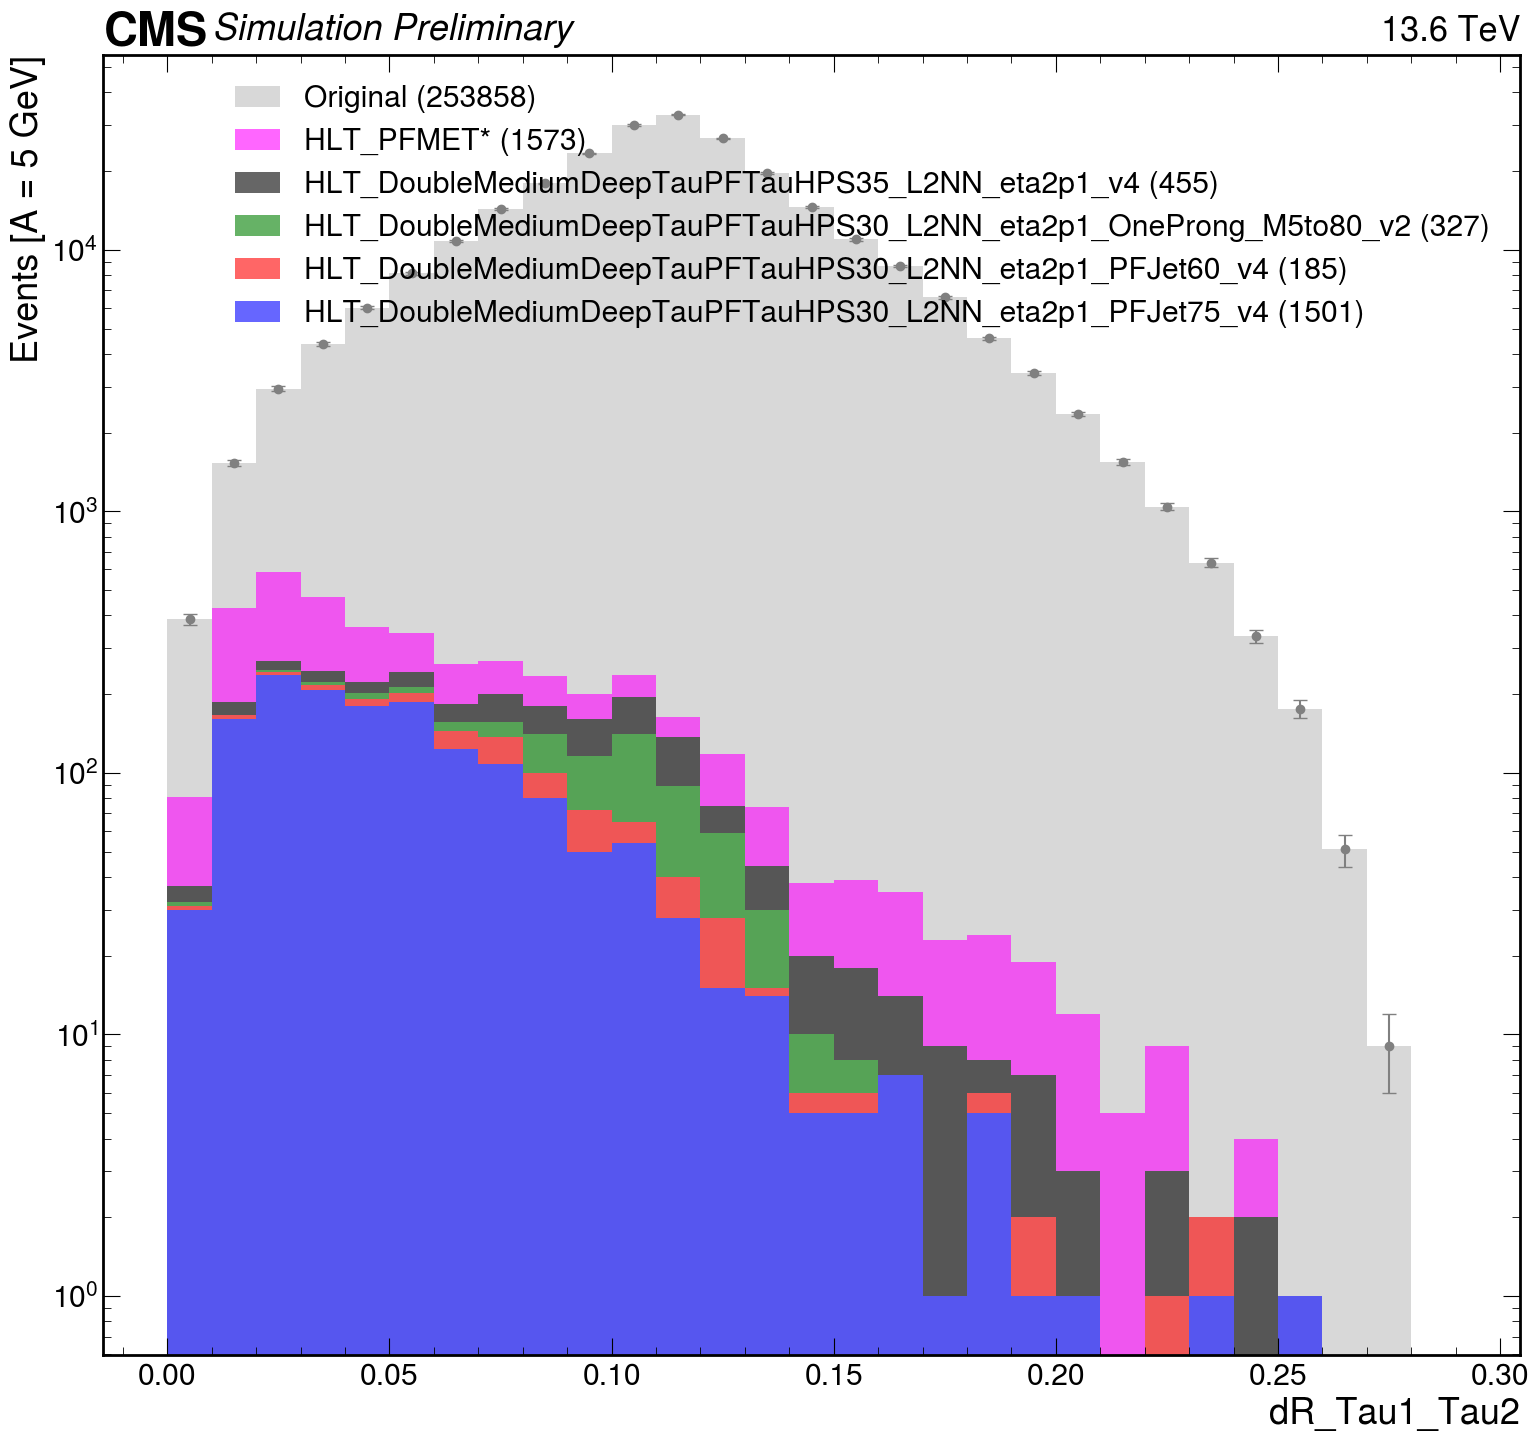

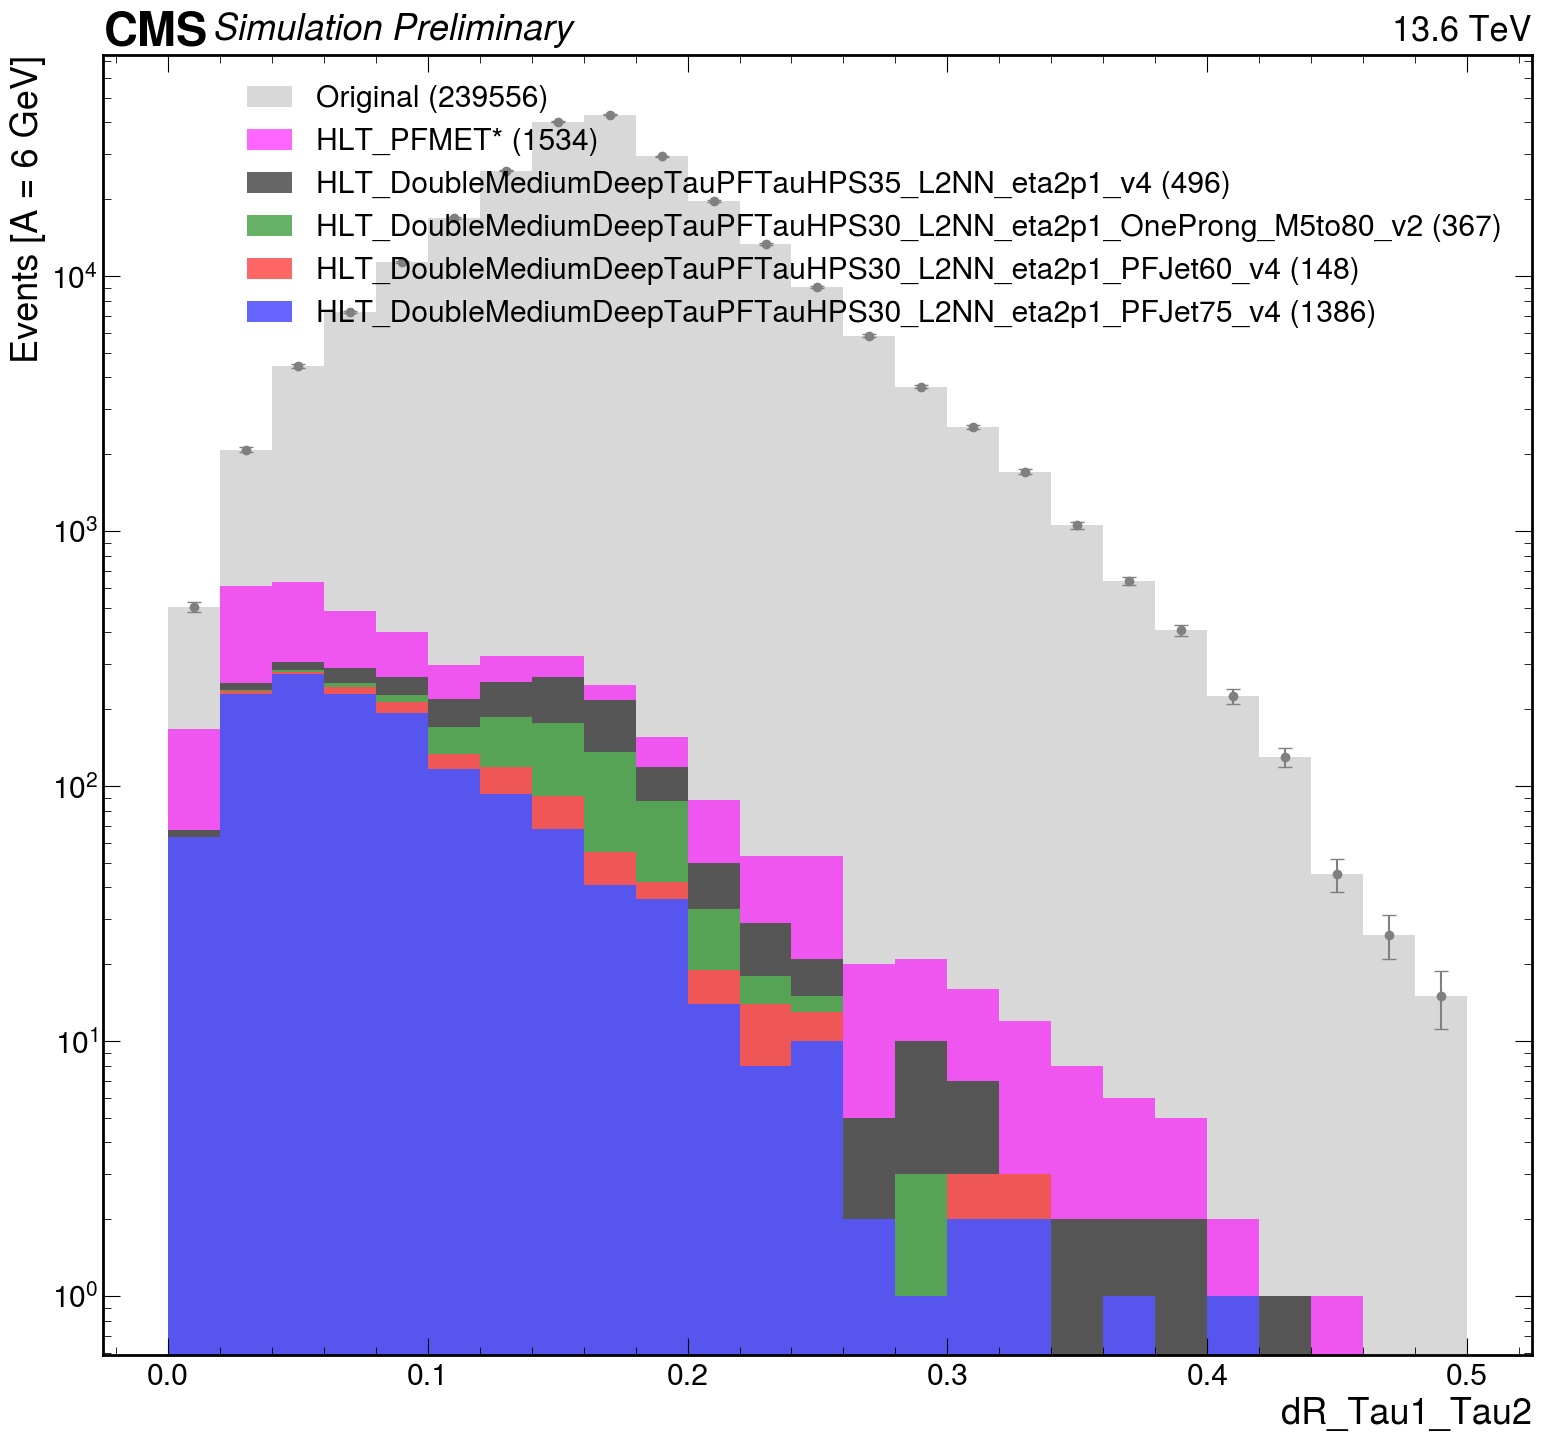

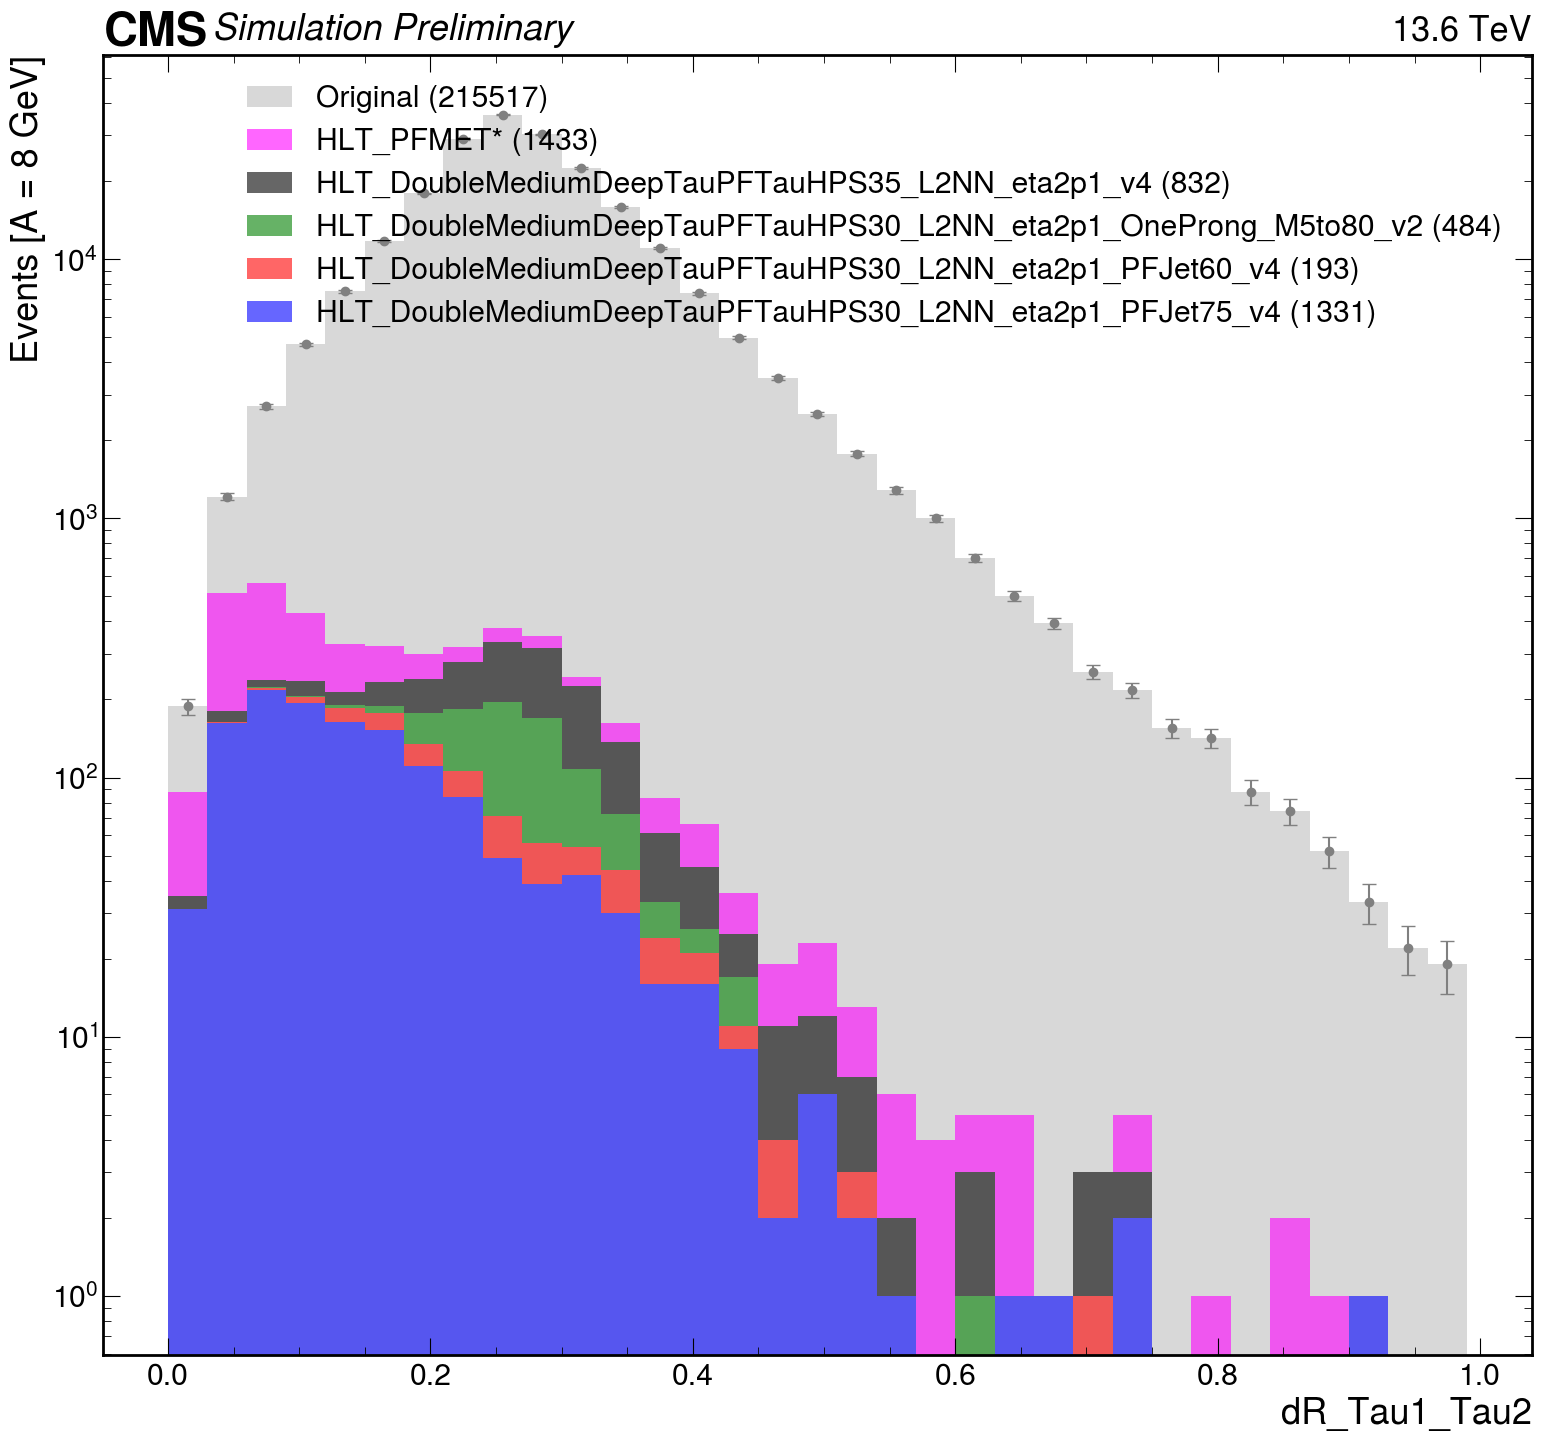

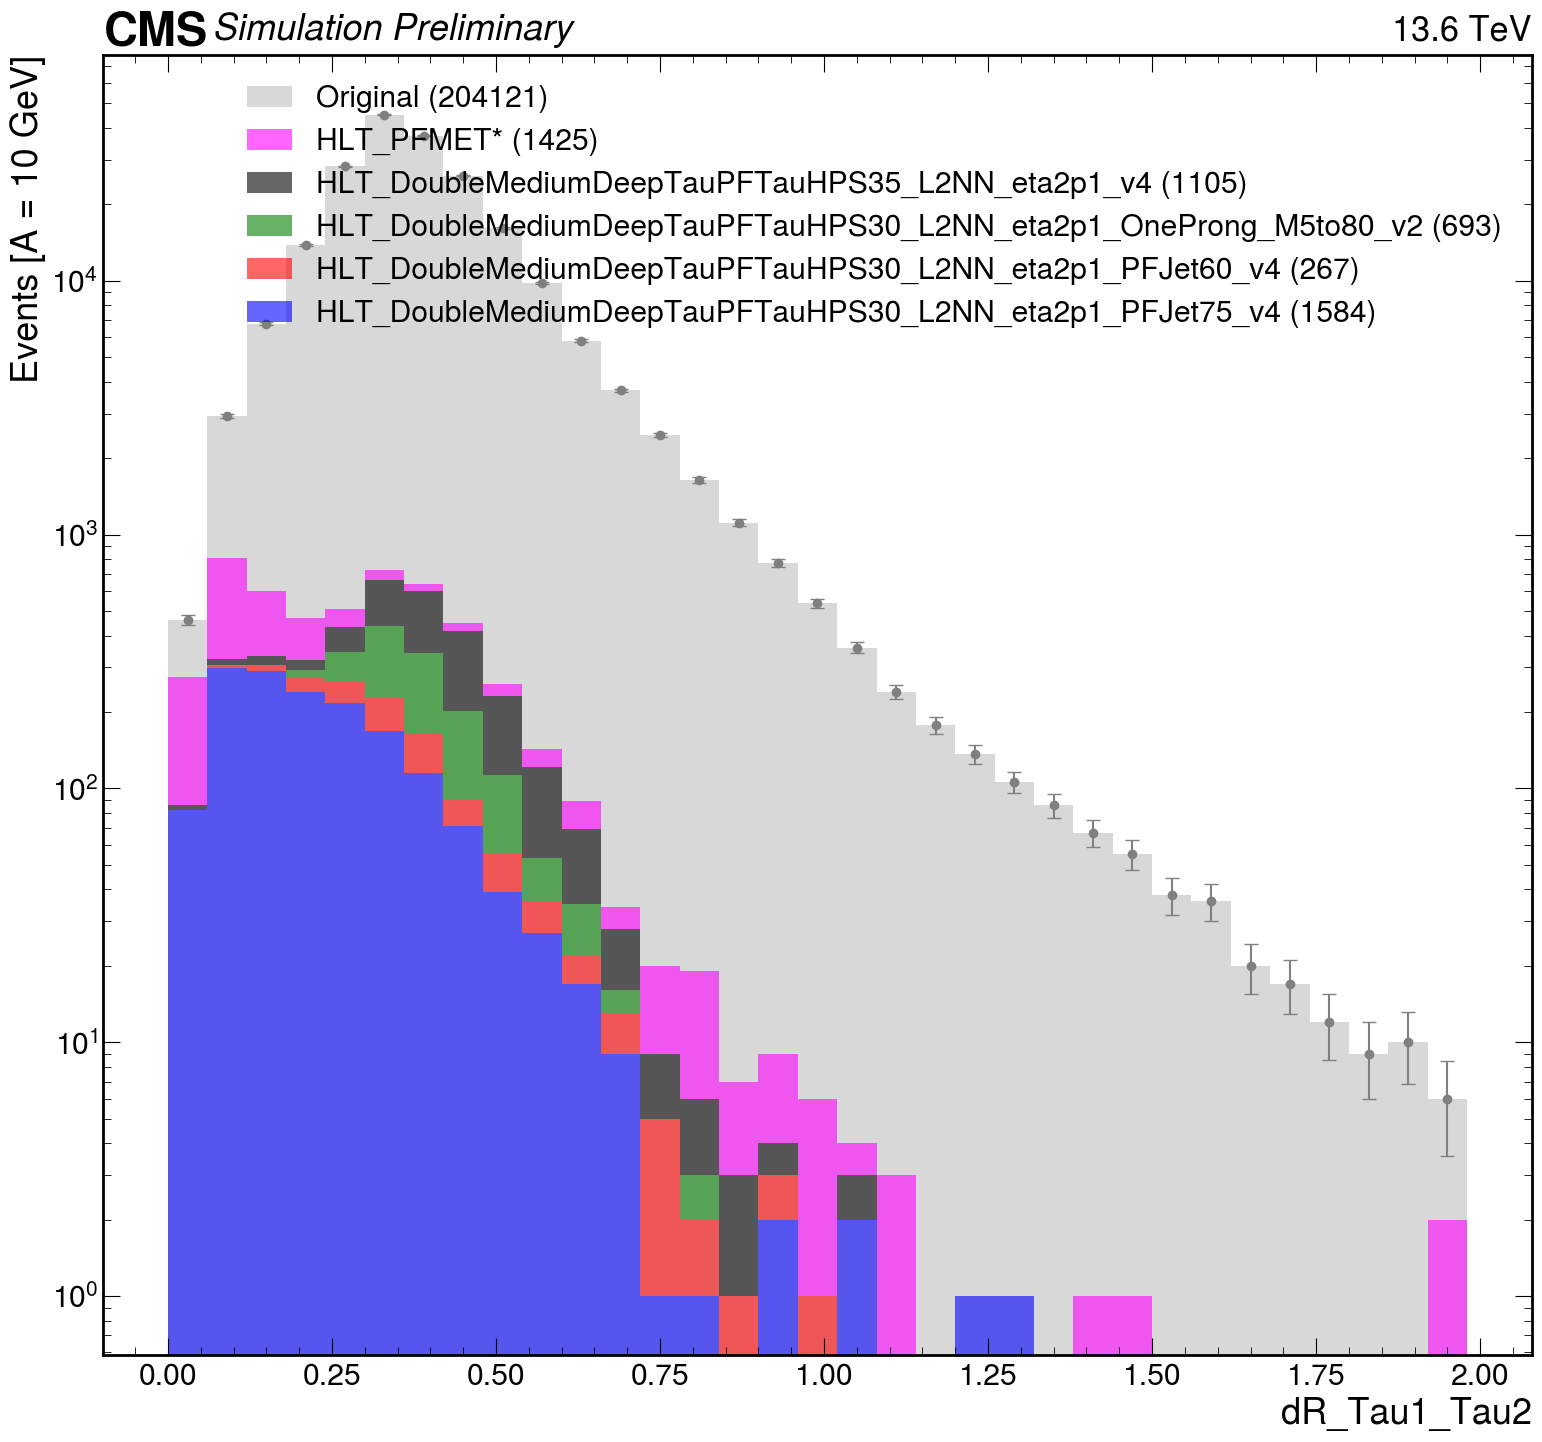

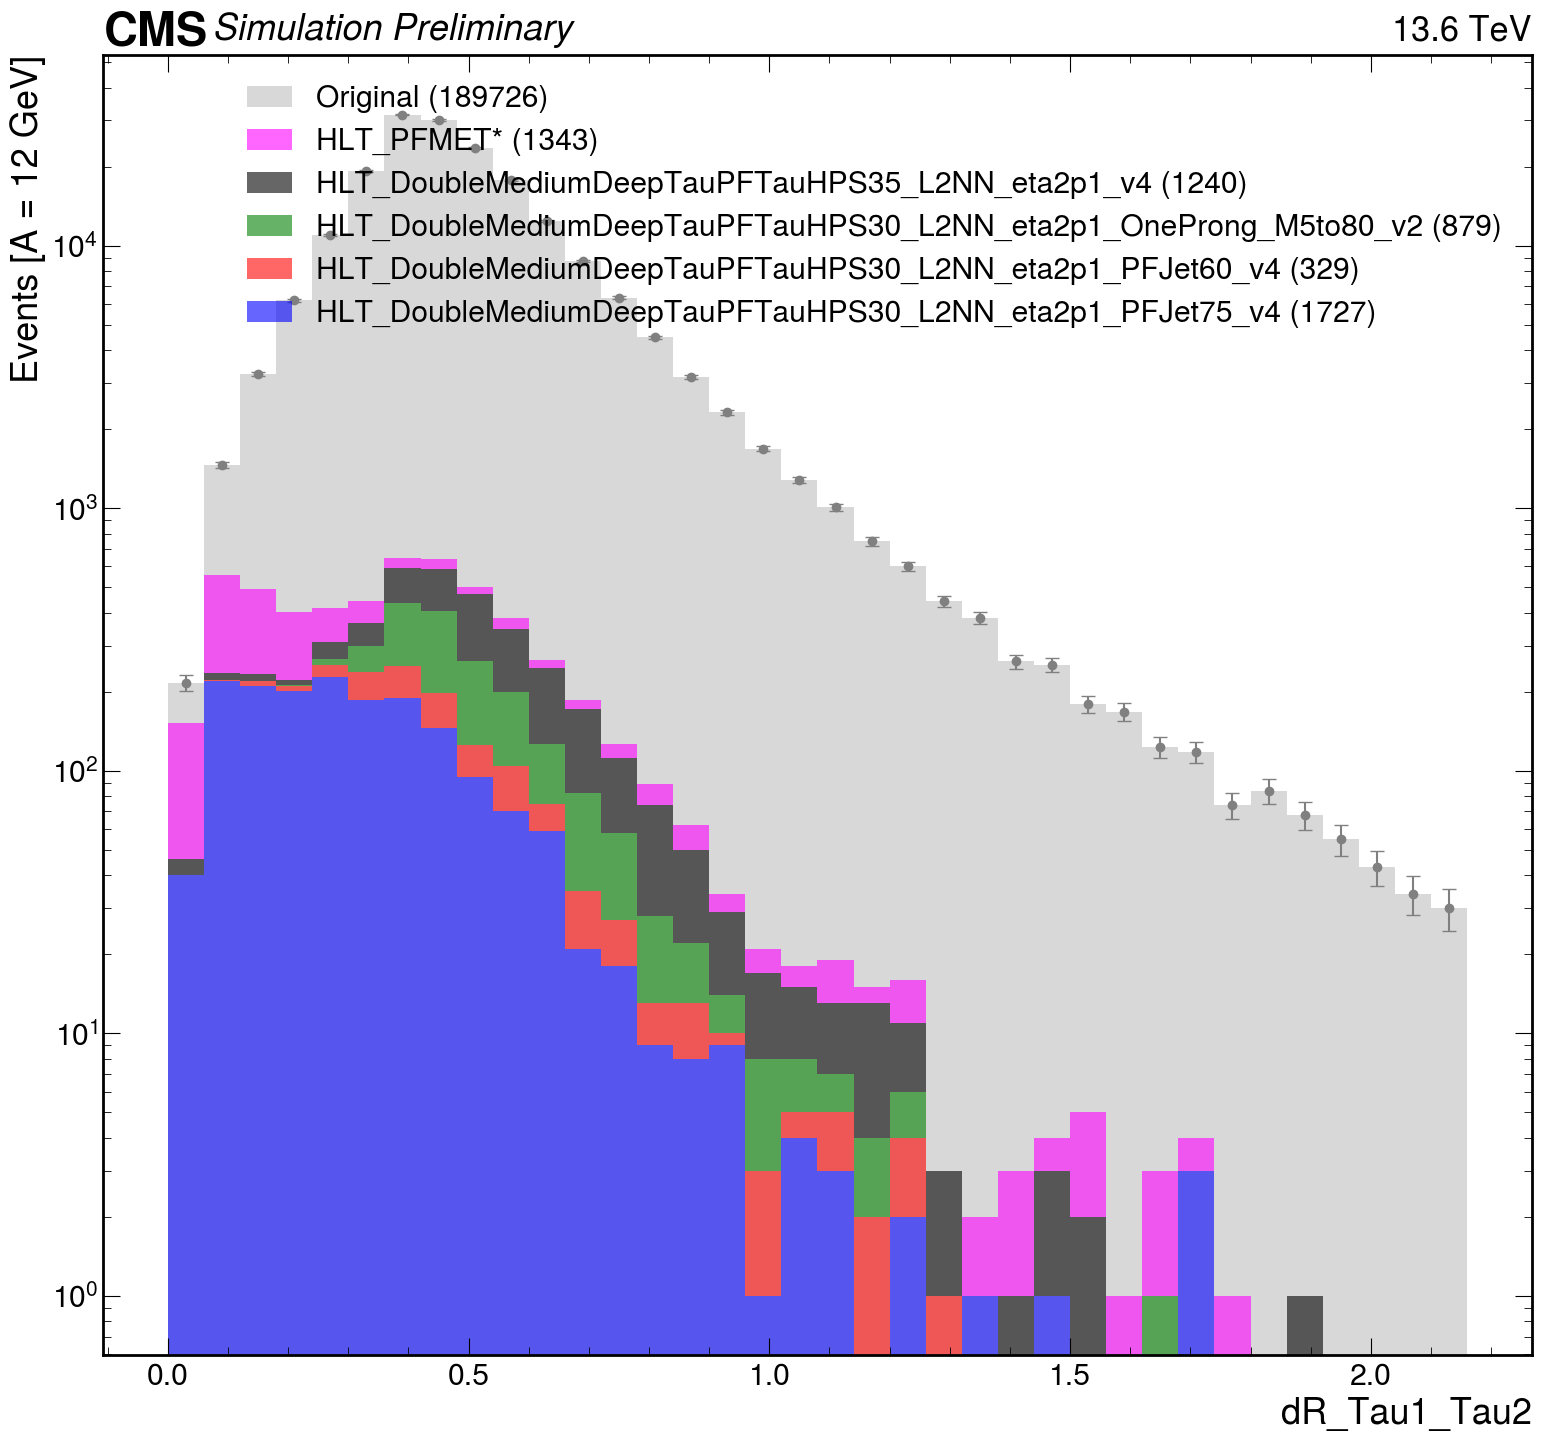

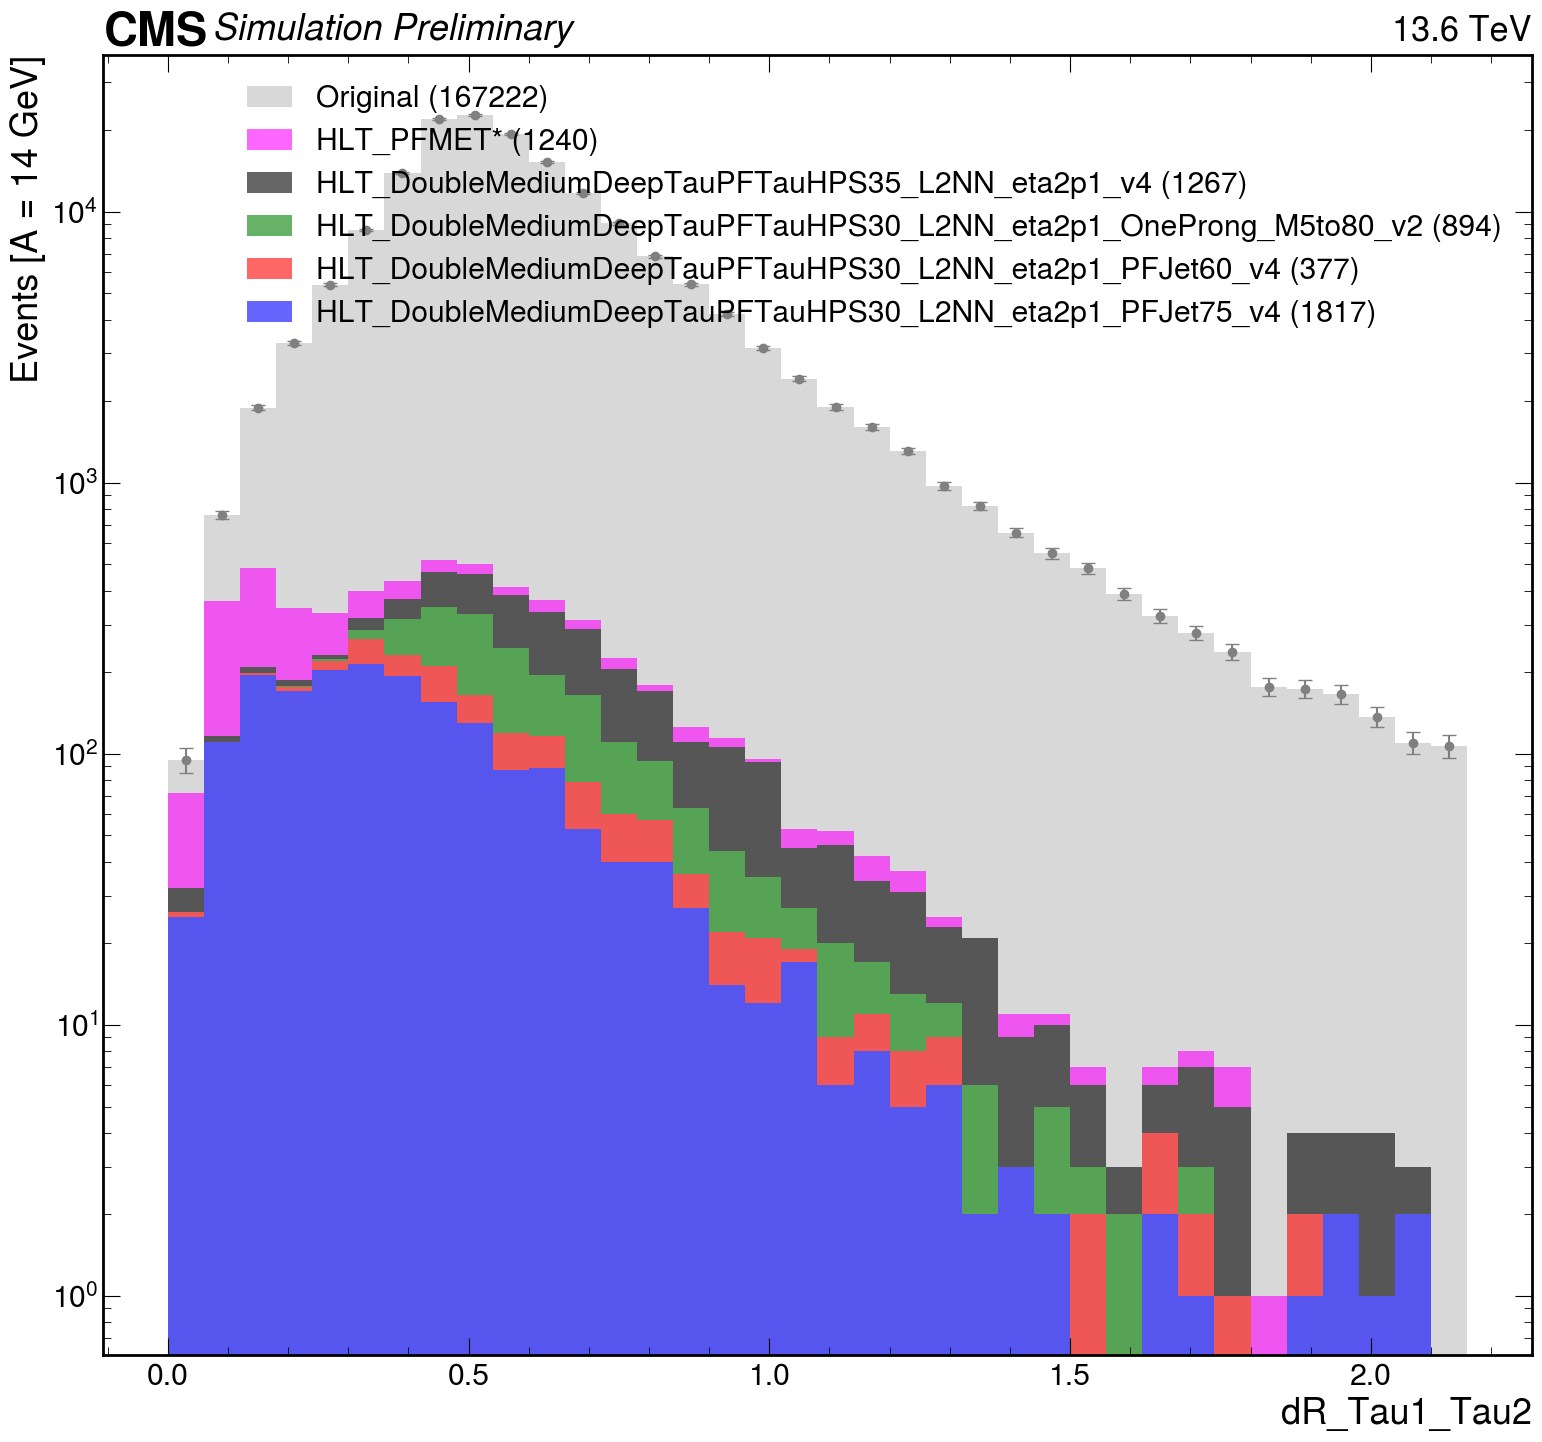

In [20]:

# Define triggers and corresponding labels
trigger_prefix = [
    "HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_PFJet75_v4", 
    "HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_PFJet60_v4", 
    "HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_OneProng_M5to80_v2",
    "HLT_DoubleMediumDeepTauPFTauHPS35_L2NN_eta2p1_v4",
    "HLT_PFMET*", 
    
]
triggers = ["eta2p1_PFJet75_v4", "eta2p1_PFJet60_v4", "eta2p1_OneProng_M5to80_v2", "eta2p1_v4", "HLT_PFMET"]

# Define mass bins, RHTree list, and colors
bins = [bins_m3p7, bins_m4, bins_m5, bins_m6, bins_m8, bins_m10, bins_m12, bins_m14]
RHTree_list = [RHTree_m3p7, RHTree_m4, RHTree_m5, RHTree_m6, RHTree_m8, RHTree_m10, RHTree_m12, RHTree_m14]
mass = [3.7, 4, 5, 6, 8, 10, 12, 14]
color = ['b', 'r', 'g', 'black', 'magenta', 'orange', 'cyan', 'purple']

for j, RHTree in enumerate(RHTree_list):
    # Extract all dR_Tau1_Tau2 events
    dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"], library="pd")["dR_Tau1_Tau2"].values
    total_events = len(dR_Tau1_Tau2)

    # Create a boolean mask initialized as "not selected"
    selected_mask = np.zeros(total_events, dtype=bool)

    # Create figure
    fig, ax = plt.subplots(figsize=(16, 15))

    # Plot original histogram (gray background)
    hist_values_o, bin_edges_o, _ = ax.hist(
        dR_Tau1_Tau2, bins=bins[j], color='grey', alpha=0.3, 
        label=f"Original ({total_events})", density=False
    )
    bin_centers_o = (bin_edges_o[:-1] + bin_edges_o[1:]) / 2
    errors_o = np.sqrt(hist_values_o)
    ax.errorbar(bin_centers_o, hist_values_o, yerr=errors_o, fmt='o', capsize=5, color='grey')

    # Prepare lists for exclusive event selections
    exclusive_data = []
    labels = []

    for i, trigger in enumerate(triggers):
        # Select events passing the current trigger
        trigger_mask = RHTree.arrays([trigger], library="pd")[trigger].values > 0
        
        # Ensure events have not been selected before
        new_exclusive_mask = trigger_mask & ~selected_mask
        selected_mask |= new_exclusive_mask  # Mark these events as selected

        # Extract exclusive dR_Tau1_Tau2 values
        exclusive_dR_Tau1_Tau2 = dR_Tau1_Tau2[new_exclusive_mask]
        exclusive_data.append(exclusive_dR_Tau1_Tau2)
        labels.append(f"{trigger_prefix[i]} ({len(exclusive_dR_Tau1_Tau2)})")

    # Plot **exclusive** histograms (stacked)
    ax.hist(exclusive_data, bins=bins[j], stacked=True, color=color[:len(triggers)], 
            label=labels, histtype='stepfilled', alpha=0.6)

    # Set log scale
    ax.set_yscale("log")
    ax.set_xlabel("dR_Tau1_Tau2")
    ax.set_ylabel(f"Events [A = {mass[j]} GeV]")
    ax.legend()
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
    plt.tight_layout()
    plt.show()


Totgal entry 280008 triggered 2768
Totgal entry 288633 triggered 2706
Totgal entry 278963 triggered 2869
Totgal entry 258260 triggered 2774
Totgal entry 237554 triggered 2863
Totgal entry 215475 triggered 2980
Totgal entry 202506 triggered 3243
Totgal entry 189209 triggered 3385


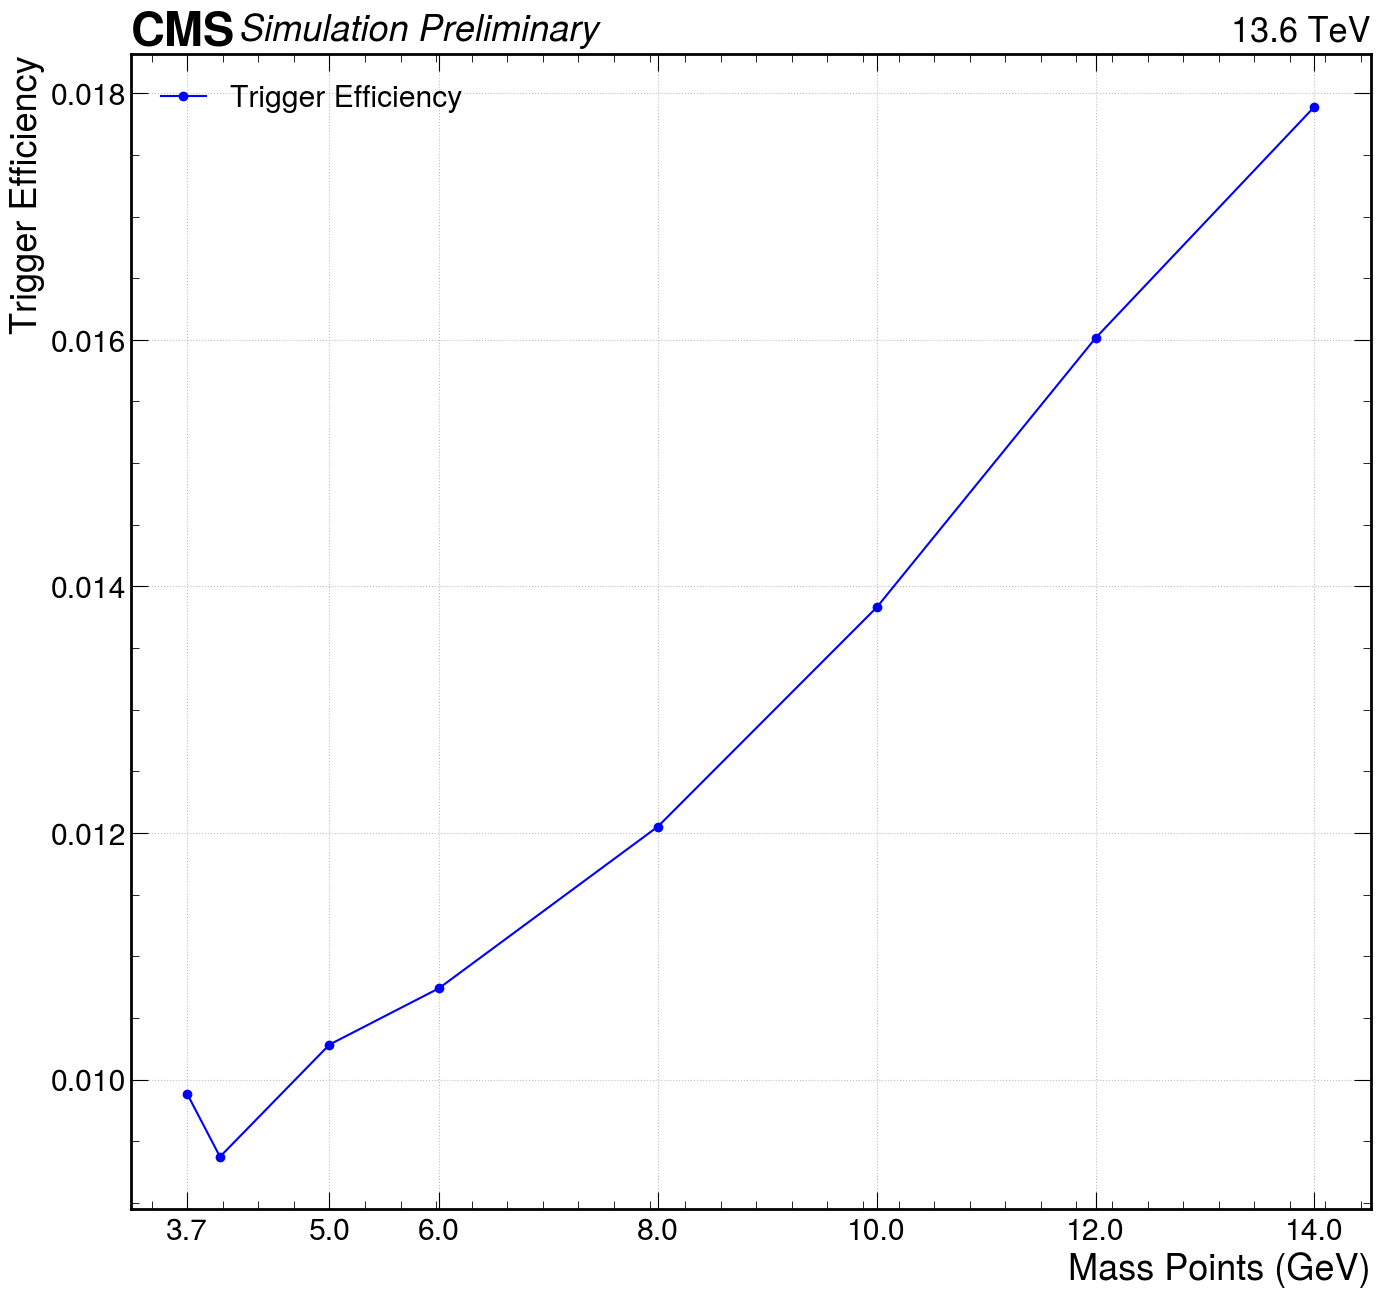

In [200]:
bins_m3p7=np.arange(0,0.06,0.002)
bins_m4=np.arange(0,0.115,0.004)
bins_m5=np.arange(0,0.3,0.01)
bins_m6=np.arange(0,0.51,0.02)
bins_m8=np.arange(0,1,0.03)
bins_m10=np.arange(0,2,0.06)
bins_m12=np.arange(0,2.2,0.06)
bins_m14=np.arange(0,2.2,0.06)
bins = [bins_m3p7, bins_m4, bins_m5, bins_m6, bins_m8, bins_m10, bins_m12, bins_m14]
RHTree_list = [RHTree_m3p7, RHTree_m4, RHTree_m5, RHTree_m6, RHTree_m8,RHTree_m10, RHTree_m12, RHTree_m14]
mass = [3.7, 4, 5, 6, 8, 10, 12, 14]
total_events = []
triggered_events = []
for i, RHTree in enumerate(RHTree_list):
    dR_Tau1_Tau2_after_trigger = RHTree.arrays(["dR_Tau1_Tau2"], "pass_trigges > 0", library="numpy")["dR_Tau1_Tau2"]
    dR_Tau1_Tau2_flat = np.concatenate(dR_Tau1_Tau2_after_trigger)
    dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
    print("Totgal entry", len(dR_Tau1_Tau2), "triggered", len(dR_Tau1_Tau2_flat))
    total_events.append(len(dR_Tau1_Tau2))
    triggered_events.append(len(dR_Tau1_Tau2_flat))
    
# Compute efficiency
efficiency = np.array(triggered_events) / np.array(total_events)

# Plot
fig, ax = plt.subplots(figsize=(16,15))
plt.plot(mass, efficiency, marker='o', linestyle='-', color='b', label='Trigger Efficiency')
# Labels and title
plt.xlabel("Mass Points (GeV)")
plt.ylabel("Trigger Efficiency")
# plt.yscale("log")  # If you want a logarithmic y-axis, otherwise remove this line
plt.xticks([3.7, 5, 6, 8, 10, 12, 14])  # Ensure mass points are correctly labeled on x-axis
plt.grid(True)
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

# Show plot
plt.show()

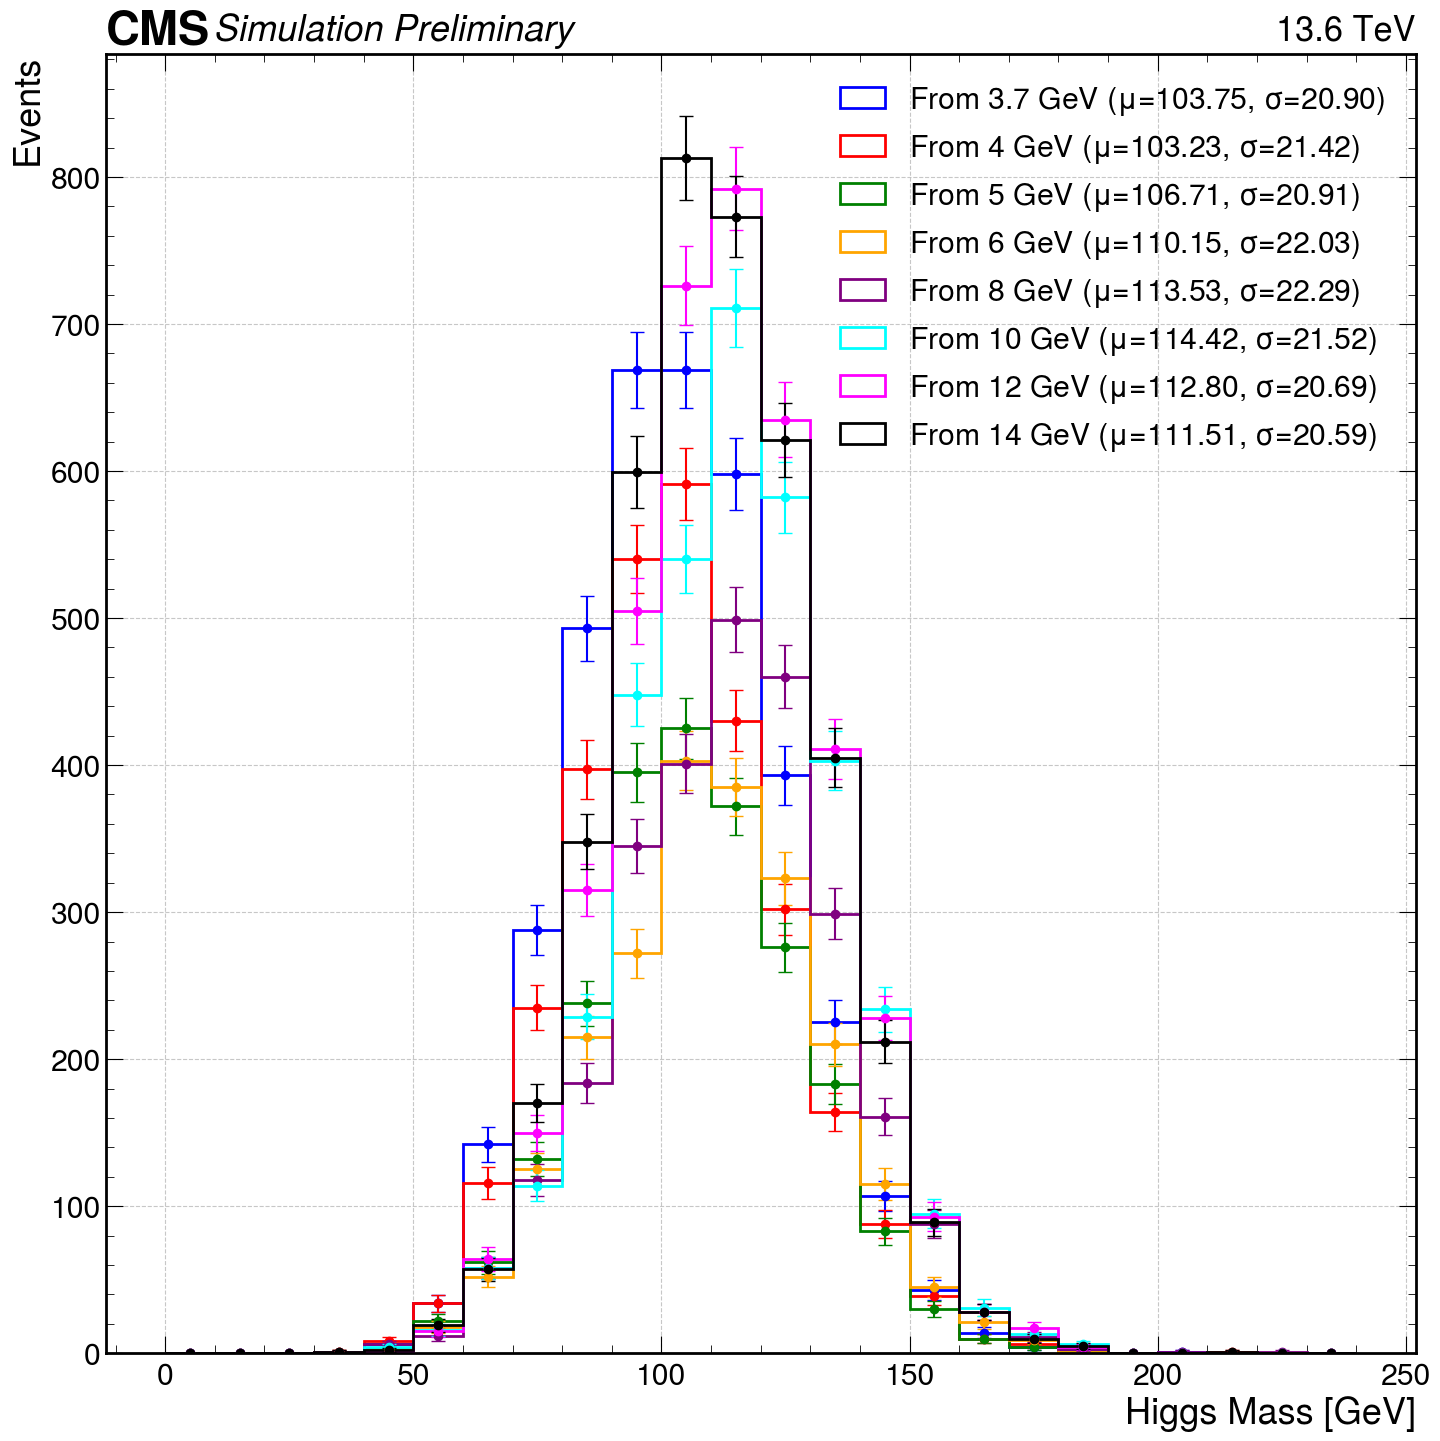

In [221]:

# Define the triggers
triggers = ["eta2p1_v4", "eta2p1_PFJet60_v4", "eta2p1_PFJet75_v4", "eta2p1_OneProng_M5to80_v2"]

# Define colors (Ensure enough colors or cycle through them)
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Define bins
bins = np.arange(0, 250, 10)

# Loop over RHTree_list
for j, RHTree in enumerate(RHTree_list):
    # Load required data from the ROOT file
    arrays = RHTree.arrays(["H_mass_jet_reco"] + triggers, library="numpy")

    # Compute OR condition across triggers for this dataset
    trigger_mask = np.any([arrays[trigger] > 0 for trigger in triggers], axis=0)

    # Select Higgs mass values passing at least one trigger AND H_mass_jet_reco > 0
    H_mass_jet_reco = arrays["H_mass_jet_reco"]
    H_mass_jet_reco_triggered = H_mass_jet_reco[(trigger_mask) & (H_mass_jet_reco > 0)]

    # Compute histogram
    hist_values, bin_edges = np.histogram(H_mass_jet_reco_triggered, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
    errors = np.sqrt(hist_values)  # Poisson errors

    # Compute mean and standard deviation
    mu_triggered = np.mean(H_mass_jet_reco_triggered)
    sigma_triggered = np.std(H_mass_jet_reco_triggered)

    # Plot histogram
    ax.hist(H_mass_jet_reco_triggered, bins=bins, histtype='step', linewidth=2, 
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"From {mass[j]} GeV ($\\mu$={mu_triggered:.2f}, $\\sigma$={sigma_triggered:.2f})")

    # Add error bars
    ax.errorbar(bin_centers, hist_values, yerr=errors, fmt='o', color=colors[j % len(colors)], capsize=5, label=None)

# Labels and title
ax.set_ylabel("Events")
ax.set_xlabel("Higgs Mass [GeV]")

# Legend
ax.legend()

# CMS Label
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

# Grid for better readability
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


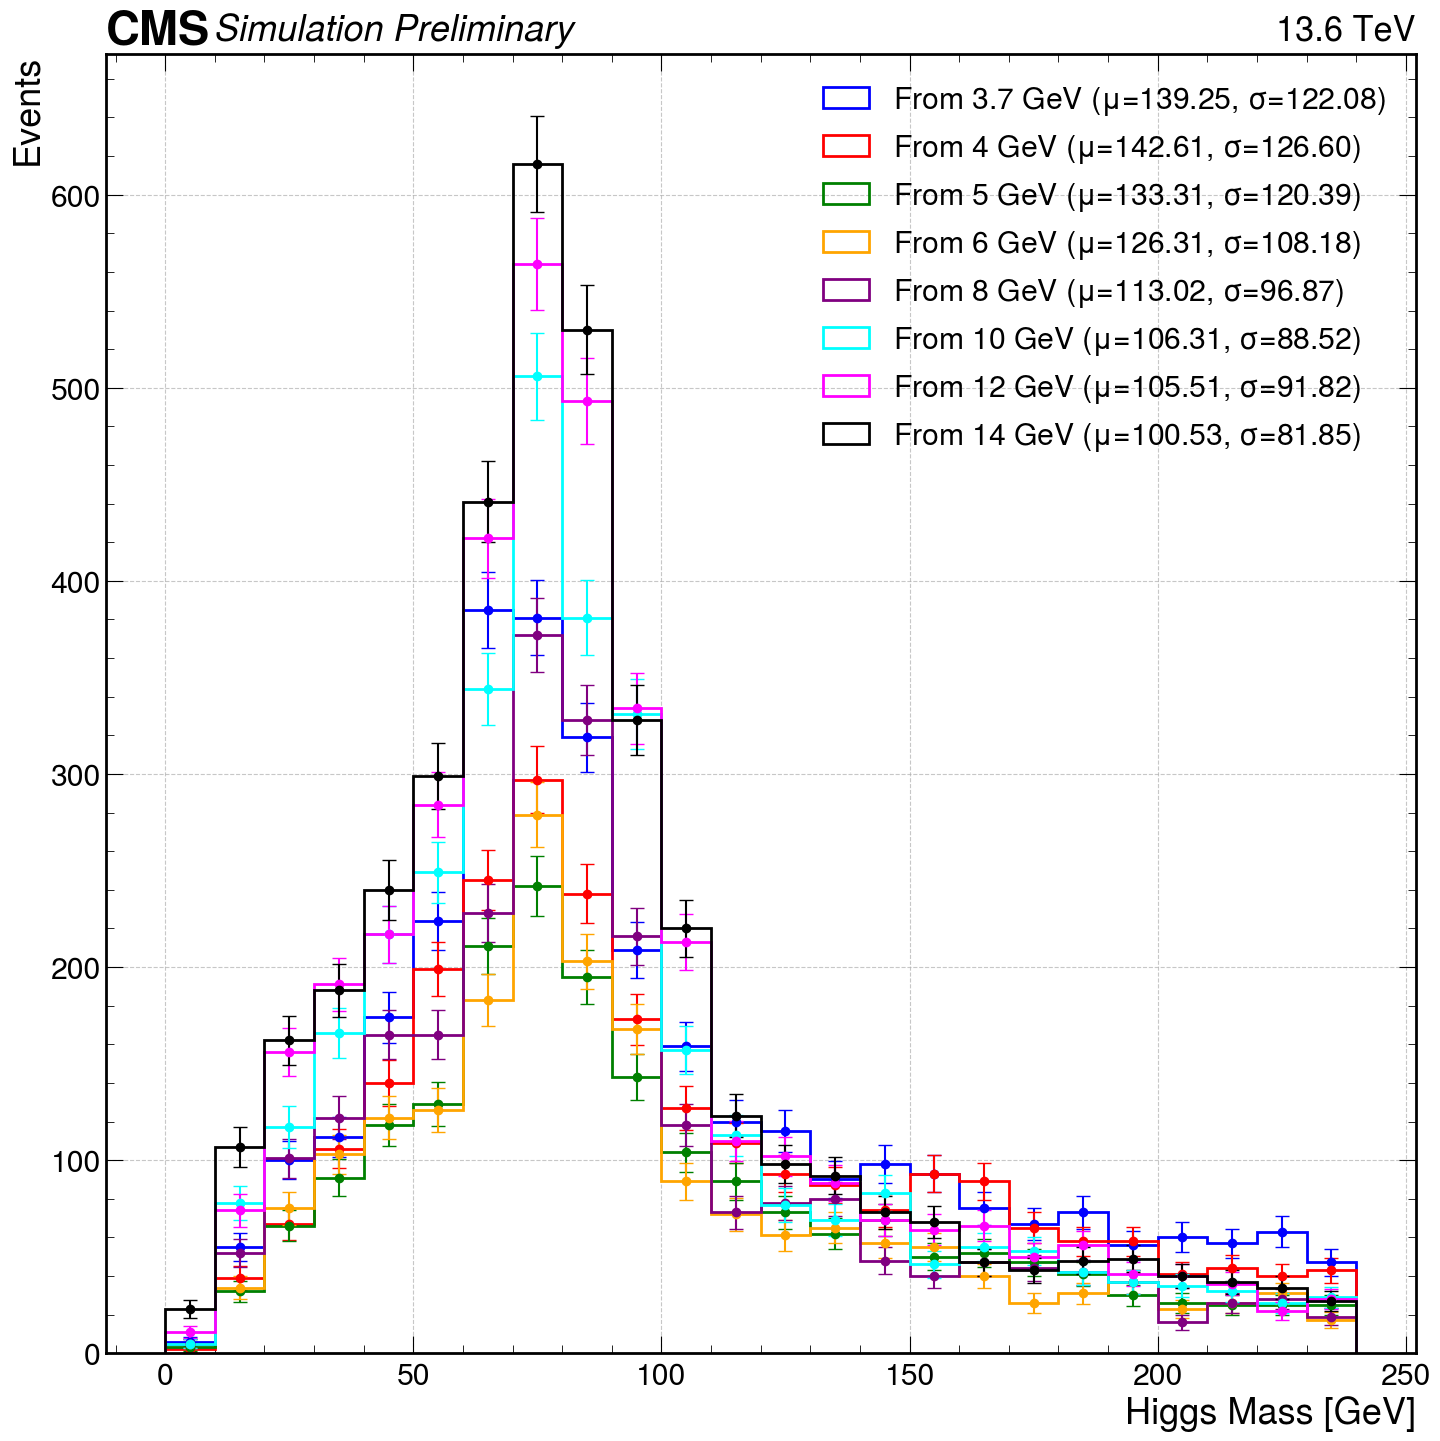

In [222]:



# Define the triggers
triggers = ["eta2p1_v4", "eta2p1_PFJet60_v4", "eta2p1_PFJet75_v4", "eta2p1_OneProng_M5to80_v2"]

# Define colors (Ensure enough colors or cycle through them)
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Define bins
bins = np.arange(0, 250, 10)

# Loop over RHTree_list
for j, RHTree in enumerate(RHTree_list):
    # Load required data from the ROOT file
    arrays = RHTree.arrays(["H_mass_tau_reco"] + triggers, library="numpy")

    # Compute OR condition across triggers for this dataset
    trigger_mask = np.any([arrays[trigger] > 0 for trigger in triggers], axis=0)

    # Select Higgs mass values passing at least one trigger AND H_mass_tau_reco > 0
    H_mass_tau_reco = arrays["H_mass_tau_reco"]
    H_mass_tau_reco_triggered = H_mass_tau_reco[(trigger_mask) & (H_mass_tau_reco > 0)]

    # Compute histogram
    hist_values, bin_edges = np.histogram(H_mass_tau_reco_triggered, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
    errors = np.sqrt(hist_values)  # Poisson errors

    # Compute mean and standard deviation
    mu_triggered = np.mean(H_mass_tau_reco_triggered)
    sigma_triggered = np.std(H_mass_tau_reco_triggered)

    # Plot histogram
    ax.hist(H_mass_tau_reco_triggered, bins=bins, histtype='step', linewidth=2, 
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"From {mass[j]} GeV ($\\mu$={mu_triggered:.2f}, $\\sigma$={sigma_triggered:.2f})")

    # Add error bars
    ax.errorbar(bin_centers, hist_values, yerr=errors, fmt='o', color=colors[j % len(colors)], capsize=5, label=None)

# Labels and title
ax.set_ylabel("Events")
ax.set_xlabel("Higgs Mass [GeV]")

# Legend
ax.legend()

# CMS Label
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

# Grid for better readability
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


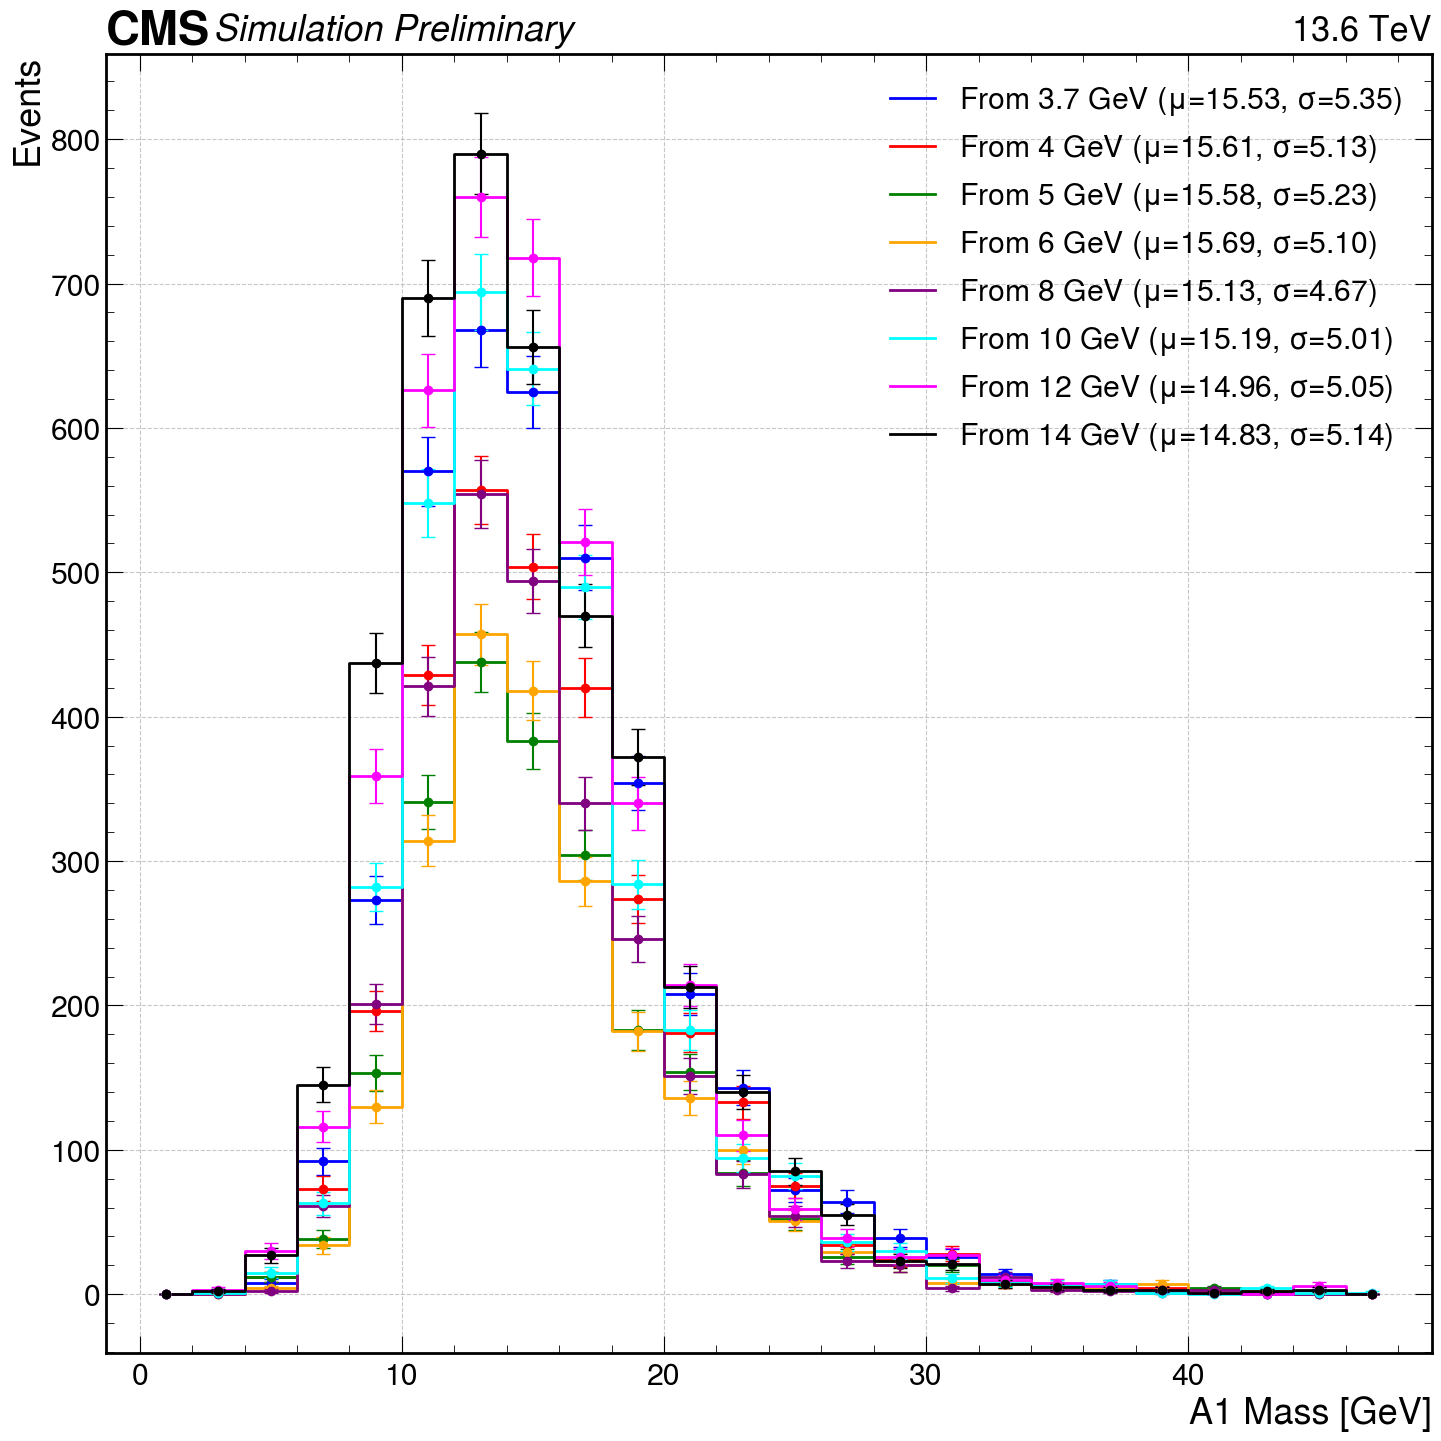

In [223]:


# Define the triggers
triggers = ["eta2p1_v4", "eta2p1_PFJet60_v4", "eta2p1_PFJet75_v4", "eta2p1_OneProng_M5to80_v2"]

# Define colors (Ensure enough colors or cycle through them)
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Define bin edges
bins = np.arange(0, 50, 2)  # Variable binning can be applied here

# Loop over RHTree_list
for j, RHTree in enumerate(RHTree_list):
    # Load required data from the ROOT file
    arrays = RHTree.arrays(["A1_mass_jet_reco"] + triggers, library="numpy")

    # Compute OR condition across triggers for this dataset
    trigger_mask = np.any([arrays[trigger] > 0 for trigger in triggers], axis=0)

    # Select mass values passing at least one trigger AND A1_mass_jet_reco > 0
    A1_mass_jet_reco = arrays["A1_mass_jet_reco"]
    A1_mass_jet_reco_triggered = A1_mass_jet_reco[(trigger_mask) & (A1_mass_jet_reco > 0)]

    # Compute histogram values
    counts, bin_edges = np.histogram(A1_mass_jet_reco_triggered, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
    errors = np.sqrt(counts)  # Poisson error sqrt(N)

    # Compute mean and standard deviation
    mu_triggered = np.mean(A1_mass_jet_reco_triggered)
    sigma_triggered = np.std(A1_mass_jet_reco_triggered)

    # Plot histogram using step function
    ax.step(bin_centers, counts, where='mid', linewidth=2, color=colors[j % len(colors)],
            label=f"From {mass[j]} GeV ($\\mu$={mu_triggered:.2f}, $\\sigma$={sigma_triggered:.2f})")

    # Add error bars
    ax.errorbar(bin_centers, counts, yerr=errors, fmt='o', color=colors[j % len(colors)], capsize=5)

# Labels and title
ax.set_ylabel("Events")
ax.set_xlabel("A1 Mass [GeV]")

# Legend
ax.legend()

# CMS Label
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

# Grid for better readability
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


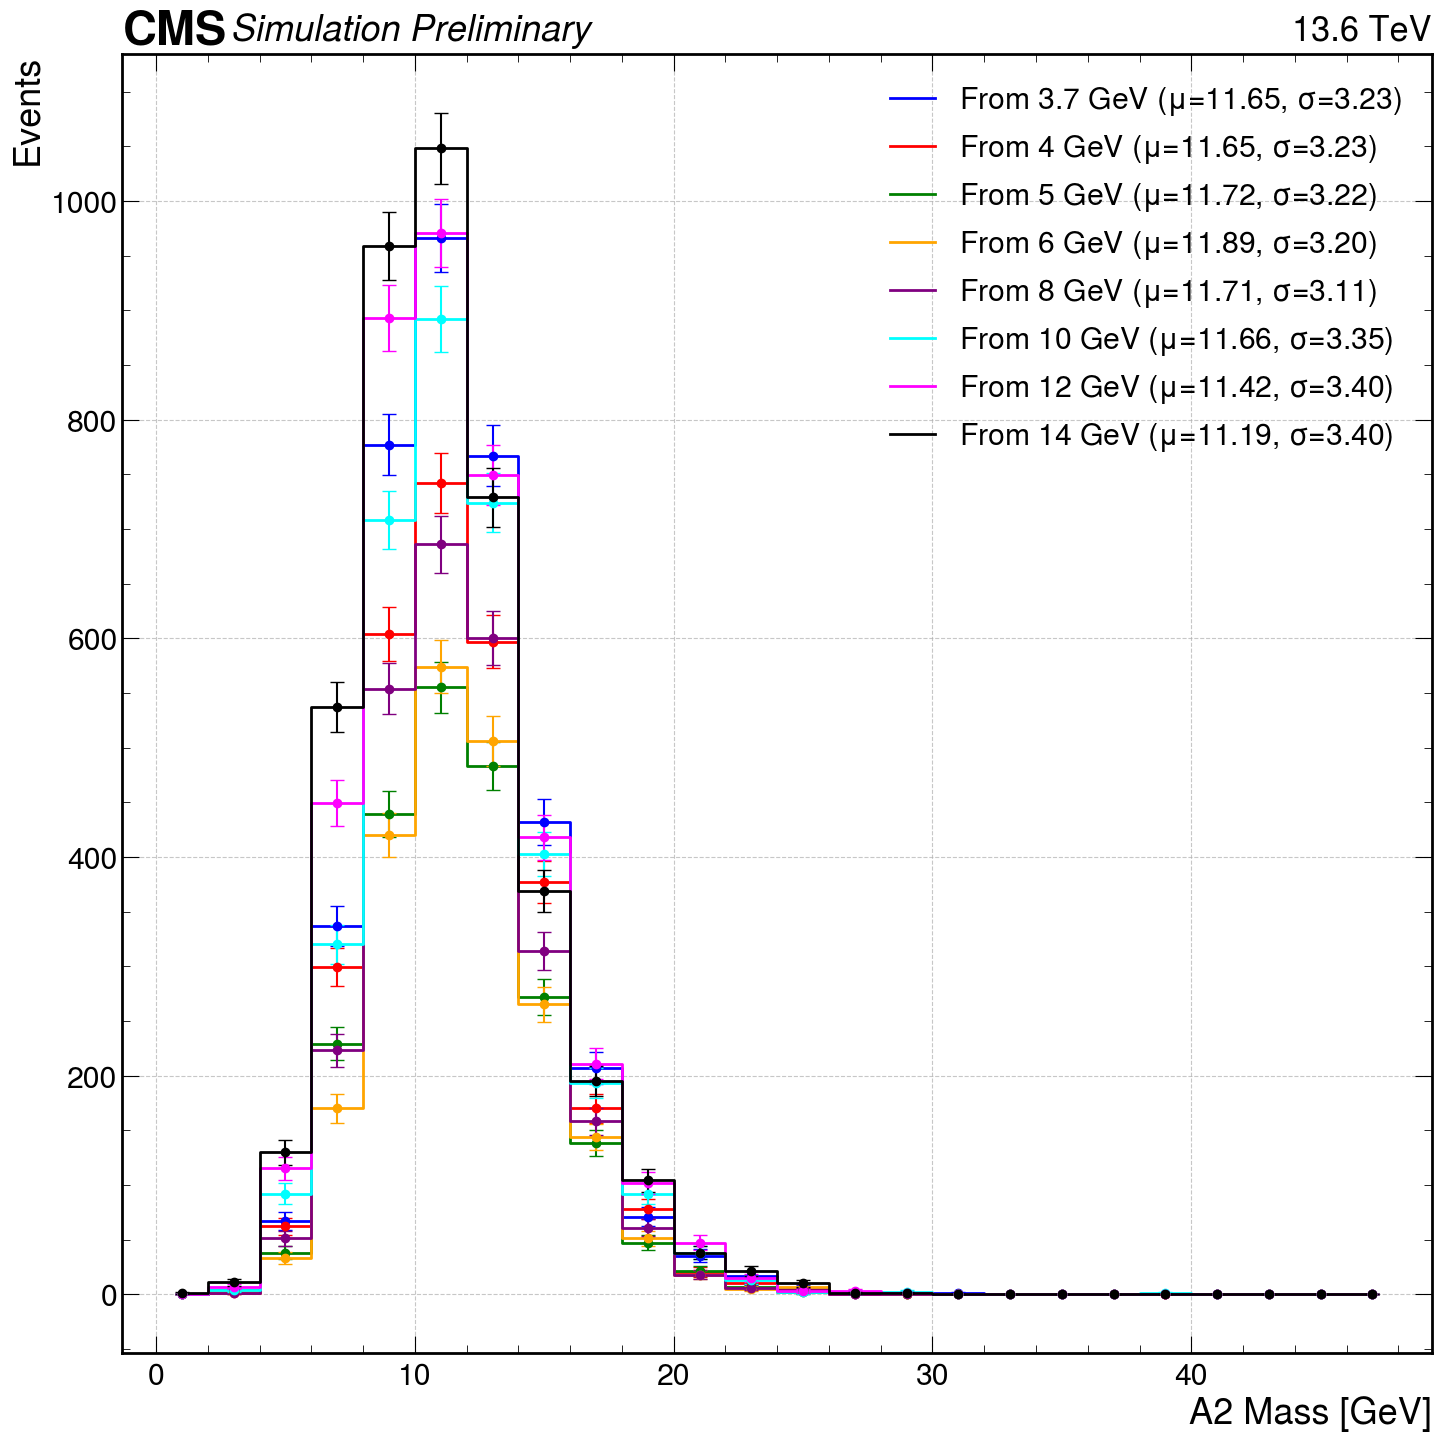

In [224]:


# Define the triggers
triggers = ["eta2p1_v4", "eta2p1_PFJet60_v4", "eta2p1_PFJet75_v4", "eta2p1_OneProng_M5to80_v2"]

# Define colors (Ensure enough colors or cycle through them)
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Define bin edges
bins = np.arange(0, 50, 2)  # Example binning, modify as needed

# Loop over RHTree_list
for j, RHTree in enumerate(RHTree_list):
    # Load required data from the ROOT file
    arrays = RHTree.arrays(["A2_mass_jet_reco"] + triggers, library="numpy")

    # Compute OR condition across triggers for this dataset
    trigger_mask = np.any([arrays[trigger] > 0 for trigger in triggers], axis=0)

    # Select mass values passing at least one trigger AND A2_mass_jet_reco > 0
    A2_mass_jet_reco = arrays["A2_mass_jet_reco"]
    A2_mass_jet_reco_triggered = A2_mass_jet_reco[(trigger_mask) & (A2_mass_jet_reco > 0)]

    # Compute histogram values
    counts, bin_edges = np.histogram(A2_mass_jet_reco_triggered, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
    errors = np.sqrt(counts)  # Poisson error sqrt(N)

    # Compute mean and standard deviation
    mu_triggered = np.mean(A2_mass_jet_reco_triggered)
    sigma_triggered = np.std(A2_mass_jet_reco_triggered)

    # Plot histogram using step function
    ax.step(bin_centers, counts, where='mid', linewidth=2, color=colors[j % len(colors)],
            label=f"From {mass[j]} GeV ($\\mu$={mu_triggered:.2f}, $\\sigma$={sigma_triggered:.2f})")

    # Add error bars
    ax.errorbar(bin_centers, counts, yerr=errors, fmt='o', color=colors[j % len(colors)], capsize=5)

# Labels and title
ax.set_ylabel("Events")
ax.set_xlabel("A2 Mass [GeV]")

# Legend
ax.legend()

# CMS Label
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

# Grid for better readability
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [225]:
RHTree.keys()
# RHTree.typenames()
# RHTree.show()

['pass_trigger',
 'eta2p1_v4',
 'eta2p1_PFJet60_v4',
 'eta2p1_PFJet75_v4',
 'eta2p1_OneProng_M5to80_v2',
 'HLT_PFMET',
 'A1_mass_jet_reco',
 'A2_mass_jet_reco',
 'H_mass_jet_reco',
 'A1_mass_tau_reco',
 'A2_mass_tau_reco',
 'H_mass_tau_reco',
 'dR_jets_reco',
 'dR_taus_reco',
 'N_matched_jets_reco',
 'N_matched_taus_reco',
 'met_e_reco',
 'met_pt_reco',
 'met_px_reco',
 'met_py_reco',
 'met_phi_reco',
 'met_significance_reco',
 'Event',
 'Run',
 'LumiSection',
 'GenHiggs_inv',
 'GenA1_inv',
 'GenA2_inv',
 'GenHiggs',
 'GenA1',
 'GenA2',
 'dR_A1_A2',
 'dR_H_A1',
 'dR_H_A2',
 'dR_A1_Tau1',
 'dR_A1_Tau2',
 'dR_A2_Tau3',
 'dR_A2_Tau4',
 'dR_Tau1_Tau2',
 'dR_Tau3_Tau4',
 'H_pt',
 'A1_pt',
 'A2_pt',
 'Tau1_pt',
 'Tau2_pt',
 'Tau3_pt',
 'Tau4_pt',
 'H_eta',
 'A1_eta',
 'A2_eta',
 'Tau1_eta',
 'Tau2_eta',
 'Tau3_eta',
 'Tau4_eta',
 'H_phi',
 'A1_phi',
 'A2_phi',
 'Tau1_phi',
 'Tau2_phi',
 'Tau3_phi',
 'Tau4_phi',
 'Tau1_Tau2_deta',
 'Tau1_Tau2_dphi',
 'Tau3_Tau4_deta',
 'Tau3_Tau4_dphi']

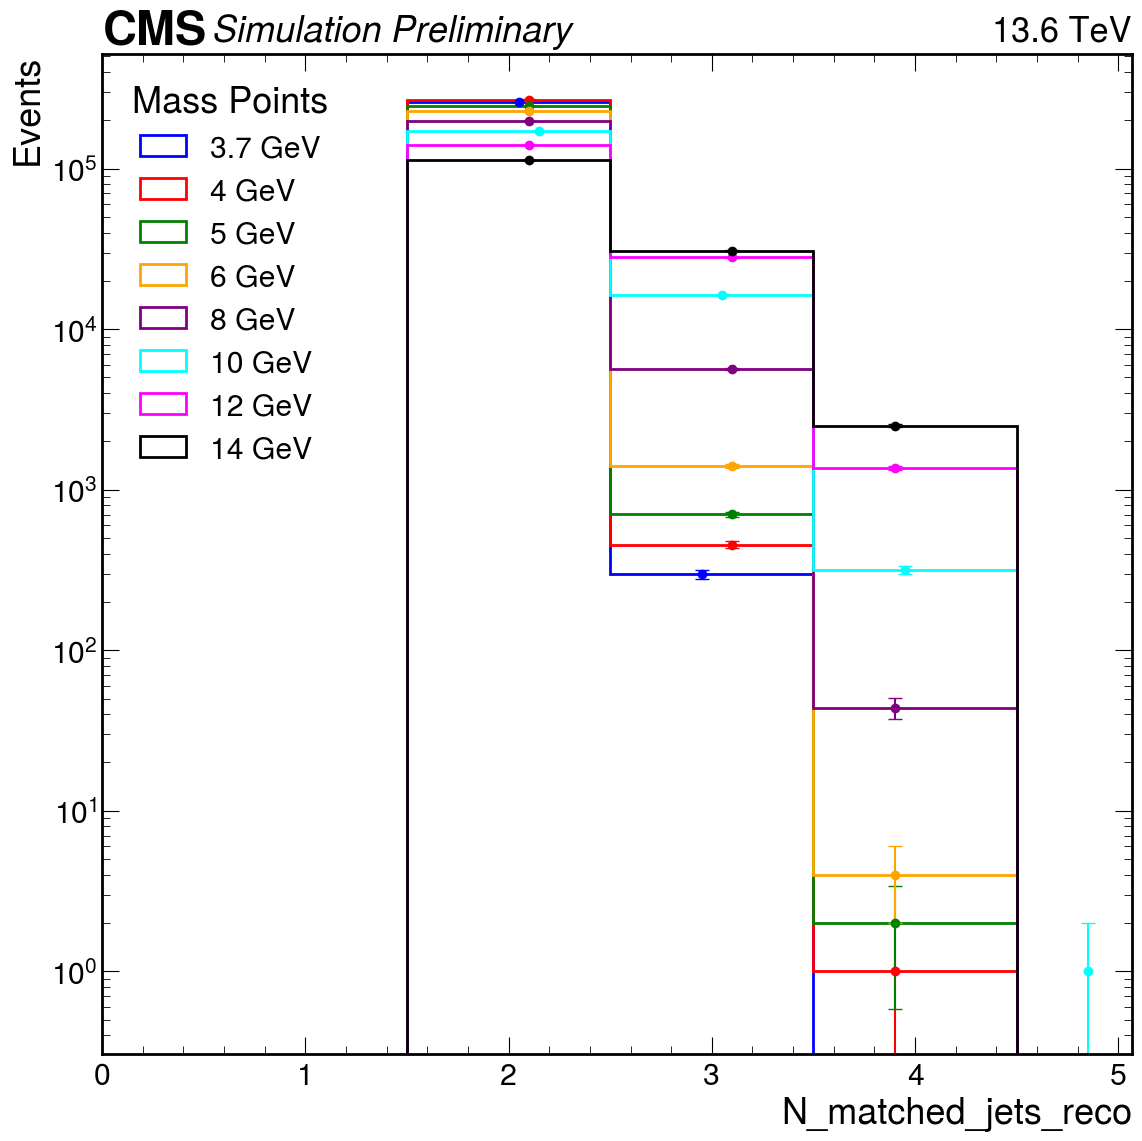

In [234]:


triggers = ["N_matched_jets_reco"]#,"dR_jets_reco","dR_taus_reco"]  # Add more if needed
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

for i, trigger in enumerate(triggers):
    fig, ax = plt.subplots(figsize=(12, 12))  # One figure per trigger
    
    for j, RHTree in enumerate(RHTree_list):
        # Extract data for trigger
        data_flat = RHTree.arrays([trigger], f"{trigger} > 0", library="numpy")[trigger]
        
        # Compute histogram (bins are centered at integers)
        bins = np.arange(1, 6, 1) - 0.5
        hist_values, bin_edges = np.histogram(data_flat)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
        errors = np.sqrt(hist_values)  # Poisson errors

        # Plot histogram
        plt.hist(
            data_flat, 
            bins=bins, 
            histtype='step', 
            linewidth=2, 
            color=colors[j], 
            label=f"{mass[j]} GeV", 
            density=False
        )

        # Add error bars
        plt.errorbar(
            bin_centers, hist_values, yerr=errors, fmt='o', color=colors[j], capsize=5)

    ax.set_yscale("log")
    ax.set_xlabel(f"{trigger}")
    ax.set_ylabel("Events")
    ax.legend(title="Mass Points")
    ax.set_xticks(np.arange(0, 6, 1)) 
    
    # CMS Label
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

    plt.tight_layout()
    plt.show()


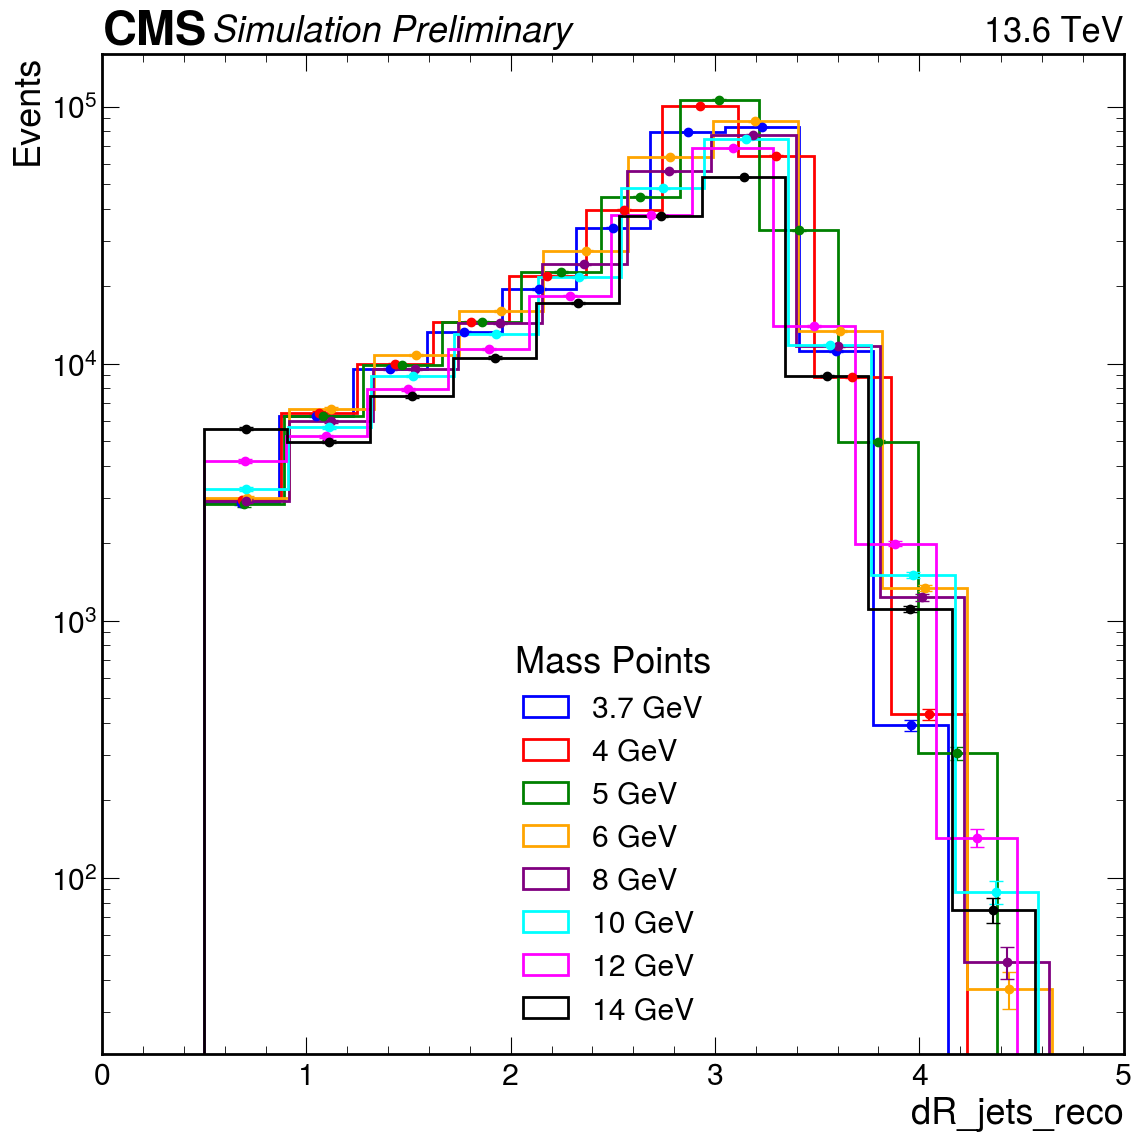

In [232]:
triggers = ["dR_jets_reco"]#,"dR_taus_reco"]  # Add more if needed
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

for i, trigger in enumerate(triggers):
    fig, ax = plt.subplots(figsize=(12, 12))  # One figure per trigger
    
    for j, RHTree in enumerate(RHTree_list):
        # Extract data for trigger
        data_flat = RHTree.arrays([trigger], f"{trigger} > 0", library="numpy")[trigger]
        
        # Compute histogram (bins are centered at integers)
        bins = np.arange(1, 6, 1) - 0.5
        hist_values, bin_edges = np.histogram(data_flat)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
        errors = np.sqrt(hist_values)  # Poisson errors

        # Plot histogram
        plt.hist(
            data_flat, 
            histtype='step', 
            linewidth=2, 
            color=colors[j], 
            label=f"{mass[j]} GeV", 
            density=False
        )

        # Add error bars
        plt.errorbar(
            bin_centers, hist_values, yerr=errors, fmt='o', color=colors[j], capsize=5)

    ax.set_yscale("log")
    ax.set_xlabel(f"{trigger}")
    ax.set_ylabel("Events")
    ax.legend(title="Mass Points")
    ax.set_xticks(np.arange(0, 6, 1)) 
    
    # CMS Label
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
    plt.tight_layout()
    plt.show()

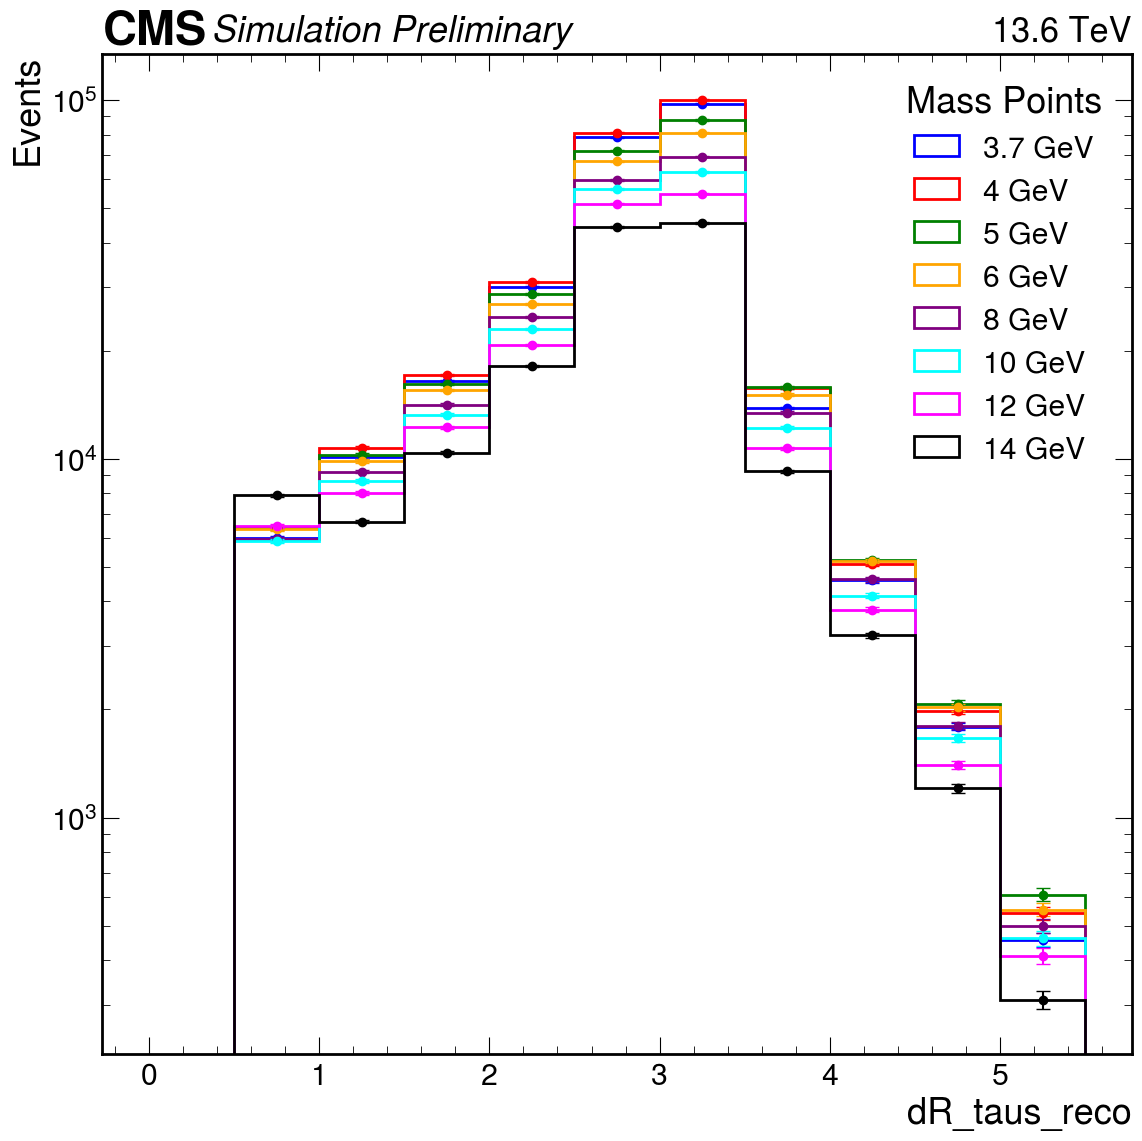

In [240]:


# Define the triggers
triggers = ["dR_taus_reco"]  # Add more if needed
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

for i, trigger in enumerate(triggers):
    fig, ax = plt.subplots(figsize=(12, 12))  # One figure per trigger

    for j, RHTree in enumerate(RHTree_list):
        # Extract data for trigger
        arrays = RHTree.arrays([trigger], library="numpy")
        data_flat = arrays[trigger]
        
        # Filter: Only keep values greater than zero
        data_flat = data_flat[data_flat > 0]

        # Define bins (centered at integers)
        bins = np.arange(0, 6, .5)  # Example binning (modify as needed)

        # Compute histogram
        hist_values, bin_edges = np.histogram(data_flat, bins=bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
        errors = np.sqrt(hist_values)  # Poisson errors

        # Plot histogram
        ax.hist(data_flat, bins=bins, histtype='step', linewidth=2,
                color=colors[j % len(colors)], label=f"{mass[j]} GeV", density=False)

        # Add error bars
        ax.errorbar(bin_centers, hist_values, yerr=errors, fmt='o', 
                    color=colors[j % len(colors)], capsize=5)

    # Set log scale for better visibility
    ax.set_yscale("log")

    # Labels and titles
    ax.set_xlabel(f"{trigger}")
    ax.set_ylabel("Events")
    ax.legend(title="Mass Points")
    ax.set_xticks(np.arange(0, 6, 1))

    # CMS Label
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

    # Show plot
    plt.tight_layout()
    plt.show()


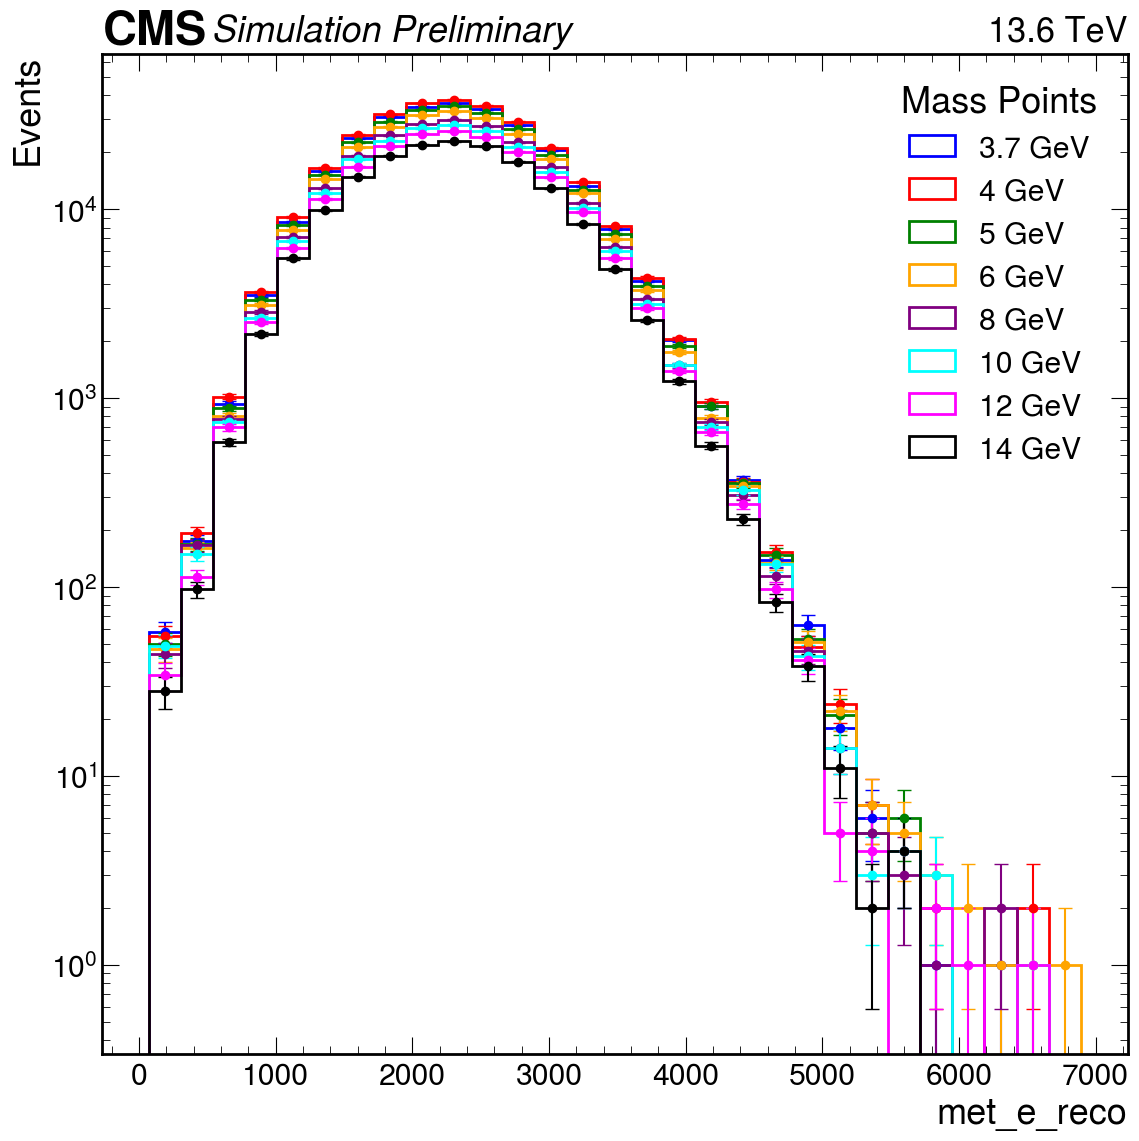

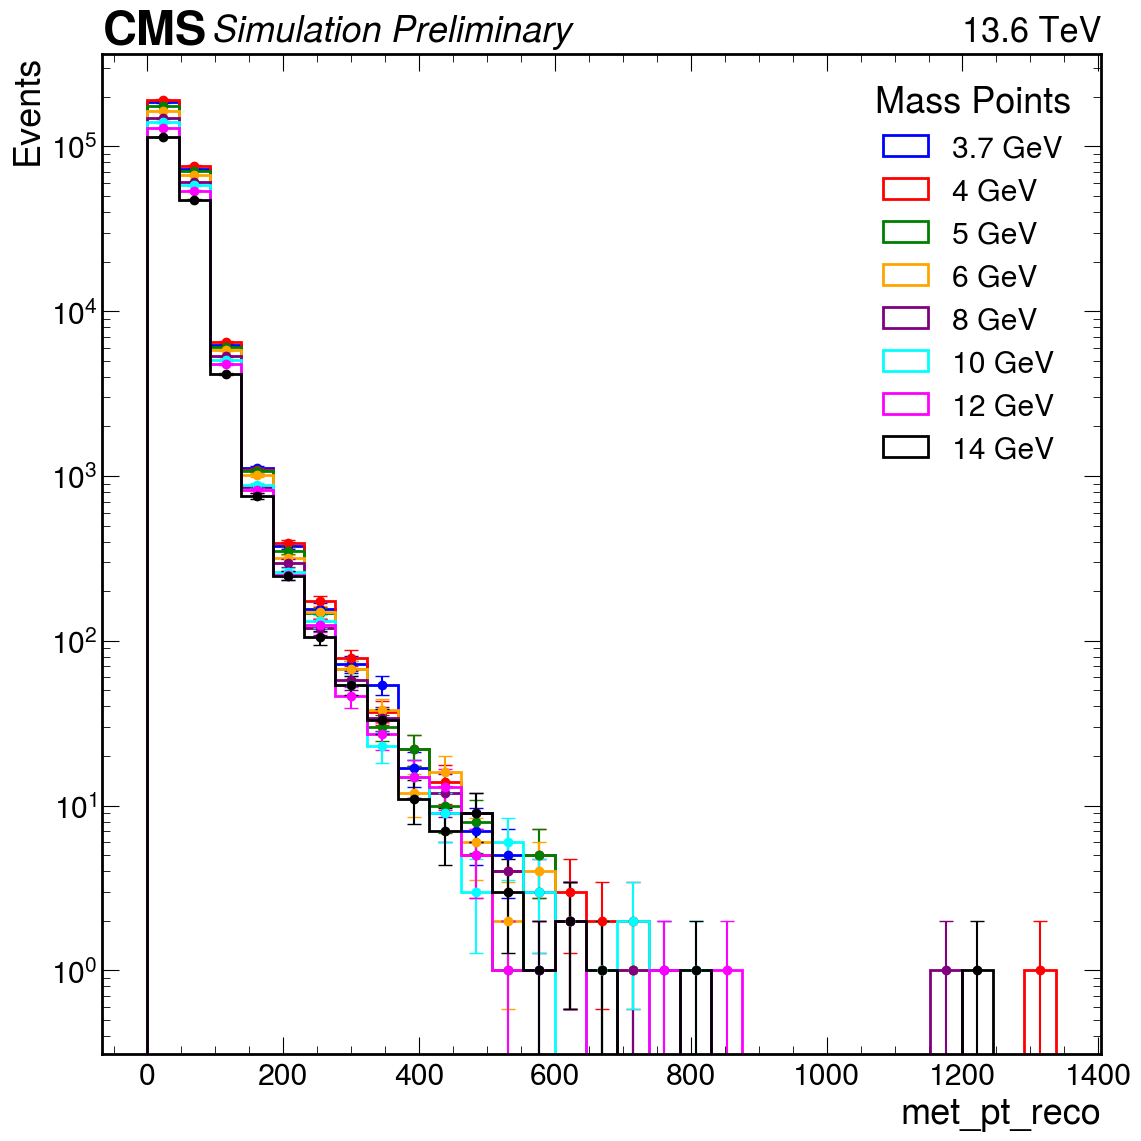

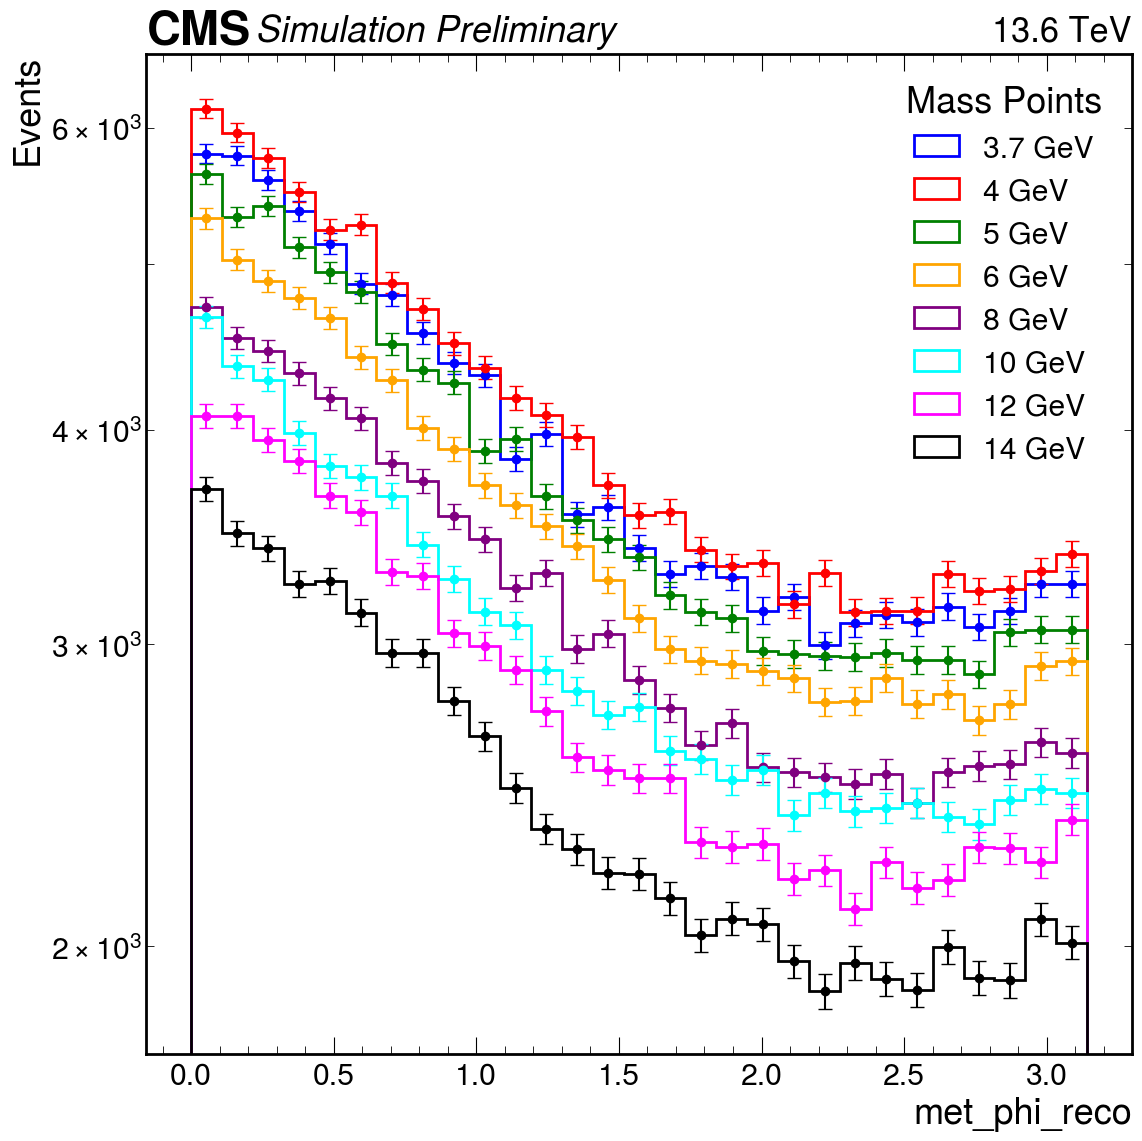

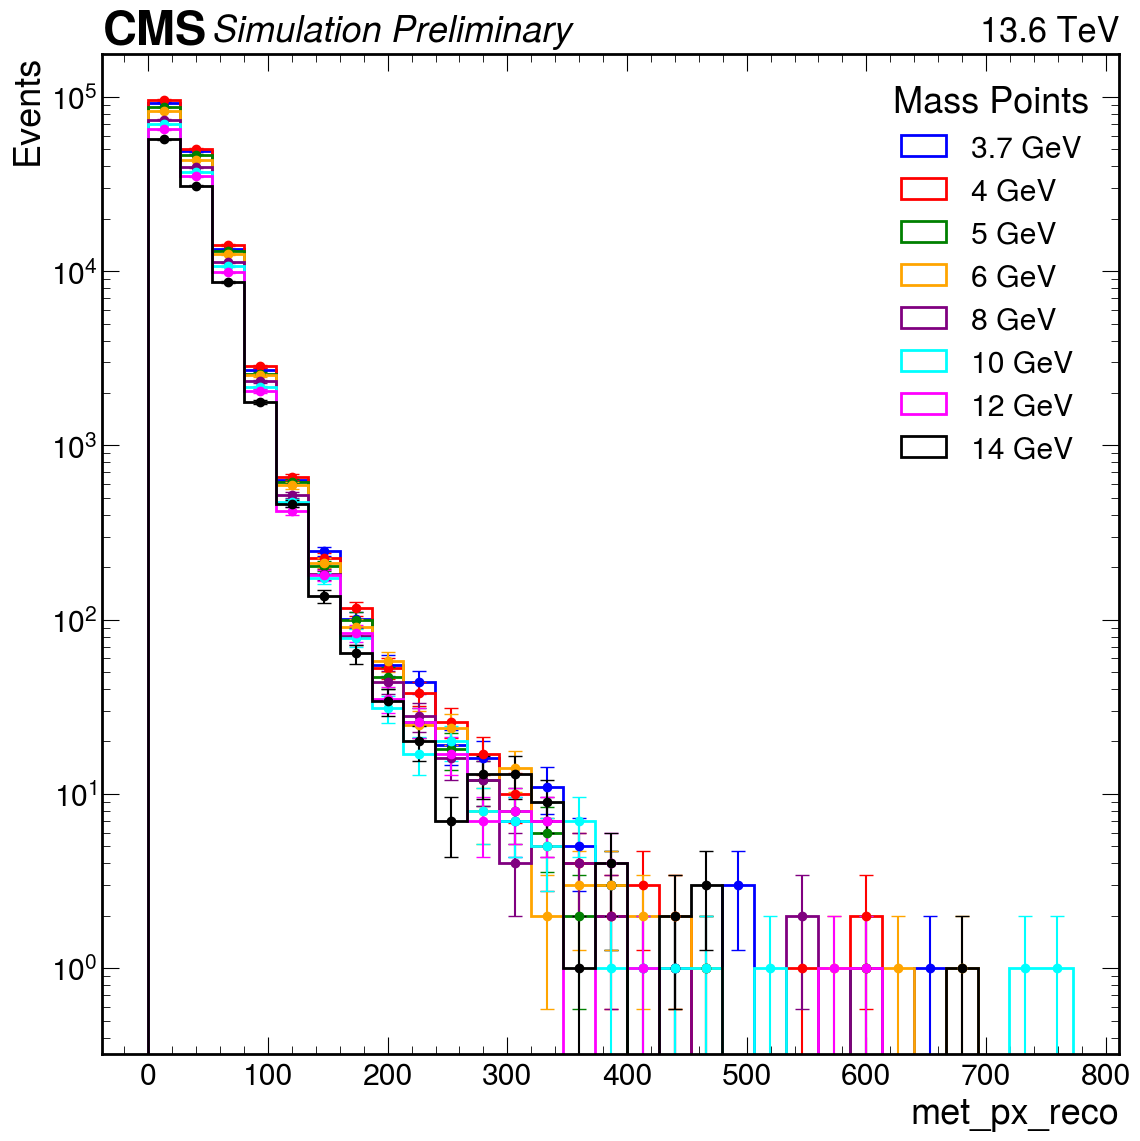

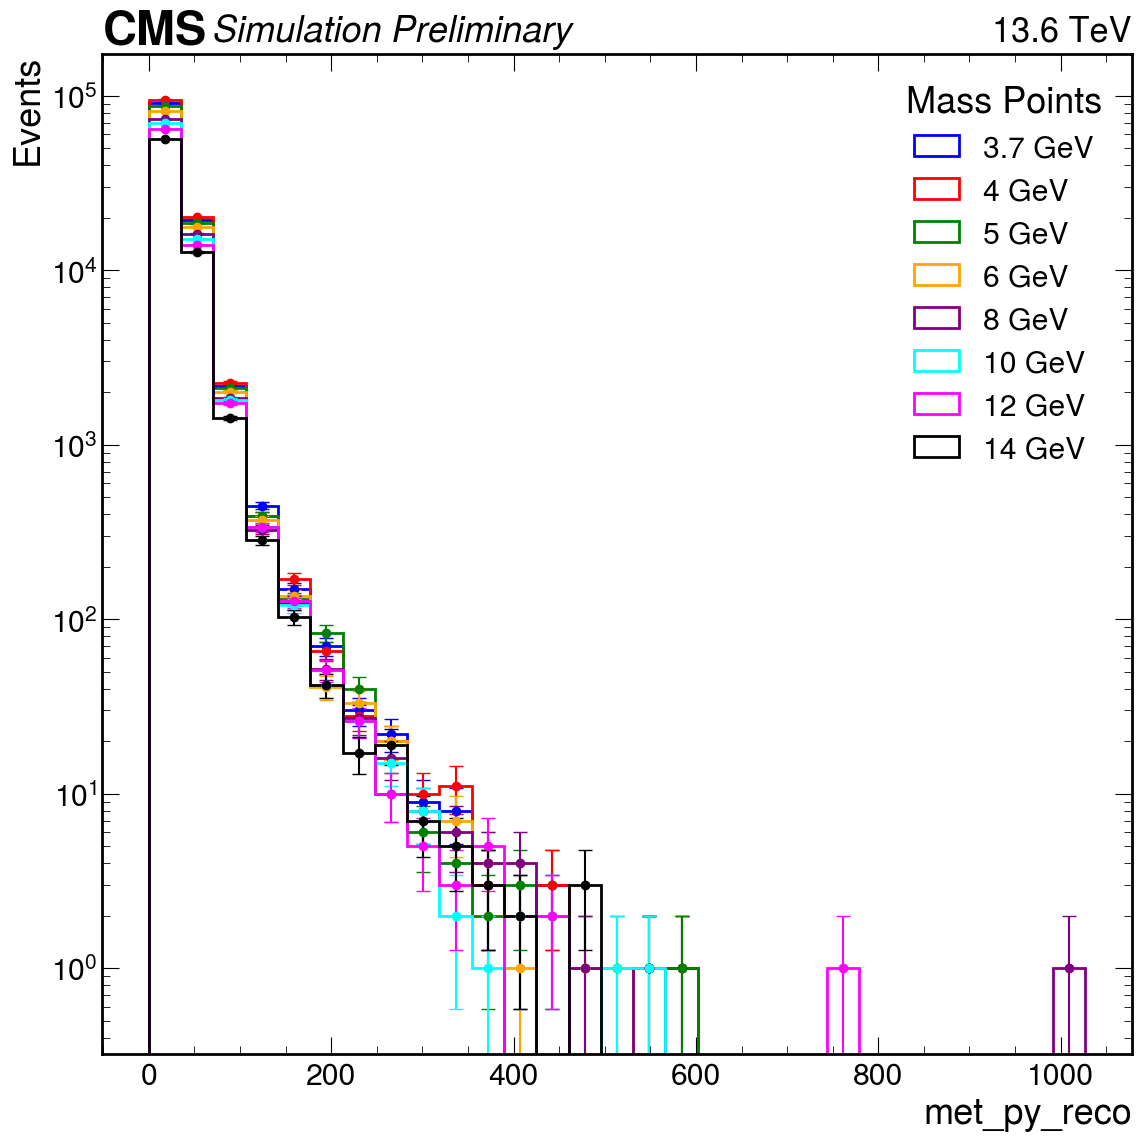

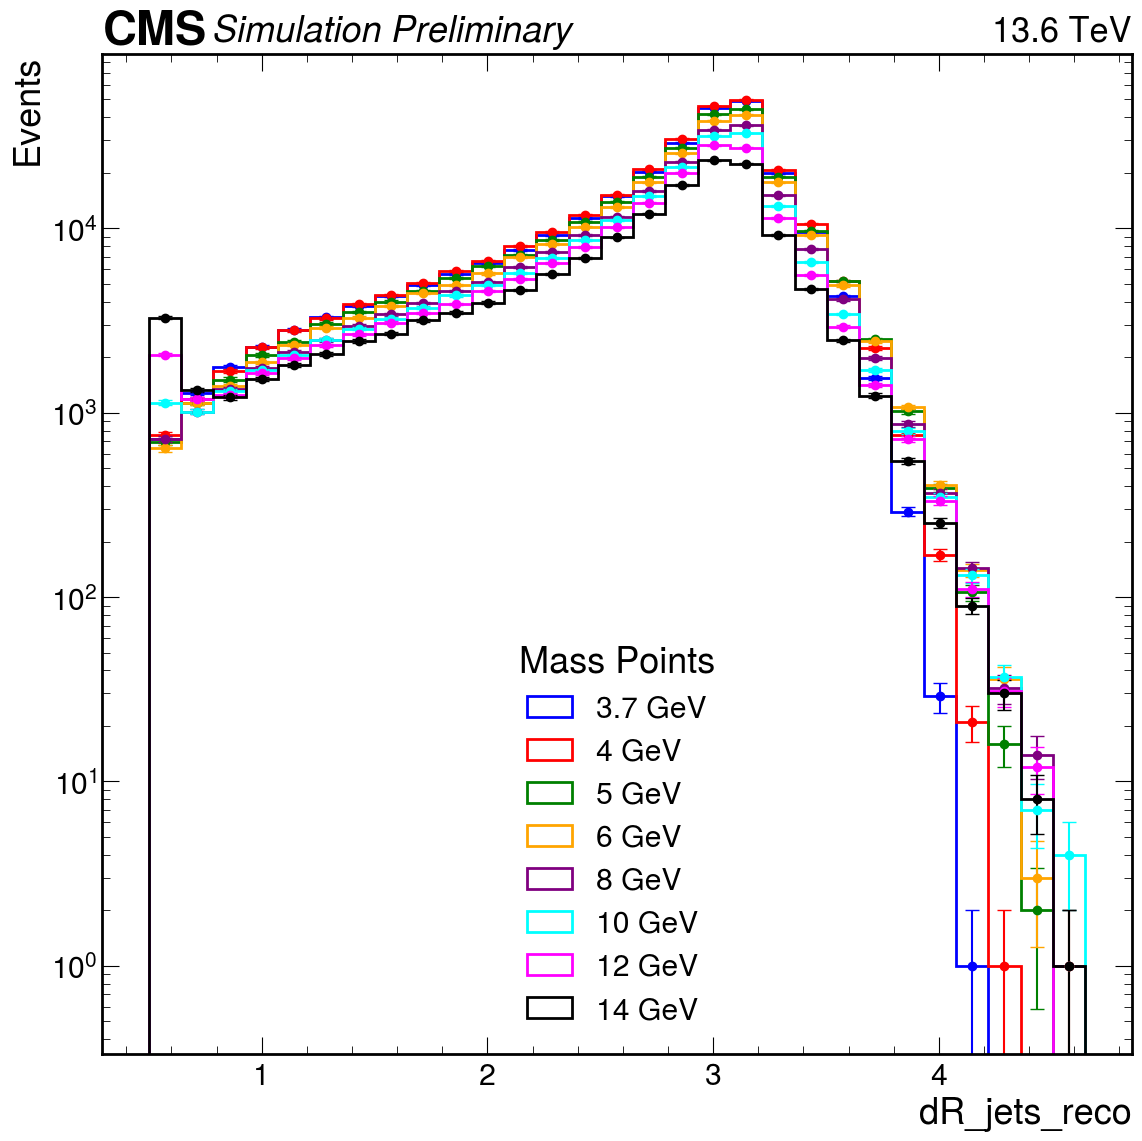

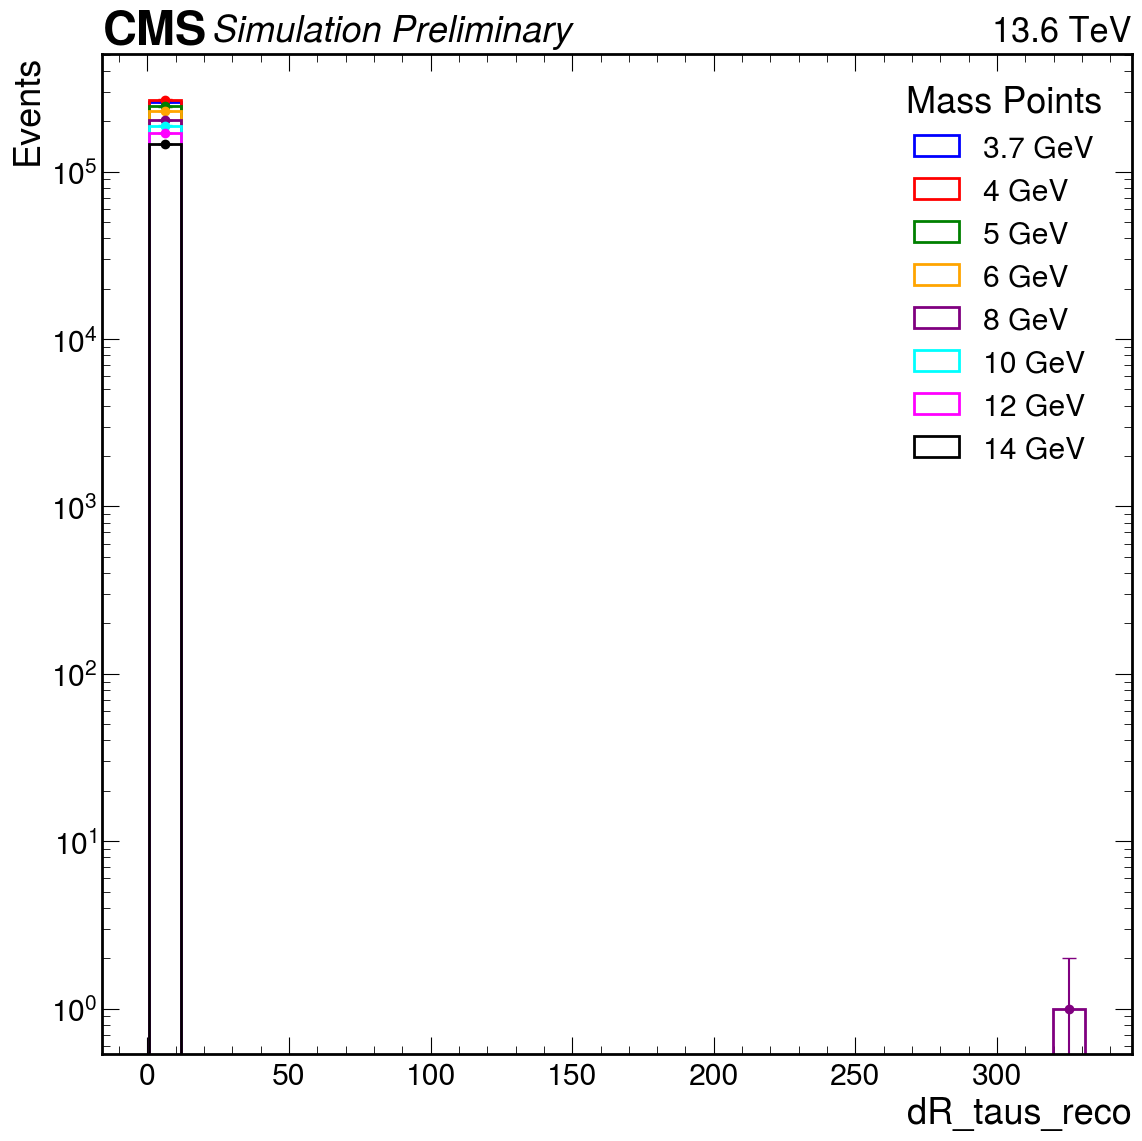

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import uproot  # Ensure uproot is installed

# Define the triggers
triggers = ["met_e_reco","met_pt_reco","met_phi_reco","met_px_reco","met_py_reco","dR_jets_reco","dR_taus_reco"]  # Add more if needed
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

for i, trigger in enumerate(triggers):
    fig, ax = plt.subplots(figsize=(12, 12))  # One figure per trigger

    all_data = []  # Collect all data to determine min/max dynamically

    for j, RHTree in enumerate(RHTree_list):
        # Extract data for trigger
        arrays = RHTree.arrays([trigger], library="numpy")
        data_flat = arrays[trigger]

        # Filter: Only keep values greater than zero
        data_flat = data_flat[data_flat > 0]

        if len(data_flat) == 0:
            continue  # Skip empty datasets

        all_data.append(data_flat)

    # Determine dynamic bin range
    if len(all_data) > 0:
        min_val = min(np.min(d) for d in all_data)
        max_val = max(np.max(d) for d in all_data)
        bins = np.linspace(min_val, max_val, 30)  # 30 bins between min/max

        for j, data_flat in enumerate(all_data):
            # Compute histogram
            hist_values, bin_edges = np.histogram(data_flat, bins=bins)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
            errors = np.sqrt(hist_values)  # Poisson errors

            # Plot histogram
            ax.hist(data_flat, bins=bins, histtype='step', linewidth=2,
                    color=colors[j % len(colors)], label=f"{mass[j]} GeV", density=False)

            # Add error bars
            ax.errorbar(bin_centers, hist_values, yerr=errors, fmt='o', 
                        color=colors[j % len(colors)], capsize=5)

    # Set log scale for better visibility
    ax.set_yscale("log", nonpositive='clip')

    # Labels and titles
    ax.set_xlabel(f"{trigger}")
    ax.set_ylabel("Events")
    ax.legend(title="Mass Points")
    
    # CMS Label
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

    # Show plot
    plt.tight_layout()
    plt.show()


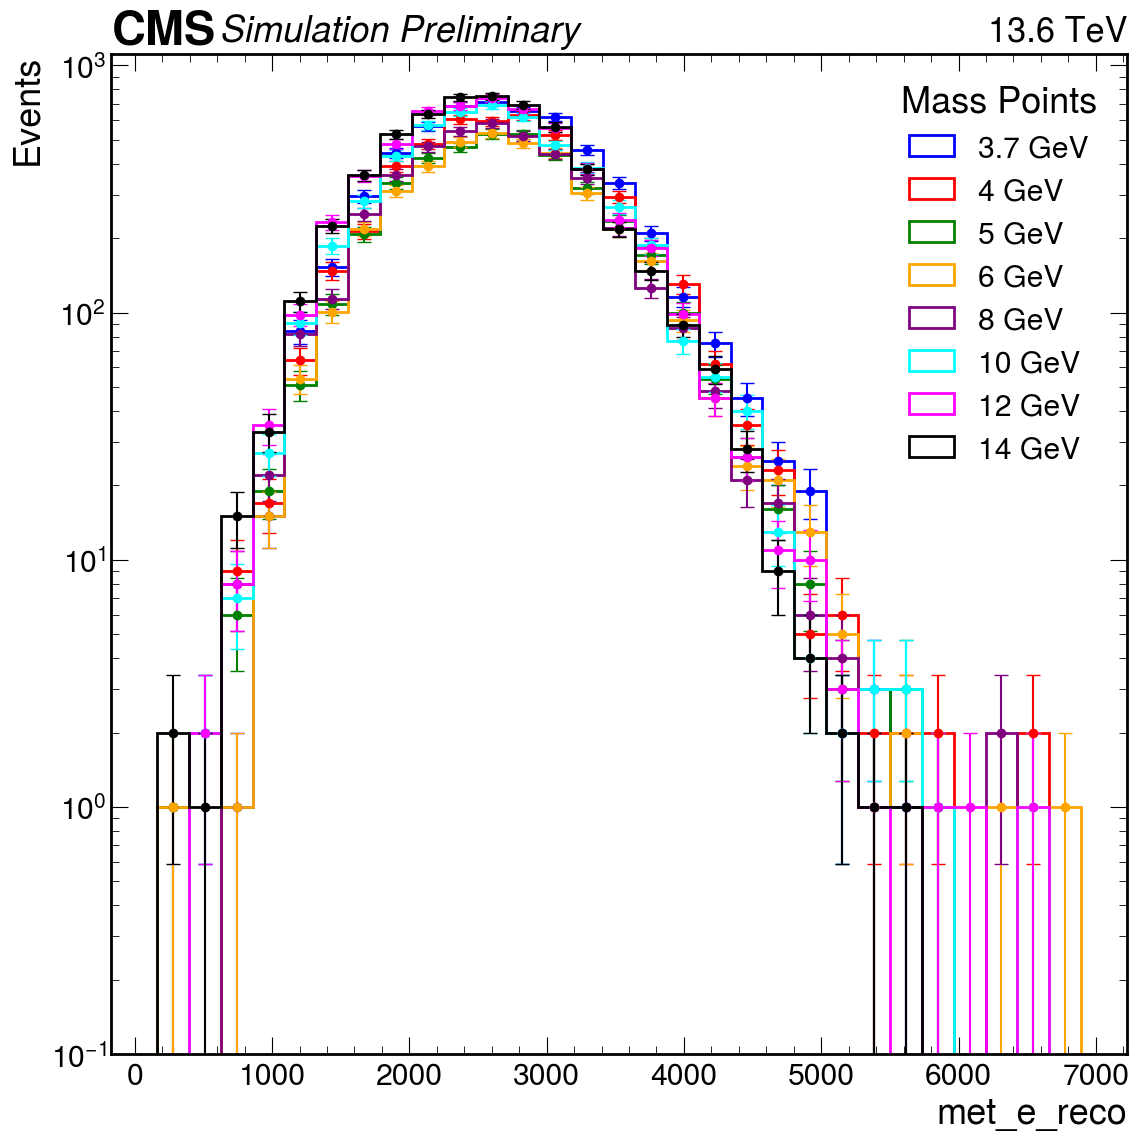

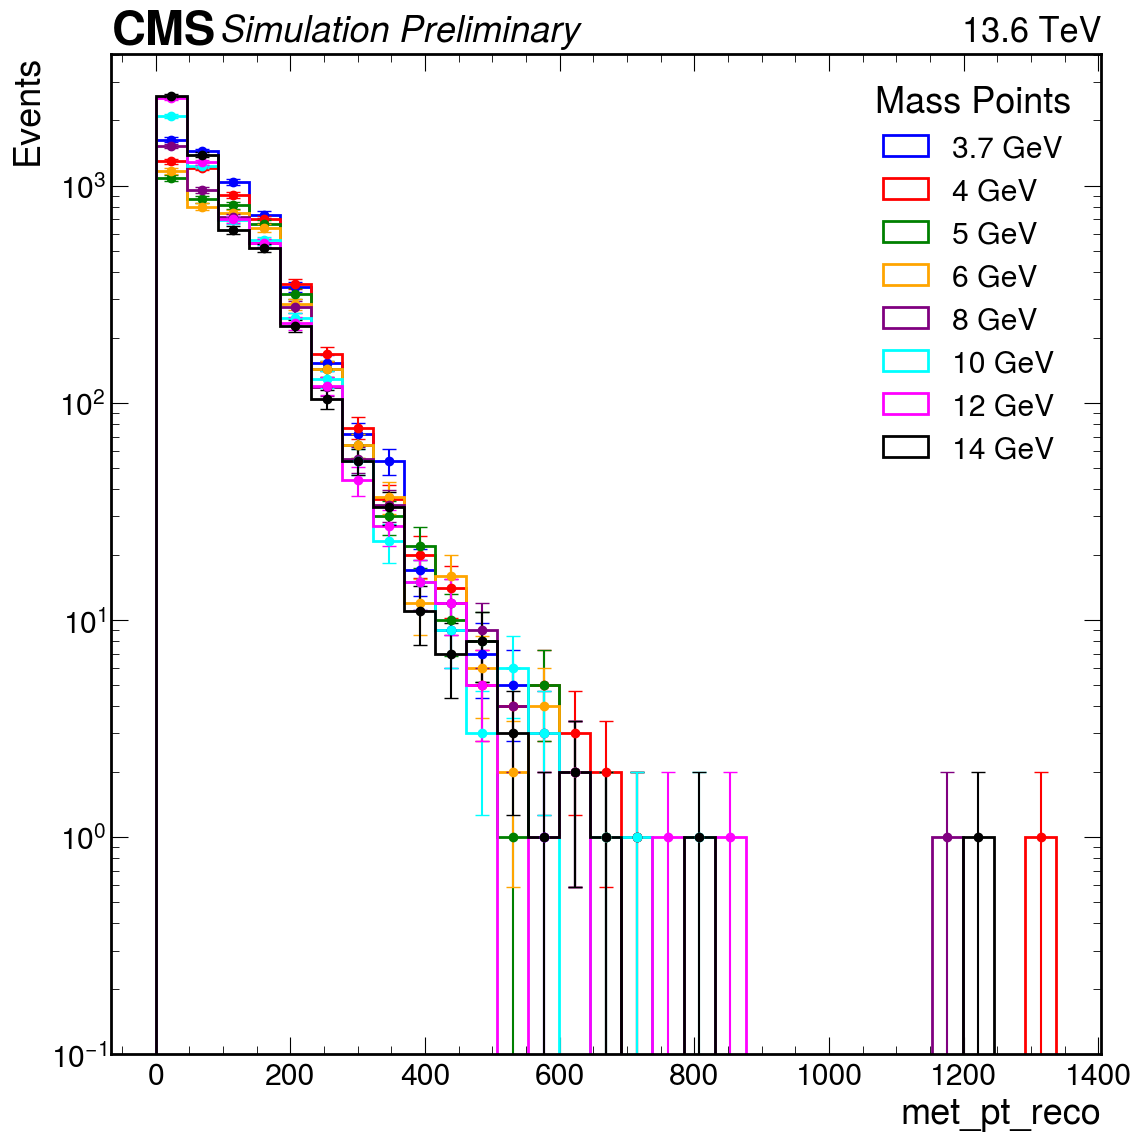

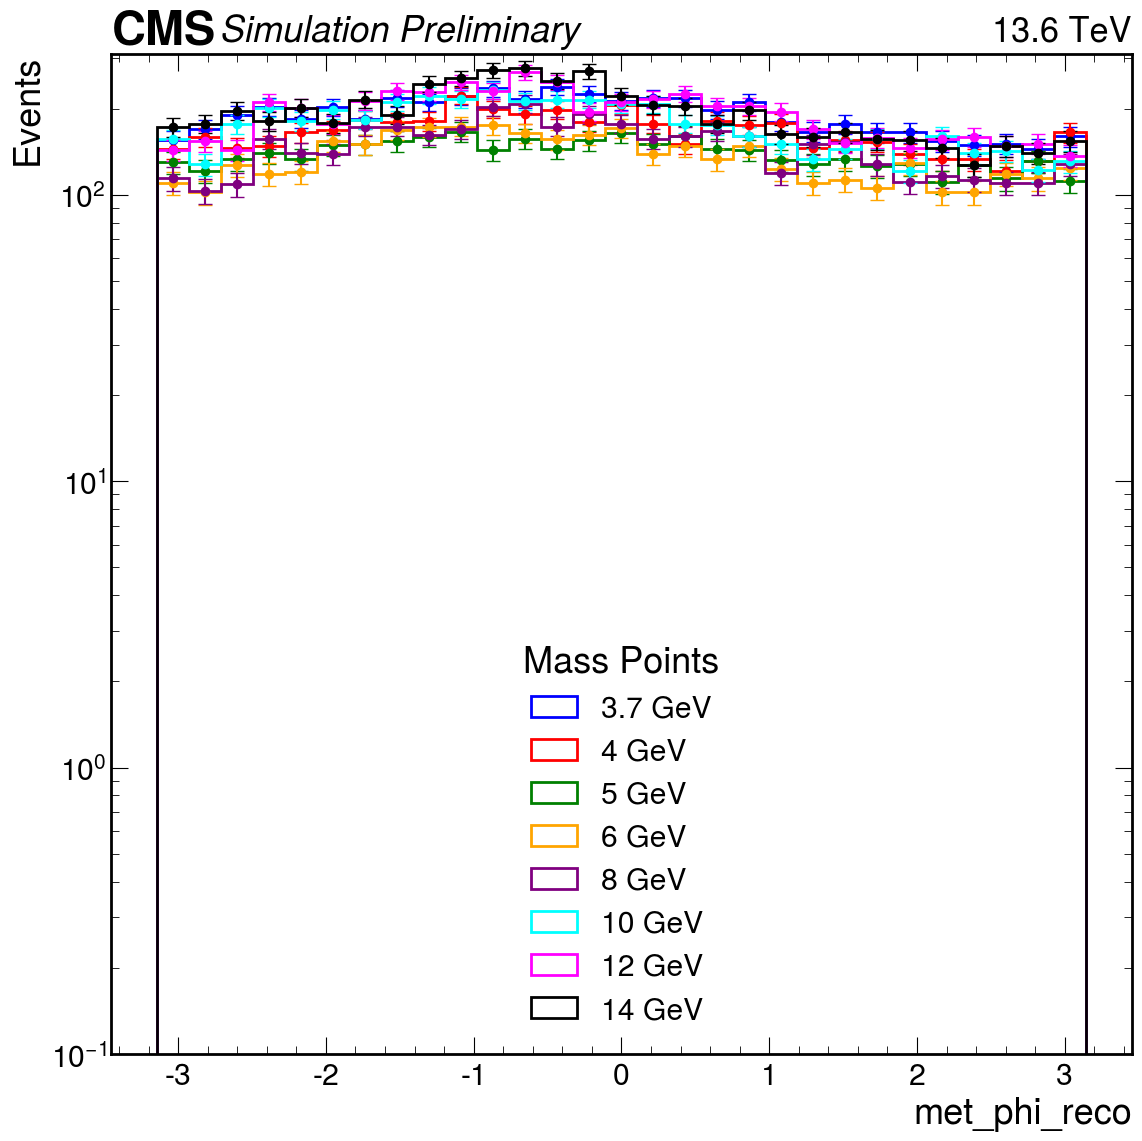

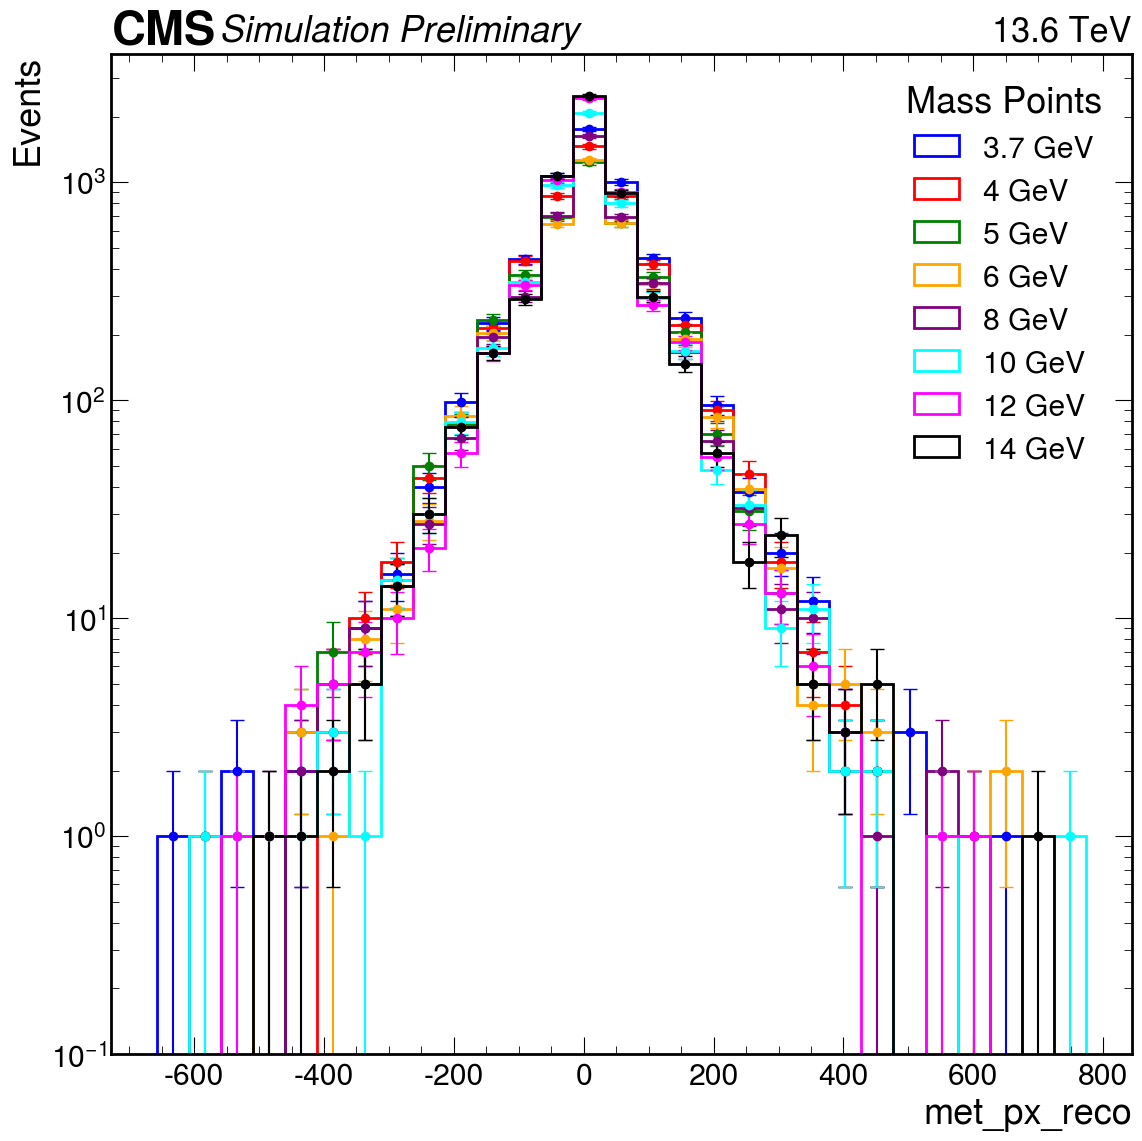

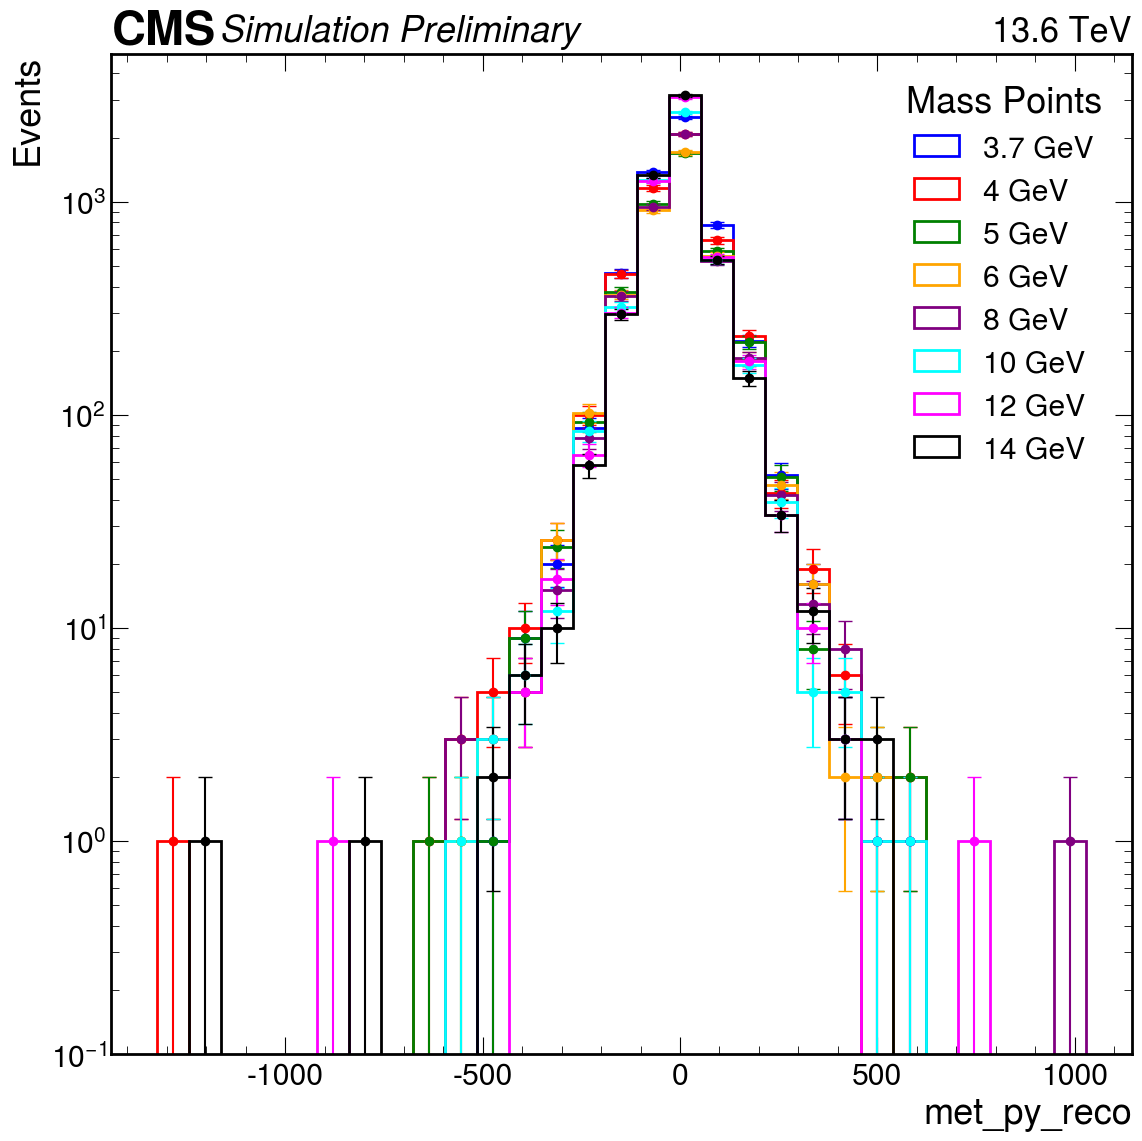

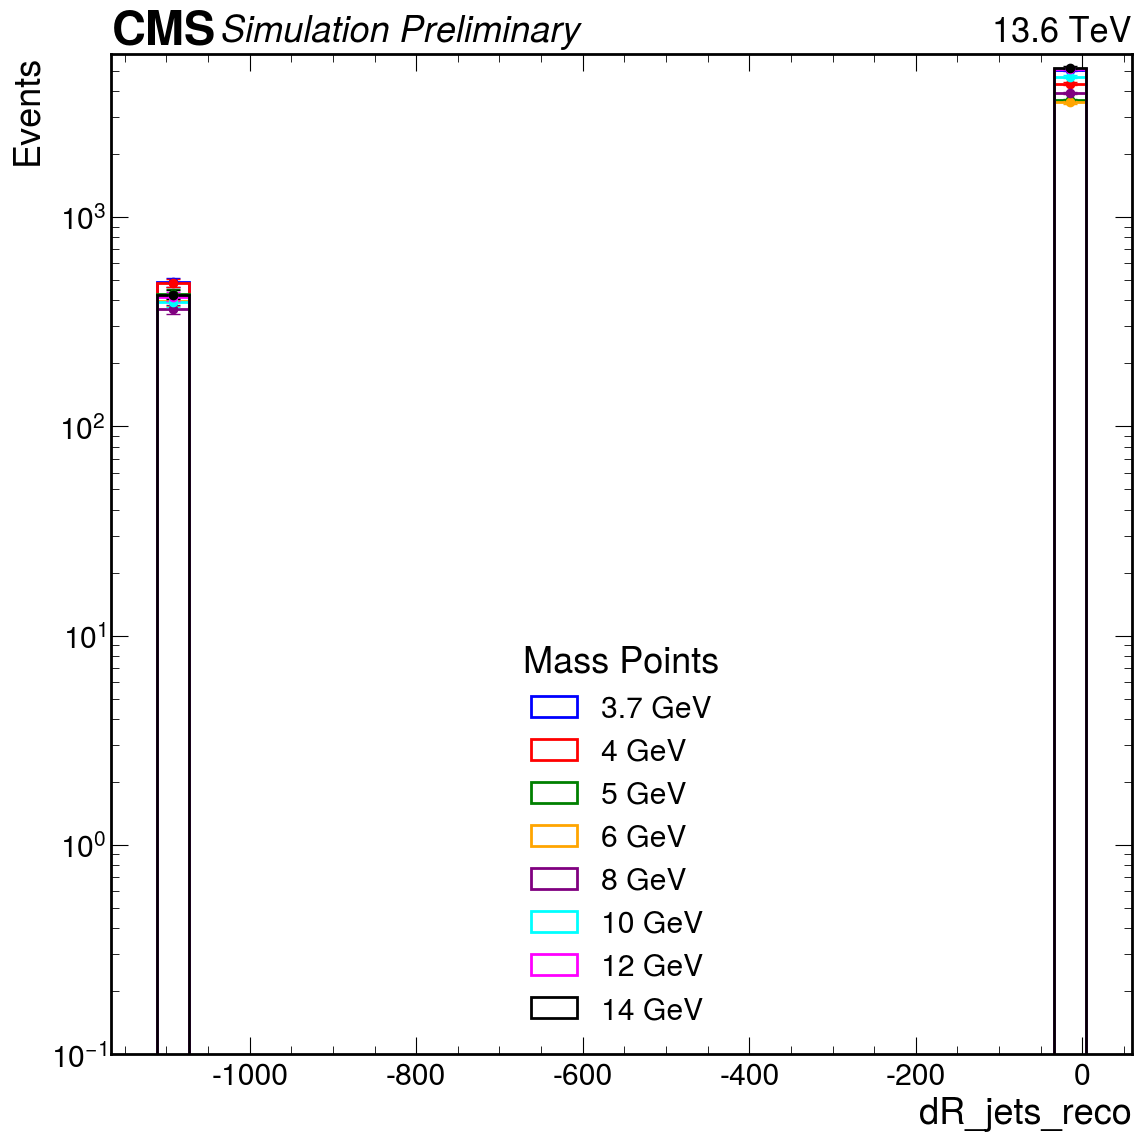

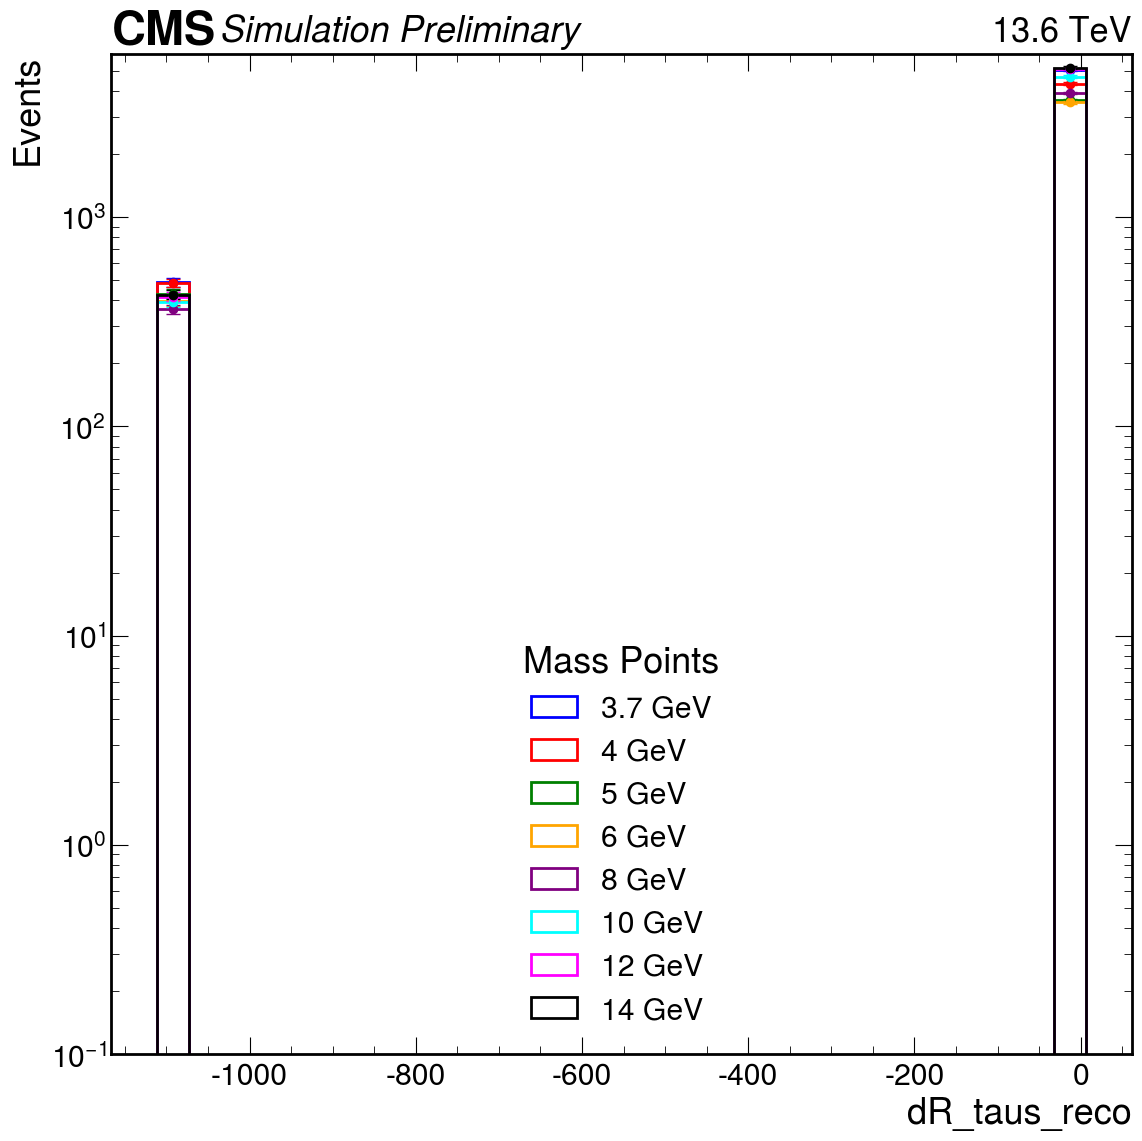

In [248]:
# After trigger

# Define the triggers
triggers = ["met_e_reco", "met_pt_reco", "met_phi_reco", "met_px_reco", "met_py_reco", "dR_jets_reco", "dR_taus_reco"]
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

for i, trigger in enumerate(triggers):
    fig, ax = plt.subplots(figsize=(12, 12))  # One figure per trigger

    all_data = []  # Collect all data to determine min/max dynamically
    valid_datasets = []  # To track datasets that are actually used

    for j, RHTree in enumerate(RHTree_list):
        # Extract both the trigger and pass_trigger values
        arrays = RHTree.arrays([trigger, "pass_trigger"], library="numpy")
        data_flat = arrays[trigger]
        pass_trigger = arrays["pass_trigger"]

        # Apply filter: Only keep values where pass_trigger > 0
        data_flat = data_flat[pass_trigger > 0]

        if len(data_flat) > 0:  # Only append non-empty data
            all_data.append(data_flat)
            valid_datasets.append(j)

    # Determine dynamic bin range
    if len(all_data) > 0:
        min_val = min(np.min(d) for d in all_data)
        max_val = max(np.max(d) for d in all_data)
        bins = np.linspace(min_val, max_val, 30)  # 30 bins between min/max

        for idx, data_flat in enumerate(all_data):
            j = valid_datasets[idx]
            color = colors[j % len(colors)]  # Ensures color consistency

            # Compute histogram
            hist_values, bin_edges = np.histogram(data_flat, bins=bins)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
            errors = np.sqrt(hist_values)  # Poisson errors

            # Plot histogram
            ax.hist(data_flat, bins=bins, histtype='step', linewidth=2,
                    color=color, label=f"{mass[j]} GeV", density=False)

            # Add error bars
            ax.errorbar(bin_centers, hist_values, yerr=errors, fmt='o', 
                        color=color, capsize=5)

    # Set log scale properly (avoid invalid values)
    ax.set_yscale("log")
    ax.set_ylim(bottom=0.1)  # Avoid log-scale issues with zero bins

    # Labels and titles
    ax.set_xlabel(f"{trigger}")
    ax.set_ylabel("Events")
    ax.legend(title="Mass Points")
    
    # CMS Label
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

    # Show plot
    plt.tight_layout()
    plt.show()
